# Carga de datos

In [1]:
# Cargar las bases de datos
import pandas as pd
import numpy as np

from utils.math_utils import *
from data_loader.data_utilsTFM import *

# Carga de datos!!
interpolation = True


Año_24_y = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Y_guardado_24 - Clasico.csv').values
Año_25_y = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Y_guardado_25 - Clasico.csv').values
Año_26_y = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Y_guardado_26 - Clasico.csv').values
    

Año_26_x = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos para la interpolación/X_guardado_26 Inter2.csv').values    
Año_24_x = Año_26_x[0]
Año_25_x = Año_26_x[1]
Año_26_x = Año_26_x[2]
    
Año_26_y_Inter = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos para la interpolación/Y_guardado_26 Inter2.csv').values
Año_24_y_Inter = Año_26_y_Inter[0]
Año_25_y_Inter = Año_26_y_Inter[1]
Año_26_y_Inter = Año_26_y_Inter[2]


mean = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Aux.csv').values[0][0]
std  = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Aux.csv').values[1][0]
normalisation = 'robust'

Año_24_xZ = z_score(Año_24_x, mean, std)
Año_25_xZ = z_score(Año_25_x, mean, std)
Año_26_xZ = z_score(Año_26_x, mean, std)

Año_24_yZ = z_score(Año_24_y, mean, std)
Año_25_yZ = z_score(Año_25_y, mean, std)
Año_26_yZ = z_score(Año_26_y, mean, std)# Carga de datos

In [65]:
Año_26_y_Inter.shape

(2450,)

In [16]:
Año_25_y.shape

(2450, 1)

In [ ]:
Para los datos  limpios:
    Año_26_x = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos para la interpolación/X_guardado_26 Inter2 - limpio.csv').values    
    Año_26_y = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos para la interpolación/Y_guardado_26 Inter2 - limpio.csv').values

Para los datos sucios:
    Año_26_x = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/X_guardado_26.csv').values
    Año_26_y = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Y_guardado_26.csv').values


# Ver los mayores errores

In [169]:
dict_errores = {}

for columna, (valorX, valorY) in enumerate(zip(Año_24_x, Año_24_y)):
    dict_errores[columna] = RMSE(valorX, valorY)

dict_errores = dict(sorted(dict_errores.items(), key=lambda item: item[1], reverse=True))
dict_erroresI = dict(sorted(dict_errores.items(), key=lambda item: item[1], reverse=False))
# Falla en estos: CHN-USA MEX-USA CAN-USA CHN-HKG USA-CAN
# Asumo que porque son enormes!! e+11 enormes, 
# y los siguientes en los que más falla son los e+10, tiene problemas con valores muy muy altos, razonable supongo.
# Solucción: Mejorar el escalador de z_score, a RobustScaler

# Poner a ARIMA en marcha

In [37]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from os.path import join as pjoin
from data_loader.data_utilsTFM import *

# Load the ti# Carga de datosme series data
#n_train, n_val, n_test = 8, 2, 1
#PeMS = data_gen_simple('./dataset/Datos_TODO_REDUCIDO.csv', (n_train, n_val, n_test, "robust"), 2450, 16)
#print(f'>> Loading dataset with Mean: {PeMS.mean:.2f}, STD: {PeMS.std:.2f}')

## CAMBIAR LA DIRECCIÓN
direccion = './dataset/Datos_TODO_reducido.csv'
tamaño_de_la_base = 2450 # 2450 # 288 # 2162

data_aux = pd.read_csv(direccion, header=0)
#Año_22_yARIMA = np.zeros(tamaño_de_la_base)
#Año_23_yARIMA = np.zeros(tamaño_de_la_base)
#Año_24_yARIMA = np.zeros(tamaño_de_la_base)
#Año_25_yARIMA = np.zeros(tamaño_de_la_base)
#Año_26_yARIMA = np.zeros(tamaño_de_la_base)

for column_number, column_name in enumerate(data_aux.columns):
    print(column_number)
    data = pd.read_csv(direccion, header=0, usecols=[column_name])
    data_train = data.iloc[:-1]
    data_test = data.iloc[-1:]
    
    p = 23 # 21 para el de 1 a uno # Cuantos años utiliza para hacer la predicción
    d = 1 # Tendencia de  los datos!
    q = 2 # Cuantos años de ERROR utiliza para  el cálculo
    # Fit ARIMA model
    model = ARIMA(data_train, order=(p, d, q))  # Replace p, d, q with the desired values
    model_fit = model.fit()

    # Make predictions
    num_forecast_years = 1
    #forecast_start = data.index[0]
    #forecast_end = data.index[-5]
    forecast = model_fit.get_forecast(steps=num_forecast_years)

    # Extract the forecasted values and confidence intervals
    forecast_values = forecast.predicted_mean
    confidence_intervals = forecast.conf_int()
    
    #Año_22_yARIMA[column_number] = forecast_values.values[0]
    #Año_23_yARIMA[column_number] = forecast_values.values[0] # 1
    #Año_24_yARIMA[column_number] = forecast_values.values[0] # 2
    #Año_25_yARIMA[column_number] = forecast_values.values[0] # 3
    Año_26_yARIMA[column_number] = forecast_values.values[0] # 4

0


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1
2
3
4
5
6
7
8
9
10


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


11
12
13
14
15
16


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


17
18
19
20
21
22
23


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


24
25
26
27
28
29
30
31
32


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


33
34
35
36
37


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


54
55
56
57
58
59
60
61
62
63
64
65


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


66


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


67
68
69
70
71


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


72
73
74
75
76
77


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


78


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


79
80
81
82
83
84


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


85
86


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


87
88
89
90


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


91


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


92


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


93
94
95


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


96
97
98
99
100


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


101
102
103
104
105
106
107
108


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


133
134
135
136
137
138


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


139
140
141


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


142
143
144
145
146
147
148
149
150
151
152
153


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


154


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


155
156
157


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


158
159
160
161
162


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


163
164
165
166
167
168
169
170


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


171


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


172
173
174
175
176
177
178
179
180
181


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


182
183
184
185


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


186
187
188
189
190
191
192


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


193
194
195
196
197
198
199


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


200
201
202


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


203
204


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


205
206
207
208
209
210
211


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


230


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


231
232
233


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


234
235
236
237
238
239


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


240
241


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


242
243
244
245
246
247
248
249
250
251


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


252
253
254
255
256
257


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


258
259
260


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


261
262
263


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


264
265
266
267
268
269
270


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


271
272
273
274
275
276
277
278
279
280
281
282
283
284


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


285
286
287
288
289
290
291


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


292
293


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


320
321
322
323
324
325


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


351
352
353
354
355
356
357


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


358


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


378
379
380


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


381
382
383


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


384
385
386
387
388


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


389
390


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


391


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


392
393
394
395


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


396
397
398
399
400
401
402
403
404


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


405
406
407
408
409
410
411
412
413
414


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


436
437
438
439
440
441
442
443
444
445
446


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


447
448
449
450
451
452
453
454
455
456


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


457
458
459
460
461


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


479
480
481
482
483
484
485
486
487
488
489


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


490
491
492
493
494
495
496
497


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


498
499
500
501
502
503


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


504


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


505
506
507
508
509
510
511
512


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


513
514
515
516
517
518
519
520
521
522


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


523
524
525
526
527
528
529
530
531
532
533
534
535
536


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


537
538
539


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


540
541
542


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


543
544


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


545
546
547
548
549
550
551
552
553
554
555
556
557
558


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


559
560
561
562
563
564
565
566


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


567
568
569
570
571
572
573


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


574
575
576
577
578
579


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


580
581
582
583
584
585
586


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


587
588


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


589
590


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


591


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


592
593
594
595
596
597
598
599
600
601


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


602
603
604
605
606
607
608
609
610
611
612
613
614
615


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


616
617
618


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


619
620
621
622


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


643
644
645


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


646
647
648


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


649
650


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


651
652


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


653


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


654


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


655
656
657


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


658


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


680


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


681


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


682
683
684
685
686
687
688


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


689
690


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


691
692


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


693
694
695
696
697
698
699
700
701
702
703
704
705
706


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


707


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


708


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


709
710
711
712
713
714


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


715


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


716
717


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


718
719
720
721
722


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


743
744
745
746
747
748
749
750
751
752


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


772


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


773
774
775
776
777
778
779
780
781
782
783


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


784
785
786
787


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


788
789
790
791
792
793


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


794
795


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


796
797
798
799
800
801
802
803
804
805
806
807
808


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


809
810
811
812
813


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


831
832
833
834
835
836
837


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


838
839
840
841
842
843
844


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


870
871
872
873
874
875


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


876
877
878
879
880
881
882
883


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


902


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


903
904
905
906
907
908
909
910


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


911
912
913


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


914
915
916
917
918
919
920
921
922


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


923
924
925
926
927
928
929


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


930
931
932
933


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


934
935
936
937
938
939
940
941
942
943
944
945
946
947


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


948
949
950
951
952


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


953


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


954
955
956
957


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


958
959
960
961
962


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


963
964


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


965


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


966
967
968
969
970
971


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


972
973


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


974
975


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


976
977
978
979
980
981


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


982
983


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1001
1002
1003
1004
1005
1006
1007
1008


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1009
1010
1011


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1023
1024
1025
1026
1027


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1028
1029
1030
1031


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1032
1033


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1034
1035
1036
1037


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1038


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1039
1040
1041


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1062


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1080
1081
1082


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1083
1084
1085
1086
1087
1088
1089
1090
1091


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1092
1093
1094
1095


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1096
1097
1098
1099
1100
1101


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1102


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1103


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1104
1105
1106
1107
1108
1109
1110
1111
1112


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1140
1141
1142
1143
1144
1145
1146
1147


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1148
1149
1150
1151
1152
1153
1154
1155
1156
1157
1158
1159
1160
1161
1162


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1163
1164
1165
1166
1167
1168
1169
1170


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1171
1172
1173
1174


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1175
1176
1177
1178
1179


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1180
1181
1182
1183
1184
1185
1186
1187
1188
1189


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1190
1191
1192


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1193


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1194
1195
1196
1197


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1198
1199
1200
1201


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1202
1203
1204
1205
1206


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1207
1208
1209


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1210
1211
1212
1213
1214
1215
1216
1217
1218


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1219
1220
1221
1222
1223
1224
1225
1226
1227
1228
1229
1230
1231
1232


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1233
1234
1235
1236
1237
1238
1239
1240


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1241
1242
1243
1244
1245
1246
1247
1248
1249


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1250


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1251


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1252
1253
1254
1255
1256


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1257
1258
1259
1260


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1261
1262
1263


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1264
1265
1266


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1267


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1268


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1269
1270
1271
1272
1273
1274
1275
1276
1277
1278


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1294
1295
1296
1297
1298
1299
1300
1301


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1302
1303
1304
1305
1306


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1307


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1332
1333


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1345
1346
1347
1348
1349
1350


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1351


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1352
1353
1354
1355


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1356
1357
1358
1359
1360


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1361


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1362
1363
1364
1365
1366
1367


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1407
1408


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1409
1410
1411
1412
1413
1414
1415


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1439
1440


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1441
1442
1443
1444
1445
1446
1447
1448
1449
1450


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1451
1452
1453
1454
1455
1456
1457
1458
1459


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1460
1461
1462
1463
1464
1465
1466
1467


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1468


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1469
1470
1471
1472
1473
1474
1475


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1476
1477


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1478


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1479
1480
1481
1482
1483
1484


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1485
1486
1487
1488


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1489
1490


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1491
1492
1493
1494
1495
1496
1497
1498
1499
1500
1501
1502
1503
1504
1505
1506
1507
1508


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1509
1510
1511
1512
1513
1514


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1530
1531
1532
1533


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1569
1570
1571
1572


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1573
1574
1575
1576
1577
1578
1579
1580


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1581
1582
1583
1584
1585


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1586


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1603
1604


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1605
1606
1607
1608
1609


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1610
1611
1612


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1613
1614
1615
1616
1617
1618
1619
1620


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1621
1622
1623
1624
1625
1626


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1627
1628


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1629
1630


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1631
1632
1633
1634
1635
1636


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1637


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1638


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1639
1640
1641
1642
1643
1644


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1645
1646


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1647
1648
1649
1650
1651
1652
1653
1654
1655
1656


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1657
1658
1659
1660
1661
1662


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1663


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1664


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1665
1666
1667
1668
1669
1670


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1671
1672


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1673
1674
1675
1676
1677
1678


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1679
1680
1681
1682
1683
1684
1685
1686


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1687
1688
1689
1690
1691
1692
1693
1694


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1719
1720
1721
1722
1723


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1724
1725
1726
1727
1728
1729
1730


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1731


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1732
1733
1734
1735
1736
1737


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1738
1739
1740
1741


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1742


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1743


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1744
1745


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1773


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1787
1788
1789
1790
1791
1792


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1793
1794
1795
1796


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1797
1798
1799
1800
1801
1802


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1803
1804
1805
1806
1807
1808
1809
1810


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1811
1812


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1813
1814
1815
1816
1817
1818


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1819
1820
1821
1822
1823


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1845
1846
1847
1848
1849
1850
1851
1852
1853


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1854
1855
1856
1857


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1858
1859
1860


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1861
1862
1863
1864
1865
1866
1867
1868
1869


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1870
1871
1872
1873


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1874
1875
1876


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1877


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1878
1879
1880
1881


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1882
1883
1884
1885
1886
1887


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1888
1889
1890


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1907
1908
1909


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1910
1911
1912
1913
1914
1915
1916
1917
1918
1919


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1920
1921
1922
1923
1924
1925
1926


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1942


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1943
1944
1945
1946
1947
1948
1949
1950
1951
1952


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1969
1970
1971


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1972
1973
1974
1975
1976
1977
1978
1979
1980
1981


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2020
2021
2022


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2023
2024
2025


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2026
2027
2028
2029


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2043
2044
2045
2046
2047


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2081
2082
2083
2084
2085
2086
2087


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2088
2089
2090
2091
2092
2093
2094
2095
2096
2097


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2098


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2111
2112
2113
2114


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2115
2116
2117
2118
2119
2120
2121
2122


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2134
2135
2136
2137
2138
2139


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2140
2141
2142
2143
2144
2145
2146


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2147
2148
2149
2150
2151


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2152
2153
2154
2155
2156
2157


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2158
2159
2160
2161
2162


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2163
2164


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2165
2166
2167


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2168


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2169


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2170
2171
2172
2173
2174
2175


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2176
2177
2178
2179
2180
2181
2182
2183


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2184


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2185
2186
2187


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2188


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2189
2190


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2191
2192
2193
2194
2195


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2196
2197


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2198
2199


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2200
2201
2202
2203
2204
2205
2206
2207


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2208


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2223
2224
2225
2226
2227
2228
2229
2230
2231
2232


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2271
2272


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2273


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2274
2275
2276
2277
2278
2279
2280
2281


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2282
2283
2284
2285
2286
2287
2288
2289
2290
2291


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2292
2293
2294
2295
2296
2297
2298


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2299
2300
2301
2302
2303


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2304


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2305


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2306
2307


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2308
2309
2310
2311
2312
2313


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2314
2315
2316
2317


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2318


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2319
2320
2321
2322
2323


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2324


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2325
2326
2327
2328


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2329
2330
2331
2332


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2333
2334
2335
2336
2337
2338


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2339
2340
2341
2342
2343
2344
2345


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2346
2347


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2348


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2349
2350


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2351
2352


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2353


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2354
2355
2356
2357
2358
2359
2360
2361
2362


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2363
2364


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2365
2366
2367
2368
2369


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2370
2371


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


2389
2390


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2391
2392


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2426
2427


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2428
2429
2430
2431
2432
2433


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444


C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2445
2446
2447
2448
2449
Wall time: 23min 44s


In [38]:
Y_ARIMA = pd.DataFrame({'Año_22': Año_22_yARIMA[slice(None)].reshape(-1), \
                        'Año_23': Año_23_yARIMA[slice(None)].reshape(-1), \
                        'Año_24': Año_24_yARIMA[slice(None)].reshape(-1), \
                        'Año_25': Año_25_yARIMA[slice(None)].reshape(-1), \
                        'Año_26': Año_26_yARIMA[slice(None)].reshape(-1)})

Y_ARIMA.to_csv('./Y_ARIMA.csv', index=None)

In [30]:
Y_ARIMA = pd.read_csv('./Y_ARIMA.csv')

Año_24_yARIMA = Y_ARIMA["Año_24"].values
Año_25_yARIMA = Y_ARIMA["Año_25"].values
Año_26_yARIMA = Y_ARIMA["Año_26"].values

In [31]:
Año_24_yARIMA

array([1.30787101e+08, 3.01624580e+09, 7.06799954e+08, ...,
       5.82400611e+08, 5.88021908e+09, 8.09813043e+08])

In [9]:
Año_24_y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [10]:
Año_24_y.shape

(2450, 1)

In [4]:
# Cargar las bases de datos
import pandas as pd
import numpy as np

from utils.math_utils import *
from data_loader.data_utilsTFM import *

# Carga de datos!!


Año_24_x, Año_25_x, Año_26_x = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))
Año_22_y, Año_23_y, Año_24_y, Año_25_y, Año_26_y = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))
Año_22_y_Inter_1, Año_23_y_Inter_1, Año_24_y_Inter_1, Año_25_y_Inter_1, Año_26_y_Inter_1 = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))

mean, iqr = 0, 0

rango = 5 # 6
for x in range(1, rango+1):
    # For 1 years  NO INTERPOLATION
    aux = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_normales/{x}/Y_guardado_26_R.csv').values
    Año_22_y += aux[0].reshape((2450, 1))
    Año_23_y += aux[1].reshape((2450, 1))
    Año_24_y += aux[2].reshape((2450, 1))
    Año_25_y += aux[3].reshape((2450, 1))
    Año_26_y += aux[4].reshape((2450, 1))
    
    # For 1 year  Scaler to seeee
    aux = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{x}/Y_guardado_26_R.csv').values
    Año_22_y_Inter_1 += aux[0].reshape((2450, 1))
    Año_23_y_Inter_1 += aux[1].reshape((2450, 1))
    Año_24_y_Inter_1 += aux[2].reshape((2450, 1))
    Año_25_y_Inter_1 += aux[3].reshape((2450, 1))
    Año_26_y_Inter_1 += aux[4].reshape((2450, 1))
    
    

aux = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0).values    
Año_24_x += aux[-3].reshape((2450, 1))
Año_25_x += aux[-2].reshape((2450, 1))
Año_26_x += aux[-1].reshape((2450, 1))


#
Año_22_y = Año_22_y/rango
Año_23_y = Año_23_y/rango
Año_24_y = Año_24_y/rango
Año_25_y = Año_25_y/rango
Año_26_y = Año_26_y/rango


#El mejor!!
Año_22_y_Inter_1 = Año_22_y_Inter_1/rango
Año_23_y_Inter_1 = Año_23_y_Inter_1/rango
Año_24_y_Inter_1 = Año_24_y_Inter_1/rango
Año_25_y_Inter_1 = Año_25_y_Inter_1/rango
Año_26_y_Inter_1 = Año_26_y_Inter_1/rango

mean = mean/rango
iqr = iqr/rango

#Y_ARIMA = pd.read_csv('./Y_ARIMA_2.csv')
Y_ARIMA = pd.read_csv('./Y_ARIMA.csv')
Año_22_yARIMA = Y_ARIMA["Año_22"].values.reshape((2450, 1))
Año_23_yARIMA = Y_ARIMA["Año_23"].values.reshape((2450, 1))
Año_24_yARIMA = Y_ARIMA["Año_24"].values.reshape((2450, 1))
Año_25_yARIMA = Y_ARIMA["Año_25"].values.reshape((2450, 1))
Año_26_yARIMA = Y_ARIMA["Año_26"].values.reshape((2450, 1))

# Metodo de compración entre ARIMA  y STGCN

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score


def MAE(v, v_):
    return np.mean(np.abs(v_ - v))

def RMSE(v, v_):
    return np.sqrt(np.mean((v_ - v) ** 2))

def analisis(column_positions = slice(None), devolver=False, lugar_columnas=None):
    
    if lugar_columnas:
        columnas = pd.read_csv(lugar_columnas, header=0).columns
        aux = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0)
        column_position_ARIMA = [aux.columns.get_loc(column_name) for column_name in columnas]
    else:
        column_position_ARIMA = column_positions
        
    
    X = pd.DataFrame({'Año_24': Año_24_x[column_positions].reshape(-1), \
                      'Año_25': Año_25_x[column_positions].reshape(-1), \
                      'Año_26': Año_26_x[column_positions].reshape(-1)})

    Y_STGCN = pd.DataFrame({'Año_24': Año_24_y[column_positions].reshape(-1), \
                            'Año_25': Año_25_y[column_positions].reshape(-1), \
                            'Año_26': Año_26_y[column_positions].reshape(-1)})
    
    Y_STGCN_Inter = pd.DataFrame({'Año_24': Año_24_y_Inter[column_positions].reshape(-1), \
                            'Año_25': Año_25_y_Inter[column_positions].reshape(-1), \
                            'Año_26': Año_26_y_Inter[column_positions].reshape(-1)})

    # ARIMA no cambia, pero parece que X si cambia?? Sera por la estandarización??
    Y_ARIMA = pd.DataFrame({'Año_24': Año_24_yARIMA[column_position_ARIMA].reshape(-1), \
                            'Año_25': Año_25_yARIMA[column_position_ARIMA].reshape(-1), \
                            'Año_26': Año_26_yARIMA[column_position_ARIMA].reshape(-1)})

    #print("Error de STGCN (RMSE):")
    #print(RMSE(X.values, Y_STGCN))
    #print("\nError de ARIMA (RMSE):")
    #print(RMSE(X.values, Y_ARIMA))

    #print("Error de STGCN (MAE):")
    #print(MAE(X.values, Y_STGCN))
    #print("\nError de ARIMA (MAE):")
    #print(MAE(X.values, Y_ARIMA))

    #print("\nDiferencia entre STGCN y ARIMA (RMSE):")
    #if sum(RMSE(X.values, Y_STGCN)) > sum(RMSE(X.values, Y_ARIMA)):
    #    print("En RMSE, ARIMA tiene ", "{:.2f}".format(sum(RMSE(X.values, Y_STGCN))/sum(RMSE(X.values, Y_ARIMA))),\
    #          "veces menos error que STGCN.")
    #else:
    #    print("En RMSE, STGCN tiene ", "{:.2f}".format(sum(RMSE(X.values, Y_ARIMA))/sum(RMSE(X.values, Y_STGCN))),\
    #          "veces menos error que ARIMA.")

    #print("\nDiferencia entre STGCN y ARIMA (MAE):")
    #if sum(MAE(X.values, Y_STGCN)) > sum(MAE(X.values, Y_ARIMA)):
    #    print("En MAE, ARIMA tiene ", "{:.2f}".format(sum(MAE(X.values, Y_STGCN))/sum(MAE(X.values, Y_ARIMA))),\
    #          "veces menos error que STGCN.")
    #else:
    #    print("En MAE, STGCN tiene ", "{:.2f}".format(sum(MAE(X.values, Y_ARIMA))/sum(MAE(X.values, Y_STGCN))),\
    #          "veces menos error que ARIMA.")
    
    MAE_STGCN = round(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN, mean, iqr))), 2)
    #MAE_STGCN = np.mean(np.abs(v_ - v))
    
    MAE_STGCN_Inter = f'{(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN_Inter, mean, iqr)))):.2f}'
    MAE_ARIMA = f'{(sum(MAE(scale(X.values, mean, iqr), scale(Y_ARIMA, mean, iqr)))):.2f}'
    
    RMSE_STGCN = f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_STGCN, mean, iqr)))):.2f}'
    RMSE_STGCN_Inter = f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_STGCN_Inter, mean, iqr)))):.2f}'
    RMSE_ARIMA = f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_ARIMA, mean, iqr)))):.2f}'
    
    #MAE_ARIMA_STGCN = f'{(float(MAE_STGCN)/float(MAE_ARIMA)):.0%}'
    #RMSE_ARIMA_STGCN = f'{(float(RMSE_STGCN)/float(RMSE_ARIMA)):.0%}'
    
    print("\n")
    print("------------------------------------------------------------")
    print(f"|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |")
    print("------------------------------------------------------------")
    print(f"|      MAE        |    {MAE_STGCN}   |     {MAE_STGCN_Inter}       |   {MAE_ARIMA}    |")
    print("------------------------------------------------------------")
    print(f"|     RMSE        |    {RMSE_STGCN}   |     {RMSE_STGCN_Inter}       |   {RMSE_ARIMA}    |")
    print("------------------------------------------------------------")
       
    if devolver:
        # Devolver el error 
        return sum(RMSE(X.values, Y_STGCN))/sum(RMSE(X.values, Y_ARIMA))
    
    
def analisis_anual(column_positions = slice(None), devolver=False, lugar_columnas=None):
    
    if lugar_columnas:
        columnas = pd.read_csv(lugar_columnas, header=0).columns
        aux = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0)
        column_position_ARIMA = [aux.columns.get_loc(column_name) for column_name in columnas]
    else:
        column_position_ARIMA = column_positions
        
    
    X = pd.DataFrame({'Año_2018': Año_24_x[column_positions].reshape(-1), \
                      'Año_2019': Año_25_x[column_positions].reshape(-1), \
                      'Año_2020': Año_26_x[column_positions].reshape(-1)})

    Y_STGCN = pd.DataFrame({'Año_2018': Año_24_y[column_positions].reshape(-1), \
                            'Año_2019': Año_25_y[column_positions].reshape(-1), \
                            'Año_2020': Año_26_y[column_positions].reshape(-1)})
    
    Y_STGCN_Inter = pd.DataFrame({'Año_2018': Año_24_y_Inter[column_positions].reshape(-1), \
                                'Año_2019': Año_25_y_Inter[column_positions].reshape(-1), \
                                'Año_2020': Año_26_y_Inter[column_positions].reshape(-1)})

    # ARIMA no cambia, pero parece que X si cambia?? Sera por la estandarización??
    Y_ARIMA = pd.DataFrame({'Año_2018': Año_24_yARIMA[column_position_ARIMA].reshape(-1), \
                            'Año_2019': Año_25_yARIMA[column_position_ARIMA].reshape(-1), \
                            'Año_2020': Año_26_yARIMA[column_position_ARIMA].reshape(-1)})
    
    #MAE_STGCN = round(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN, mean, iqr))), 2)
    MAE_STGCN_Inter = round(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN_Inter, mean, iqr))), 2)
    MAE_ARIMA = round(sum(MAE(scale(X.values, mean, iqr), scale(Y_ARIMA, mean, iqr))), 2)
    
    # Plot the mean lines
    #plt.axhline(MAE_STGCN/3, linestyle='--', color='red', label='MAE_STGCN')
    plt.axhline(MAE_STGCN_Inter/3, linestyle='--', color='blue', label='MAE_STGCN_Inter')
    plt.axhline(MAE_ARIMA/3, linestyle='--', color='black', label='MAE_ARIMA')
    
    
    MAE_STGCN, MAE_STGCN_Inter, MAE_ARIMA, columns = [], [], [], []
    for (column, values_X), (_, values_STGCN), (_, values_STGCN_Inter), (_, values_ARIMA) \
        in zip(X.iteritems(), Y_STGCN.iteritems(), Y_STGCN_Inter.iteritems(), Y_ARIMA.iteritems()):
        
        X2 = pd.DataFrame({column: values_X})
        Y_STGCN2 = pd.DataFrame({column: values_STGCN})
        Y_STGCN_Inter2 = pd.DataFrame({column: values_STGCN_Inter})
        Y_ARIMA2 = pd.DataFrame({column: values_ARIMA})

        MAE_STGCN.append(round(sum(MAE(scale(X2, mean, iqr), scale(Y_STGCN2, mean, iqr))), 2))
        MAE_STGCN_Inter.append(round(sum(MAE(scale(X2, mean, iqr), scale(Y_STGCN_Inter2, mean, iqr))), 2))
        MAE_ARIMA.append(round(sum(MAE(scale(X2, mean, iqr), scale(Y_ARIMA2, mean, iqr))), 2))
        columns.append(column)
    
    print(MAE_STGCN_Inter)
    print(MAE_ARIMA)
    #plt.plot(columns, MAE_STGCN, marker='o', linestyle='-', color='red')
    plt.plot(columns, MAE_STGCN_Inter, marker='o', linestyle='-', color='blue')
    plt.plot(columns, MAE_ARIMA, marker='o', linestyle='-', color='black')
    
    plt.legend()
        
        
        
        
def analisis_ultimo(column_positions = slice(None), devolver=False, lugar_columnas=None):   
        
    if lugar_columnas:
        columnas = pd.read_csv(lugar_columnas, header=0).columns
        aux = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0)
        column_position_ARIMA = [aux.columns.get_loc(column_name) for column_name in columnas]
    else:
        column_position_ARIMA = column_positions
        
    
    X = pd.DataFrame({'Año_26': Año_26_x[column_positions].reshape(-1)})

    Y_STGCN = pd.DataFrame({'Año_26': Año_26_y[column_positions].reshape(-1)})
    
    Y_STGCN_Inter = pd.DataFrame({'Año_26': Año_26_y_Inter[column_positions].reshape(-1)})
    
    Y_STGCN_Inter_5 = pd.DataFrame({'Año_26': Año_26_y_Inter_1[column_positions].reshape(-1)})

    # ARIMA no cambia, pero parece que X si cambia?? Sera por la estandarización??
    #Y_ARIMA = pd.DataFrame({'Año_26': Año_26_yARIMA[column_position_ARIMA].reshape(-1)})
    Y_ARIMA = pd.DataFrame({'Año_26': Año_26_yARIMA[column_positions].reshape(-1)})

    
    MAE_STGCN = round(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN, mean, iqr))), 2)
    #MAE_STGCN = np.mean(np.abs(v_ - v))
    MAE_STGCN_Inter = f'{(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN_Inter, mean, iqr)))):.2f}'
    MAE_STGCN_Inter_5 = f'{(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN_Inter_5, mean, iqr)))):.2f}'
    MAE_ARIMA = f'{(sum(MAE(scale(X.values, mean, iqr), scale(Y_ARIMA, mean, iqr)))):.2f}'
    
    RMSE_STGCN = f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_STGCN, mean, iqr)))):.2f}'
    RMSE_STGCN_Inter = f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_STGCN_Inter, mean, iqr)))):.2f}'
    RMSE_STGCN_Inter_5 = f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_STGCN_Inter_5, mean, iqr)))):.2f}'
    RMSE_ARIMA = f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_ARIMA, mean, iqr)))):.2f}'
    
    #MAE_ARIMA_STGCN = f'{(float(MAE_STGCN)/float(MAE_ARIMA)):.0%}'
    #RMSE_ARIMA_STGCN = f'{(float(RMSE_STGCN)/float(RMSE_ARIMA)):.0%}'
    
    print("\n")
    print("------------------------------------------------------------")
    print(f"|     Errores     |    STCGN  |   STCGN_Inter  |   STCGN_Inter_5  |   ARIMA   |")
    print("------------------------------------------------------------")
    print(f"|      MAE        |    {MAE_STGCN}   |     {MAE_STGCN_Inter} |   {MAE_STGCN_Inter_5}       |   {MAE_ARIMA}    |")
    print("------------------------------------------------------------")
    print(f"|     RMSE        |    {RMSE_STGCN}   |     {RMSE_STGCN_Inter} |   {RMSE_STGCN_Inter_5}      |   {RMSE_ARIMA}    |")
    print("------------------------------------------------------------")
       
    if devolver:
        # Devolver el error 
        return sum(RMSE(X.values, Y_STGCN))/sum(RMSE(X.values, Y_ARIMA))

In [6]:
mean = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/4/Aux.csv').values[0][0]
iqr  = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/4/Aux.csv').values[1][0]
print(mean, iqr)


mean = mean*0.995
iqr = iqr*0.995
print(mean, iqr)

3720626284.1969614 2080035442.755833
3702023152.7759767 2069635265.5420537


0.945
0.912
0.936
0.960
0.945
Media: 0.940


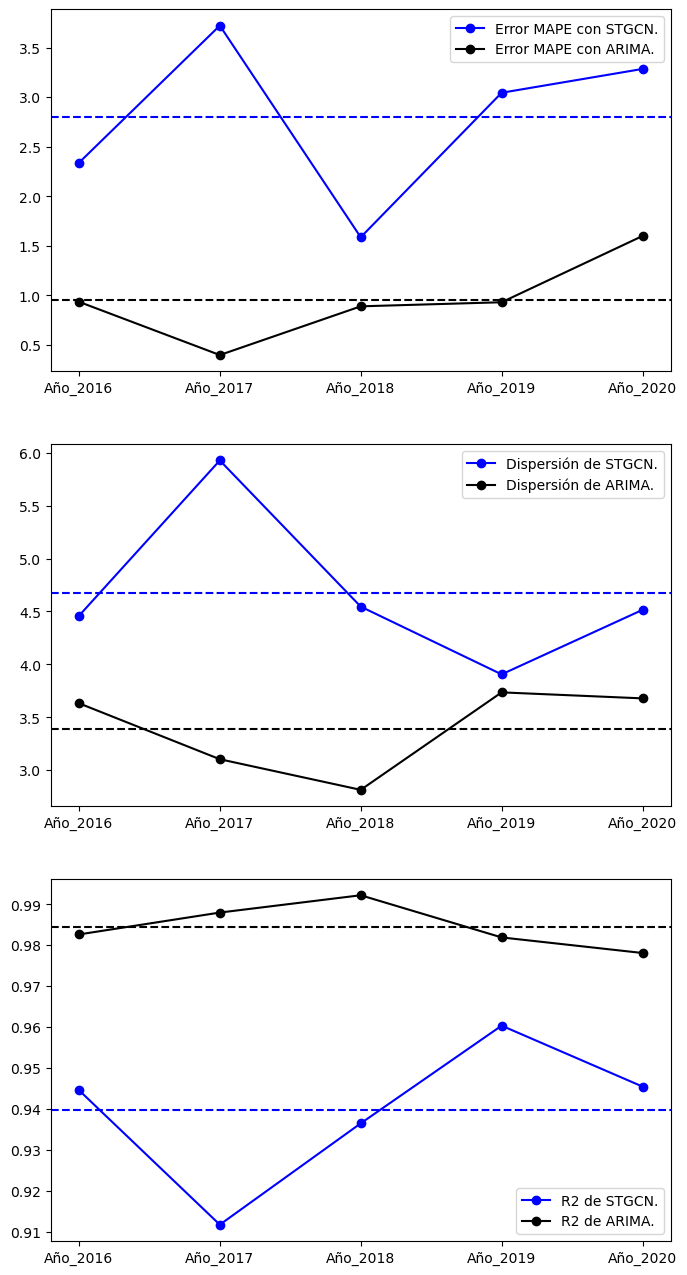

In [37]:
# Coger los datos originales
Año_22_x, Año_23_x, Año_24_x, Año_25_x, Año_26_x = np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1)), np.zeros((2450, 1))
datos = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0).values    
Año_22_x += datos[-5].reshape((2450, 1))
Año_23_x += datos[-4].reshape((2450, 1))
Año_24_x += datos[-3].reshape((2450, 1))
Año_25_x += datos[-2].reshape((2450, 1))
Año_26_x += datos[-1].reshape((2450, 1))
#####################################################################
NewY = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Y_guardado_26.csv').values


Y_STGCN_Inter = pd.DataFrame({'Año_2016': NewY[0], \
                              'Año_2017': NewY[0], \
                              'Año_2018': NewY[0], \
                              'Año_2019': NewY[0], \
                              'Año_2020': NewY[0]})

NewY = pd.read_csv('./Y_guardado_26.csv', header=0)

# mean = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Aux.csv').values[0][0]
# iqr  = pd.read_csv('C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Aux.csv').values[1][0]

#####################################################################

# Lista de paises a examinar
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
#data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2_Sin_0.csv', header=0)

colums = data.columns
    
paises_buenos, paises_malos = [], []



lista_negra = ["USA", "MEX", "CAN"]
for column in colums:
    pais_origen, pais_destino = column.split("-")
    if pais_origen not in lista_negra and pais_destino not in lista_negra:
        paises_buenos.append(column)

lista_blanca = ["USA", "CHN"]
for column in colums:
    pais_origen, pais_destino = column.split("-")
    if pais_origen in lista_blanca or pais_destino in lista_blanca:
        paises_malos.append(column)

# Lista negra:
paises = [data.columns.get_loc(col) for col in paises_buenos if col in data.columns]
# Lista blanca:
#paises = [data.columns.get_loc(col) for col in paises_malos]
#print(Año_22_x[paises].mean())
# Usar todos los paises:
paises = [aux for aux, _ in enumerate(data.columns)]
####################################################


X = pd.DataFrame({'Año_2016': Año_22_x[paises].reshape(-1), \
                  'Año_2017': Año_23_x[paises].reshape(-1), \
                  'Año_2018': Año_24_x[paises].reshape(-1), \
                  'Año_2019': Año_25_x[paises].reshape(-1), \
                  'Año_2020': Año_26_x[paises].reshape(-1)})


Y_ARIMA = pd.DataFrame({'Año_2016': Año_22_yARIMA[paises].reshape(-1), \
                        'Año_2017': Año_23_yARIMA[paises].reshape(-1), \
                        'Año_2018': Año_24_yARIMA[paises].reshape(-1), \
                        'Año_2019': Año_25_yARIMA[paises].reshape(-1), \
                        'Año_2020': Año_26_yARIMA[paises].reshape(-1)})




Y_STGCN_Inter = pd.DataFrame({'Año_2016': Año_22_y_Inter_1[paises].reshape(-1), \
                              'Año_2017': Año_23_y_Inter_1[paises].reshape(-1), \
                              'Año_2018': Año_24_y_Inter_1[paises].reshape(-1), \
                              'Año_2019': Año_25_y_Inter_1[paises].reshape(-1), \
                              'Año_2020': Año_26_y_Inter_1[paises].reshape(-1)})

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 16))


#mean = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/Aux.csv').values[0][0]
#iqr  = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/Aux.csv').values[1][0]

# Plot the mean lines
#plt.axhline(MAE_STGCN/3, linestyle='--', color='red', label='MAE_STGCN')

columns = []
MAE_STGCN_Inter, MAE_ARIMA = [], []
RMSE_STGCN_Inter, RMSE_ARIMA = [], []
Std_STGCN, Std_ARIMA = [], []
R2_STGCN, R2_ARIMA = [], []

escalado = False
escalador = "robust_original"
number = 1
for (column, values_X), (_, values_STGCN), (_, values_ARIMA) \
    in zip(X.iteritems(), Y_STGCN_Inter.iteritems(), Y_ARIMA.iteritems()):

    X_aux = pd.DataFrame({column: values_X})
    Y_STGCN_Inter_aux = pd.DataFrame({column: values_STGCN})
    Y_ARIMA_aux = pd.DataFrame({column: values_ARIMA})
    
    # Escalado
    if escalado:
        mean = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{number}/Aux.csv').values[0][0]
        iqr  = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{number}/Aux.csv').values[1][0]

        
        values_X = scale(values_X, mean, iqr, escalador)
        values_ARIMA = scale(values_ARIMA, mean, iqr, escalador)
        values_STGCN = scale(values_STGCN, mean, iqr, escalador)
    
    # Error Cuadratico
    EC_STGCN = (((values_STGCN - values_X)**2).sum()/len(values_X))**(1/2)
    EC_ARIMA = (((values_ARIMA - values_X)**2).sum()/len(values_X))**(1/2)
    #EC_STGCN = (((values_STGCN - values_X)/(values_X))**2).replace(np.inf, 0)
    #EC_STGCN = (((values_STGCN - values_X))**2).replace(np.inf, 0)
    #EC_ARIMA = (((values_ARIMA - values_X)/(values_X))**2).replace(np.inf, 0)
    #EC_ARIMA = (((values_ARIMA - values_X))**2).replace(np.inf, 0)
    
    # Error Absoluto
    EA_STGCN = ((abs(values_STGCN - values_X)).sum()/len(values_X))
    EA_ARIMA = ((abs(values_ARIMA - values_X)).sum()/len(values_X))
    
    
    RMSE_STGCN_Inter.append(EC_STGCN/EA_STGCN)
    RMSE_ARIMA.append(EC_ARIMA/EA_ARIMA)
    
    
    # Error Absoluto Porcentual
    MAPE_STGCN = (((abs(values_STGCN - values_X)/(values_X)).replace(np.inf, 0).sum())/len(values_X))
    MAPE_ARIMA = (((abs(values_ARIMA - values_X)/(values_X)).replace(np.inf, 0).sum())/len(values_X))
    
    MAPE_STGCN = ((abs(values_STGCN - values_X)/(values_X))).replace(np.inf, 0)
    #MAPE_STGCN = pd.Series( [ abs((value_X - value_STGCN)/(value_X)) if value_X!=0 else abs(value_STGCN) \
    #                           for value_X, value_STGCN in zip(values_X, values_STGCN)] )
    MAPE_ARIMA = ((abs(values_ARIMA - values_X)/(values_X))).replace(np.inf, 0)
    #MAPE_ARIMA = pd.Series( [ abs((value_X - value_ARIMA)/(value_X)) if value_X!=0 else abs(value_ARIMA) \
    #                           for value_X, value_ARIMA in zip(values_X, values_ARIMA)] )
    
    MAE_STGCN_Inter.append(np.mean(MAPE_STGCN))
    MAE_ARIMA.append(np.mean(MAPE_ARIMA))
    
    Std_STGCN.append((np.std(MAPE_STGCN)))
    Std_ARIMA.append((np.std(MAPE_ARIMA)))
    
    columns.append(column)
    number += 1
    
    
    R2_STGCN.append(r2_score(values_X, values_STGCN))
    R2_ARIMA.append(r2_score(values_X, values_ARIMA))


data_std = {
    'Year': [2016, 2017, 2018, 2019, 2020, "mean"],
    'std-ARIMA': [Std_ARIMA[0], Std_ARIMA[1], Std_ARIMA[2], Std_ARIMA[3], Std_ARIMA[4], np.mean(Std_ARIMA)],
    'mean-ARIMA': [MAE_ARIMA[0], MAE_ARIMA[1], MAE_ARIMA[2], MAE_ARIMA[3], MAE_ARIMA[4], np.mean(MAE_ARIMA)],
    'std-STGCN': [Std_STGCN[0], Std_STGCN[1], Std_STGCN[2], Std_STGCN[3], Std_STGCN[4], np.mean(Std_STGCN)],
    'mean-STGCN': [MAE_STGCN_Inter[0], MAE_STGCN_Inter[1], MAE_STGCN_Inter[2], MAE_STGCN_Inter[3], MAE_STGCN_Inter[4], np.mean(MAE_STGCN_Inter)]
}
df_std = pd.DataFrame(data_std)


ax1.plot(columns, MAE_STGCN_Inter, marker='o', linestyle='-', color='blue', label="Error MAPE con STGCN.") # a un año
ax1.axhline(np.mean(MAE_STGCN_Inter), linestyle='--', color='blue')

ax1.plot(columns, MAE_ARIMA, marker='o', linestyle='-', color='black', label="Error MAPE con ARIMA.") # a un año
ax1.axhline(np.mean(MAE_ARIMA), linestyle='--', color='black')
#ax1.plot(columns[-3:], [0.52, 0.49, 0.52], marker='o', linestyle='-', color='cyan', label="Error MAE a 3 años con STGCN.")
#ax1.plot(columns[-3:], [0.39, 0.49, 0.59], marker='o', linestyle='-', color='grey', label="Error MAE a 3 años con ARIMA.")


ax2.plot(columns, RMSE_STGCN_Inter, marker='o', linestyle='-', color='blue', label="Dispersión de STGCN.") # a un año
ax2.axhline(np.mean(RMSE_STGCN_Inter), linestyle='--', color='blue')

ax2.plot(columns, RMSE_ARIMA, marker='o', linestyle='-', color='black', label="Dispersión de ARIMA.") # a un año
ax2.axhline(np.mean(RMSE_ARIMA), linestyle='--', color='black')


ax3.plot(columns, R2_STGCN, marker='o', linestyle='-', color='blue', label="R2 de STGCN.") # a un año
ax3.axhline(np.mean(R2_STGCN), linestyle='--', color='blue')

ax3.plot(columns, R2_ARIMA, marker='o', linestyle='-', color='black', label="R2 de ARIMA.") # a un año
ax3.axhline(np.mean(R2_ARIMA), linestyle='--', color='black')

ax1.legend()
ax2.legend()
ax3.legend()

for rmse in R2_STGCN:
    print(format(rmse, ".3f"))
    
print("Media:", format(np.mean(R2_STGCN), ".3f"))

In [10]:
df_std

Year  std-ARIMA  mean-ARIMA   std-STGCN  mean-STGCN
0  2016  17.373199    0.934615  123.794313   14.469147
1  2017   2.392236    0.397520  100.104054   10.949030
2  2018  19.300241    0.888790  124.397242   13.018302
3  2019   9.163584    0.929953   19.984940    2.275186
4  2020  29.423689    1.598680   70.709730    8.516249
5  mean  15.530590    0.949912   87.798056    9.845583

In [47]:
data.mean().mean()

3864720759.730298

In [143]:
(abs((values_ARIMA - values_X)/(values_X))).replace(np.inf, 0)

ARG-ARE    0.131688
AUS-ARE    0.483508
AUT-ARE    0.057022
BEL-ARE    0.125254
BGD-ARE    0.528294
             ...   
SWE-ZAF    0.050997
THA-ZAF    0.144795
TUR-ZAF    0.213801
USA-ZAF    0.258559
VNM-ZAF    0.198504
Name: Año_2020, Length: 1960, dtype: float64

In [151]:
def log_scale(x):
    '''
    Aplicar la fórmula de normalización robusta
    :param x: np.ndarray, input array to be normalized.
    :param mean: float, the value of mean.
    :param iqr: float, interquartile range.
    :return: np.ndarray, robust normalized array.
    '''
    # Aplicar la fórmula de normalización robusta
    normalized_data = np.log(x)
    
    return normalized_data

log_scale(data)

data.min().min()

0.0

In [142]:
values_ARIMA

ARG-ARE    3.698547e+08
AUS-ARE    2.729917e+09
AUT-ARE    5.721889e+08
BEL-ARE    2.107686e+09
BGD-ARE    5.348171e+08
               ...     
SWE-ZAF    1.696003e+08
THA-ZAF    4.487295e+09
TUR-ZAF    1.042457e+09
USA-ZAF    1.661903e+08
VNM-ZAF    2.668944e+07
Name: Año_2020, Length: 1960, dtype: float64

In [45]:
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)

año = 2016
escalado = True
escalador = "robust_original"
number = 1
for (column, values_X), (_, values_STGCN), (_, values_ARIMA) \
    in zip(X.iteritems(), Y_STGCN_Inter.iteritems(), Y_ARIMA.iteritems()):

    X_aux = pd.DataFrame({column: values_X})
    Y_STGCN_Inter_aux = pd.DataFrame({column: values_STGCN})
    Y_ARIMA_aux = pd.DataFrame({column: values_ARIMA})
    
    # Escalado
    if escalado:
        mean = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{number}/Aux.csv').values[0][0]
        iqr  = pd.read_csv(f'C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/STGCN_IJCAI-18/Datos_Interpolación_1/{number}/Aux.csv').values[1][0]

        
        values_X = scale(values_X, mean, iqr, escalador)
        values_ARIMA = scale(values_ARIMA, mean, iqr, escalador)
        values_STGCN = scale(values_STGCN, mean, iqr, escalador)
    
    
    # Error Absoluto
    EA_STGCN = (abs((values_STGCN - values_X)/(values_X))).replace(np.inf, 0)
    print(EA_STGCN)
    EA_ARIMA = (abs((values_ARIMA - values_X)/(values_X))).replace(np.inf, 0)

    
    values_X.index =  data.columns
    values_STGCN.index = data.columns
    values_ARIMA.index = data.columns
    
    df = pd.DataFrame({'Valor Real': values_X})
    
    df['Valor Predicción STGCN'] = values_STGCN
    #df['Diferencia en STGCN'] = values_STGCN - values_X
    df['Error porcentual en STGCN'] = EA_STGCN
    
    df['Valor Predicción ARIMA'] = values_ARIMA
    #df['Diferencia en ARIMA'] = values_ARIMA - values_X
    df['Error porcentual en ARIMA'] = EA_ARIMA

    df.to_csv(f'info{año}.csv', index=False)
    año += 1
    number += 1



print("Columnas con error porcentual superior a  50.")
print(len(df[df['Error porcentual en STGCN'] > 50]))
print(df[df['Error porcentual en STGCN'] > 50])
print("Columnas con error entre 50 y 1.")
#print(df[(df['Error porcentual'] > 1) & (df['Error porcentual'] < 50)])
print(len(df[(df['Error porcentual en STGCN'] > 1) & (df['Error porcentual en STGCN'] < 50)]))
print(df[(df['Error porcentual en STGCN'] > 1) & (df['Error porcentual en STGCN'] < 50)].iloc[150:200])
print("Columnas con error inferior a  1.")
#print(df[df['Error porcentual'] <= 1])
print(len(df[df['Error porcentual en STGCN'] <= 1]))

AttributeError: 'numpy.ndarray' object has no attribute 'iteritems'

In [168]:
df

Valor Real  Valor Predicción STGCN  Error porcentual en STGCN  \
ARG-ARE   -0.260222               -0.225951                   0.131699   
AUS-ARE   -0.164655               -0.185123                   0.124309   
AUT-ARE   -0.252426               -0.212116                   0.159689   
BEL-ARE   -0.126183                0.006319                   1.050082   
BGD-ARE   -0.265358               -0.230530                   0.131248   
...             ...                     ...                        ...   
SWE-ZAF   -0.278101               -0.201322                   0.276083   
THA-ZAF   -0.024127               -0.180150                   6.466779   
TUR-ZAF   -0.230969               -0.216019                   0.064729   
USA-ZAF   -0.273859               -0.046841                   0.828958   
VNM-ZAF   -0.286756               -0.221282                   0.228324   

         Valor Predicción ARIMA  Error porcentual en ARIMA  
ARG-ARE               -0.264013                   0.014566  
AUS-ARE               -0.104530                   0.365157  
AUT-ARE               -0.250340                   0.008263  
BEL-ARE               -0.146578                   0.161624  
BGD-ARE               -0.252865                   0.047080  
...                         ...                        ...  
SWE-ZAF               -0.277545                   0.002000  
THA-ZAF                0.014226                   1.589637  
TUR-ZAF               -0.218561                   0.053723  
USA-ZAF               -0.277775                   0.014300  
VNM-ZAF               -0.287202                   0.001558  

[1960 rows x 5 columns]

In [50]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

numero = 2016
for (_, values_STGCN), (_, values_ARIMA) \
    in zip(Y_STGCN_Inter.iteritems(), Y_ARIMA.iteritems()):
    print(f"Para el año {numero}:")
    # Prueba de normalidad de Kolmogorov-Smirnov
    kstest_ARIMA = stats.kstest(values_ARIMA, 'norm')
    kstest_STGCN_Inter = stats.kstest(values_STGCN, 'norm')

    print("Prueba de normalidad de Kolmogorov-Smirnov:")
    print(f"ARIMA: Estadístico de prueba: {kstest_ARIMA.statistic}, p-value: {kstest_ARIMA.pvalue}")
    print(f"STGCN_Inter: Estadístico de prueba: {kstest_STGCN_Inter.statistic}, p-value: {kstest_STGCN_Inter.pvalue}")

    # Prueba de normalidad de Jarque-Bera
    jbtest_ARIMA = sm.stats.stattools.jarque_bera(Y_ARIMA)
    jbtest_STGCN_Inter = sm.stats.stattools.jarque_bera(Y_STGCN_Inter)

    print("\nPrueba de normalidad de Jarque-Bera:")
    print(f"ARIMA: Estadístico de prueba: {jbtest_ARIMA[0]}, p-value: {jbtest_ARIMA[1]}")
    print(f"STGCN_Inter: Estadístico de prueba: {jbtest_STGCN_Inter[0]}, p-value: {jbtest_STGCN_Inter[1]}\n\n")
    numero += 1

Para el año 2016:
Prueba de normalidad de Kolmogorov-Smirnov:
ARIMA: Estadístico de prueba: 0.9877551020408163, p-value: 0.0
STGCN_Inter: Estadístico de prueba: 1.0, p-value: 0.0

Prueba de normalidad de Jarque-Bera:
ARIMA: Estadístico de prueba: [3941130.24423673 3381850.98615465 3183535.6546603  2873129.56846791
 2542374.17488723], p-value: [0. 0. 0. 0. 0.]
STGCN_Inter: Estadístico de prueba: [1174178.79997081  824606.77393244 1570058.22724944 1823111.04975106
 1479143.08937299], p-value: [0. 0. 0. 0. 0.]


Para el año 2017:
Prueba de normalidad de Kolmogorov-Smirnov:
ARIMA: Estadístico de prueba: 0.9861224489795919, p-value: 0.0
STGCN_Inter: Estadístico de prueba: 1.0, p-value: 0.0

Prueba de normalidad de Jarque-Bera:
ARIMA: Estadístico de prueba: [3941130.24423673 3381850.98615465 3183535.6546603  2873129.56846791
 2542374.17488723], p-value: [0. 0. 0. 0. 0.]
STGCN_Inter: Estadístico de prueba: [1174178.79997081  824606.77393244 1570058.22724944 1823111.04975106
 1479143.08937299]

In [8]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Supongamos que tienes los valores reales en una Serie o DataFrame llamada 'X'
# y las predicciones en una Serie o DataFrame llamada 'Y_STGCN_Inter'
# Por ejemplo, si ambos son DataFrames y tienen una columna llamada 'valor':
# residuos = X['valor'] - Y_STGCN_Inter['valor']

# Si los datos están en forma de listas o arrays, puedes hacer:
residuos = X['Año_2016'] - Y_STGCN_Inter['Año_2016']

# Crea el histograma de los residuos
fig = go.Figure()
hist, edges = np.histogram(residuos, bins=9)

# Calcular el ancho de las cajas
box_width = (edges[1] - edges[0]) * 0.8
# Obtener las etiquetas de los valores para cada caja
box_labels = [f'{val}' for val in hist]

fig = go.Figure(data=[go.Bar(x=edges, y=hist, marker=dict(line=dict(color='black', width=1)))])

# Añadir las etiquetas en las cajas
for i, val in enumerate(hist):
    fig.add_annotation(
        x=(edges[i] + edges[i+1]) / 2,
        y=val/2,
        text=box_labels[i],
        showarrow=False,
        font=dict(size=12)
    )
    
    
# Agregar líneas verticales para delimitar las cajas
for edge in edges:
    fig.add_shape(type='line',
                  x0=edge, x1=edge,
                  y0=0, y1=max(hist) * 1.1,
                  line=dict(color='gray', width=1, dash='dash'))
    
    
# Personaliza el diseño del histograma
fig.update_layout(title='Histograma de Residuos de STGCN',
                  xaxis_title='Residuos',
                  yaxis_title='Frecuencia',
                  bargap=0.2,
                  bargroupgap=0.2,
                  height=800,  # Set the height of the figure (in pixels)
                  width=1000   # Set the width of the figure (in pixels)
                  )

# Set the tick format to display numbers without scientific notation
fig.update_xaxes(tickformat="e")
fig.show()

In [30]:
residuos.nlargest(5)

2313    1.533150e+11
2332    5.399418e+10
990     5.281280e+10
1467    4.120655e+10
2310    3.382388e+10
Name: Año_2016, dtype: float64

In [34]:
pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0).columns[2313]

'CHN-USA'

In [7]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Supongamos que tienes los valores reales en una Serie o DataFrame llamada 'X'
# y las predicciones en una Serie o DataFrame llamada 'Y_STGCN_Inter'
# Por ejemplo, si ambos son DataFrames y tienen una columna llamada 'valor':
# residuos = X['valor'] - Y_STGCN_Inter['valor']

# Si los datos están en forma de listas o arrays, puedes hacer:
residuos = X['Año_2016'] - Y_ARIMA['Año_2016']

# Crea el histograma de los residuos
fig = go.Figure()
hist, edges = np.histogram(residuos, bins=9)

# Calcular el ancho de las cajas
box_width = (edges[1] - edges[0]) * 0.8
# Obtener las etiquetas de los valores para cada caja
box_labels = [f'{val}' for val in hist]

fig = go.Figure(data=[go.Bar(x=edges, y=hist, marker=dict(line=dict(color='black', width=1)))])

# Añadir las etiquetas en las cajas
for i, val in enumerate(hist):
    fig.add_annotation(
        x=(edges[i] + edges[i+1]) / 2,
        y=val/2,
        text=box_labels[i],
        showarrow=False,
        font=dict(size=12)
    )
    
    
# Agregar líneas verticales para delimitar las cajas
for edge in edges:
    fig.add_shape(type='line',
                  x0=edge, x1=edge,
                  y0=0, y1=max(hist) * 1.1,
                  line=dict(color='gray', width=1, dash='dash'))
    
    
# Personaliza el diseño del histograma
fig.update_layout(title='Histograma de Residuos de ARIMA',
                  xaxis_title='Residuos',
                  yaxis_title='Frecuencia',
                  bargap=0.2,
                  bargroupgap=0.2,
                  height=800,  # Set the height of the figure (in pixels)
                  width=1000   # Set the width of the figure (in pixels)
                  )

# Set the tick format to display numbers without scientific notation
fig.update_xaxes(tickformat="e")
fig.show()

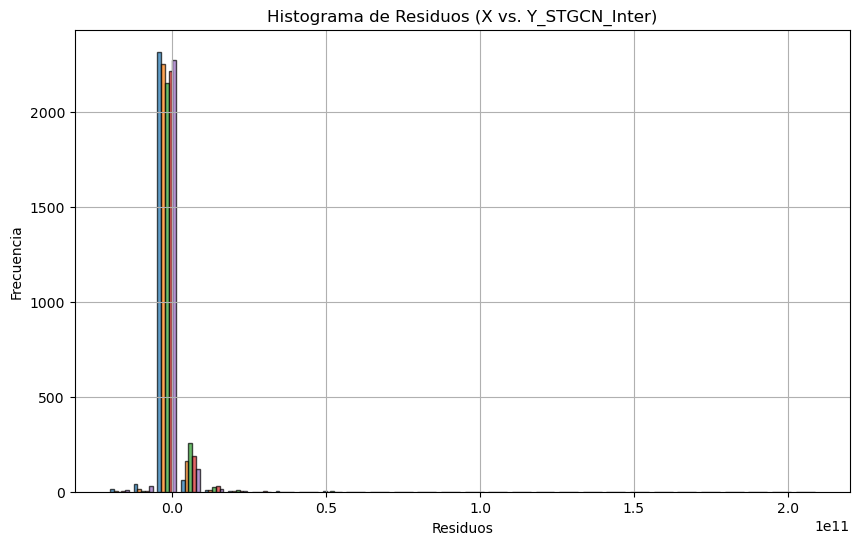

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes los valores reales en una Serie o DataFrame llamada 'X'
# y las predicciones en una Serie o DataFrame llamada 'Y_STGCN_Inter'
# Por ejemplo, si ambos son DataFrames y tienen una columna llamada 'valor':
# residuos = X['valor'] - Y_STGCN_Inter['valor']
residuos = X - Y_STGCN_Inter

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))  # Tamaño de la figura: ancho=10 pulgadas, alto=6 pulgadas

# Histograma de los residuos
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos (X vs. Y_STGCN_Inter)')
plt.grid(True)
plt.show()

In [29]:

columna_3 = ((values_X - values_STGCN)/values_X).replace(-np.inf, 100)

data_stgcn = {
    'Ground truth': values_X.tolist(),
    'STGCN Prediction': values_ARIMA.tolist(),
    'ERROR PORCENTUAL ABSOLUTO': columna_3,
    'Elevar al cuadrado la tercera': columna_3**2,
    'La raíz cuadrada de la cuarta columna': ((columna_3**2))**(1/2),
    'ERROR PORCENTUAL ABSOLUTO 2': EA_STGCN
}

data_stgcn = pd.DataFrame(data_stgcn)

fila_max = data_stgcn.nlargest(20, 'ERROR PORCENTUAL ABSOLUTO')
fila_min = data_stgcn.nsmallest(20, 'ERROR PORCENTUAL ABSOLUTO')

cantidad_infinitos = np.sum(np.isinf(columna_3))
print(cantidad_infinitos)
print(len(((values_X - values_STGCN)/(values_X))))
#print((data_stgcn["Error cuadratico"].mean())**(1/2))
#print((data_stgcn["Error cuadratico"].std())**(1/2))
#print(fila_max,"\n\n\n", fila_min)

0
2450


In [30]:
data_stgcn

Ground truth  STGCN Prediction  ERROR PORCENTUAL ABSOLUTO  \
0     4.259466e+08      3.698547e+08                   0.474989   
1     1.840177e+09      2.729917e+09                  -0.015971   
2     5.413217e+08      5.721889e+08                  -0.063863   
3     2.409485e+09      2.107686e+09                  -0.212669   
4     3.499438e+08      5.348171e+08                   0.501604   
...            ...               ...                        ...   
2445  6.497891e+08      8.404303e+08                  -0.243208   
2446  2.124773e+09      2.034591e+09                   0.018449   
2447  5.737725e+08      6.983389e+08                   0.213068   
2448  4.453252e+09      5.916206e+09                  -0.186522   
2449  7.024335e+08      7.258919e+08                   0.286534   

      Elevar al cuadrado la tercera  La raíz cuadrada de la cuarta columna  \
0                          0.225615                               0.474989   
1                          0.000255                               0.015971   
2                          0.004078                               0.063863   
3                          0.045228                               0.212669   
4                          0.251607                               0.501604   
...                             ...                                    ...   
2445                       0.059150                               0.243208   
2446                       0.000340                               0.018449   
2447                       0.045398                               0.213068   
2448                       0.034790                               0.186522   
2449                       0.082102                               0.286534   

      ERROR PORCENTUAL ABSOLUTO 2  
0                        0.474989  
1                        0.015971  
2                        0.063863  
3                        0.212669  
4                        0.501604  
...                           ...  
2445                     0.243208  
2446                     0.018449  
2447                     0.213068  
2448                     0.186522  
2449                     0.286534  

[2450 rows x 6 columns]

In [31]:
print(data_stgcn["La raíz cuadrada de la cuarta columna"].mean())
print(data_stgcn["La raíz cuadrada de la cuarta columna"].std())

4.794229500753455
44.92624221123146


In [9]:
(data_stgcn["La raíz cuadrada de la cuarta columna"] == data_stgcn["ERROR PORCENTUAL ABSOLUTO 2"]).all()

False

In [52]:
EA_STGCN

0       0       0.016217
1       0.002197
2       0.00...
1       0       0.059883
1       0.008113
2       0.02...
2       0       0.558129
1       0.075615
2       0.18...
3       0       4.809301
1       0.651559
2       1.61...
4       0       0.058333
1       0.007903
2       0.01...
                              ...                        
2445    0       1.360704
1       0.184347
2       0.45...
2446    0       0.337378
1       0.045708
2       0.11...
2447    0       0.423611
1       0.057390
2       0.14...
2448    0       9.278168
1       1.256996
2       3.11...
2449    0       1.127036
1       0.152690
2       0.37...
Length: 2450, dtype: object

[0.46, 0.42, 0.48]
[0.31, 0.35, 0.35]


C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


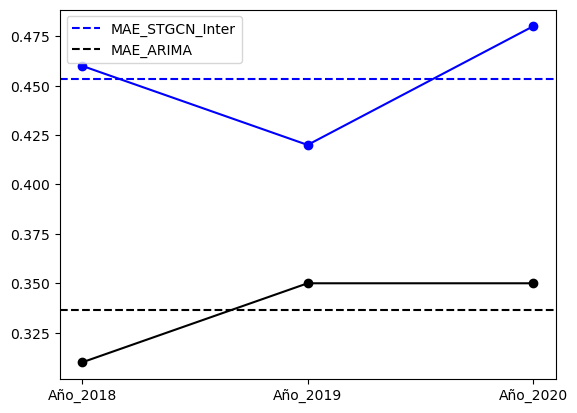

In [46]:
lista_negra = []
for aux in data.columns:
    pais_origen, pais_destino = aux.split("-")
    if pais_origen not in lista_negra and pais_destino not in lista_negra:
        paises_buenos.append(aux)

paises = [data.columns.get_loc(col) for col in paises_buenos]

analisis_anual(paises)

In [181]:
X

Año_2016      Año_2017      Año_2018      Año_2019      Año_2020
0     2.336238e+08  2.168734e+08  2.232512e+08  3.940329e+08  4.259466e+08
1     1.724430e+09  2.564634e+09  2.816917e+09  2.580638e+09  1.840177e+09
2     6.964444e+08  6.963535e+08  6.845775e+08  5.578825e+08  5.413217e+08
3     3.543592e+09  3.742097e+09  3.487392e+09  2.659086e+09  2.409485e+09
4     2.176186e+08  4.293119e+08  4.295831e+08  4.327286e+08  3.499438e+08
...            ...           ...           ...           ...           ...
2445  6.756006e+08  7.343538e+08  7.704999e+08  8.031384e+08  6.497891e+08
2446  2.112000e+09  2.478538e+09  2.844221e+09  2.449714e+09  2.124773e+09
2447  4.235595e+08  4.914453e+08  5.534345e+08  5.682604e+08  5.737725e+08
2448  4.574973e+09  5.012335e+09  5.519189e+09  5.286287e+09  4.453252e+09
2449  9.400350e+08  8.007808e+08  7.210356e+08  7.708434e+08  7.024335e+08

[2450 rows x 5 columns]

In [47]:
analisis()#(slice(None), False, "./dataset/Datos_TODO_reducido_interpolado_2.csv")
# ARIMA está bien!



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    3.73   |     1.53       |   1.25    |
------------------------------------------------------------
|     RMSE        |    14.42   |     7.56       |   3.89    |
------------------------------------------------------------


C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [14]:
analisis_ultimo()



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   STCGN_Inter_5  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    1.27   |     0.52 |   0.50       |   0.52    |
------------------------------------------------------------
|     RMSE        |    4.57   |     2.49 |   2.26      |   1.67    |
------------------------------------------------------------


In [ ]:
Resultado posible:
    
------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    3.73   |     1.53       |   1.25    |
------------------------------------------------------------
|     RMSE        |    14.42   |     7.56       |   3.89    |
------------------------------------------------------------

In [182]:
X = pd.DataFrame({'Año_24': Año_24_x[column_positions].reshape(-1), \
                      'Año_25': Año_25_x[column_positions].reshape(-1), \
                      'Año_26': Año_26_x[column_positions].reshape(-1)})

Y_STGCN = pd.DataFrame({'Año_24': Año_24_y[column_positions].reshape(-1), \
                            'Año_25': Año_25_y[column_positions].reshape(-1), \
                            'Año_26': Año_26_y[column_positions].reshape(-1)})

def MAE(v, v_):
    '''
    Mean absolute error.
    :param v: np.ndarray or int, ground truth.
    :param v_: np.ndarray or int, prediction.
    :return: int, MAE averages on all elements of input.
    '''
    return np.mean(np.abs(v_ - v))

print(scale(X, mean, iqr))

print(MAE(scale(X.values, mean, iqr), scale(Y_STGCN, mean, iqr)))


     Año_24    Año_25     Año_26
0 -0.461977 -0.491083  -0.719126
1 -1.416335 -1.444984  -1.445361
2 -1.783501 -1.782432  -1.783724
3 -1.600150 -1.519793  -1.583821
4 -1.550568 -1.544471  -1.559077
5 -1.773436 -1.771595  -1.769166
6  9.377873  9.014954  10.375341
7  6.908111  6.019959   4.339351
8 -1.540927 -1.558349  -1.543081
9 -1.272298 -1.296290  -1.366951
Año_24    0.518924
Año_25    0.522567
Año_26    0.787103
dtype: float64


C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Mejor puntuación lograda, falta ver como se ha  alcanzado !!

In [ ]:
# p = 6# 
Error de STGCN:
Año_24    8.206433e+09
Año_25    7.514654e+09
Año_26    7.910091e+09
dtype: float64

Error de ARIMA:
Año_24    1.915812e+10
Año_25    1.834900e+10
Año_26    1.779802e+10
dtype: float64

Diferencia entre STGCN y ARIMA:
En RMSE, STGCN tiene  2.34 veces menos error que ARIMA.

ARIMA tiene un MAE de 0.05-0.06, más o menos.
ARIMA tiene un RMSE de 0.17-0.16, más o menos.

¿
--lr 0.01
--normalisation robust
Pesos_TODO_REDUCIDO.csv **
Datos_TODO_reducido.csv
blocks = [[1, 1024, 1024], [1024, 1024, 2048]]
?

In [26]:
data.index[-3:]

RangeIndex(start=73, stop=76, step=1)

In [61]:
Año_24_x[0]

array([2.23251244e+08, 2.81691651e+09, 6.84577471e+08, ...,
       5.53434527e+08, 5.51918948e+09, 7.21035631e+08])

# GENERADOR DE TABLAS ALEATORIAS


Errores absolutos finales del primer año:   1681782026.4
Errores absolutos finales del segundo año:  1644387691.2
Errores absolutos finales del tercer año:   1573714194.8

Errores RMSE finales del primer año:   2266080174.1761293
Errores RMSE finales del segundo año:  2058184093.165467
Errores RMSE finales del tercer año:   1807328653.5534465


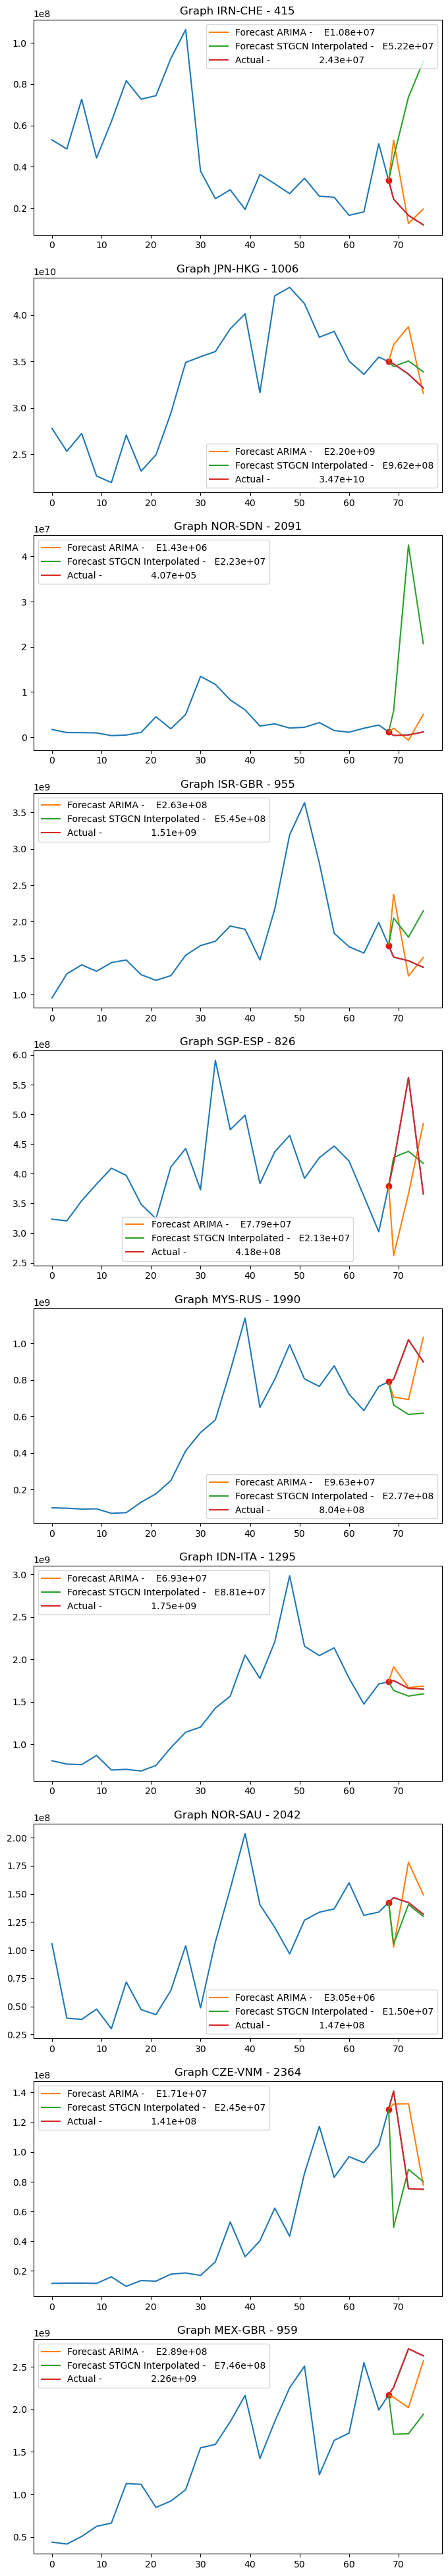

In [65]:
import random

#dict_errores = {}

#for columna, (valorX, valorY) in enumerate(zip(Año_26_x, Año_26_yARIMA)):
#    dict_errores[columna] = MAE(valorX, valorY)

#column_positions = [min(dict_errores, key=dict_errores.get), max(dict_errores, key=dict_errores.get)]

column_positions = [random.randint(0, 2449) for _ in range(10)]

# Get the column number of the 100 largest values
#k = 10  # Number of largest values to retrieve
#column_positions = list(np.argpartition(Año_24_yARIMA, k, axis=None)[-k:])
#column_positions = indices % Año_24_yARIMA.shape[1]

errores =  False

# Create a figure and subplots
fig, axs = plt.subplots(len(column_positions), 1, figsize=(8, 50))

# Plot the forecasted values and confidence intervals
for axis_number, column_position in enumerate(column_positions):
    # data = pd.read_csv('./dataset/Datos_TODO_REDUCIDO.csv', header=0)
    data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
    nombre_columna = data.columns[column_positions[axis_number]]
    data = data.iloc[:, column_position]
    #data.columns.get_loc(column_name)

    axs[axis_number].plot(data.index, data.values)
    axs[axis_number].set_title(f'Graph {nombre_columna} - {column_position}')
    axs[axis_number].plot(68,data.values[68],'ro') 
    
#data.index[-3:], \

    error_ARIMA = abs(float(Año_24_x[column_position] + \
                      Año_25_x[column_position] + \
                      Año_26_x[column_position])- \
                float(Año_24_yARIMA[column_position] + \
                      Año_25_yARIMA[column_position] + \
                      Año_26_yARIMA[column_position]))/3
    
    error = abs(float(Año_24_x[column_position] + \
                      Año_25_x[column_position] + \
                      Año_26_x[column_position])- \
                float(Año_24_y[column_position] + \
                      Año_25_y[column_position] + \
                      Año_26_y[column_position]))/3
    
    error_Inter = abs(float(Año_24_x[column_position] + \
                      Año_25_x[column_position] + \
                      Año_26_x[column_position])- \
                float(Año_24_y_Inter_1[column_position] + \
                      Año_25_y_Inter_1[column_position] + \
                      Año_26_y_Inter_1[column_position]))/3
    
    axs[axis_number].plot([68, 69, 72, 75], \
             np.array([data.values[68], Año_24_yARIMA[column_position], Año_25_yARIMA[column_position], Año_26_yARIMA[column_position]], dtype=object), \
             label=f'Forecast ARIMA -    E{error_ARIMA:.2e}')
    
    axs[axis_number].plot([68, 69, 72, 75], \
             np.array([data.values[68], Año_24_y_Inter_1[column_position], Año_25_y_Inter_1[column_position], Año_26_y_Inter_1[column_position]], dtype=object), \
             label = f'Forecast STGCN Interpolated -   E{error_Inter:.2e}')
    
    axs[axis_number].plot([68, 69, 72, 75], \
             np.array([data.values[68], Año_24_x[column_position], Año_25_x[column_position], Año_26_x[column_position]], dtype=object), \
              label=f'Actual -                 {float(Año_24_x[column_position]):.2e}')
    
    axs[axis_number].legend()
    
    if errores:
        print(nombre_columna, "ERRORES")
        print("Error del primer año: ", MAE(Año_24_x[column_position], Año_24_y[column_position]))
        print("Error del segundo año:", MAE(Año_25_x[column_position], Año_25_y[column_position]))
        print("Error del tercer año: ", MAE(Año_26_x[column_position], Año_26_y[column_position]))
    
print("\nErrores absolutos finales del primer año:  ", MAE(Año_24_x[column_positions], Año_24_y[column_positions]), )
print("Errores absolutos finales del segundo año: ", MAE(Año_25_x[column_positions], Año_25_y[column_positions]), )
print("Errores absolutos finales del tercer año:  ", MAE(Año_26_x[column_positions], Año_26_y[column_positions]), )

print("\nErrores RMSE finales del primer año:  ", RMSE(Año_24_x[column_positions], Año_24_y[column_positions]), )
print("Errores RMSE finales del segundo año: ", RMSE(Año_25_x[column_positions], Año_25_y[column_positions]), )
print("Errores RMSE finales del tercer año:  ", RMSE(Año_26_x[column_positions], Año_26_y[column_positions]), )
    
plt.show()

# GENERADOR DE TABLAS SIN EL ERROR DE DESFASE MASIVO

In [184]:
# "Purificadora de Bases"
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)

good_countries = []
good_position = []
for column_number, column in enumerate(data.columns):
    dataC = data[column]
    #print(dataC.tail(4).iloc[0])
    #print(dataC[72])
    # Quitar el error de valores muy raros.
    
    if dataC.tail(1 + 3*3).iloc[0] == 0:
        variance = 100
    else:
        variance = abs(((Año_24_y[column_number] - dataC.tail(1 + 3*3).iloc[0]) / dataC.tail(1 + 3*3).iloc[0]) * 100)
        
    if variance < 5: 
        #Con 5<, STGNC es mejor que ARIMA, sin embargo a partir del 50 las cosas empeoran muchisimo y de golpe!!
        # 5<variance<50, el sistema es equivalente a ARIMA!!
        
        good_countries.append(column)
        good_position.append(column_number)
        #print(column, column_number, variance)
        
#len(good_countries) - len(data.columns)
data_purificadoAux = data[good_countries]

POL-NLD 1604 [456.90232511]


TypeError: unsupported format string passed to numpy.ndarray.__format__

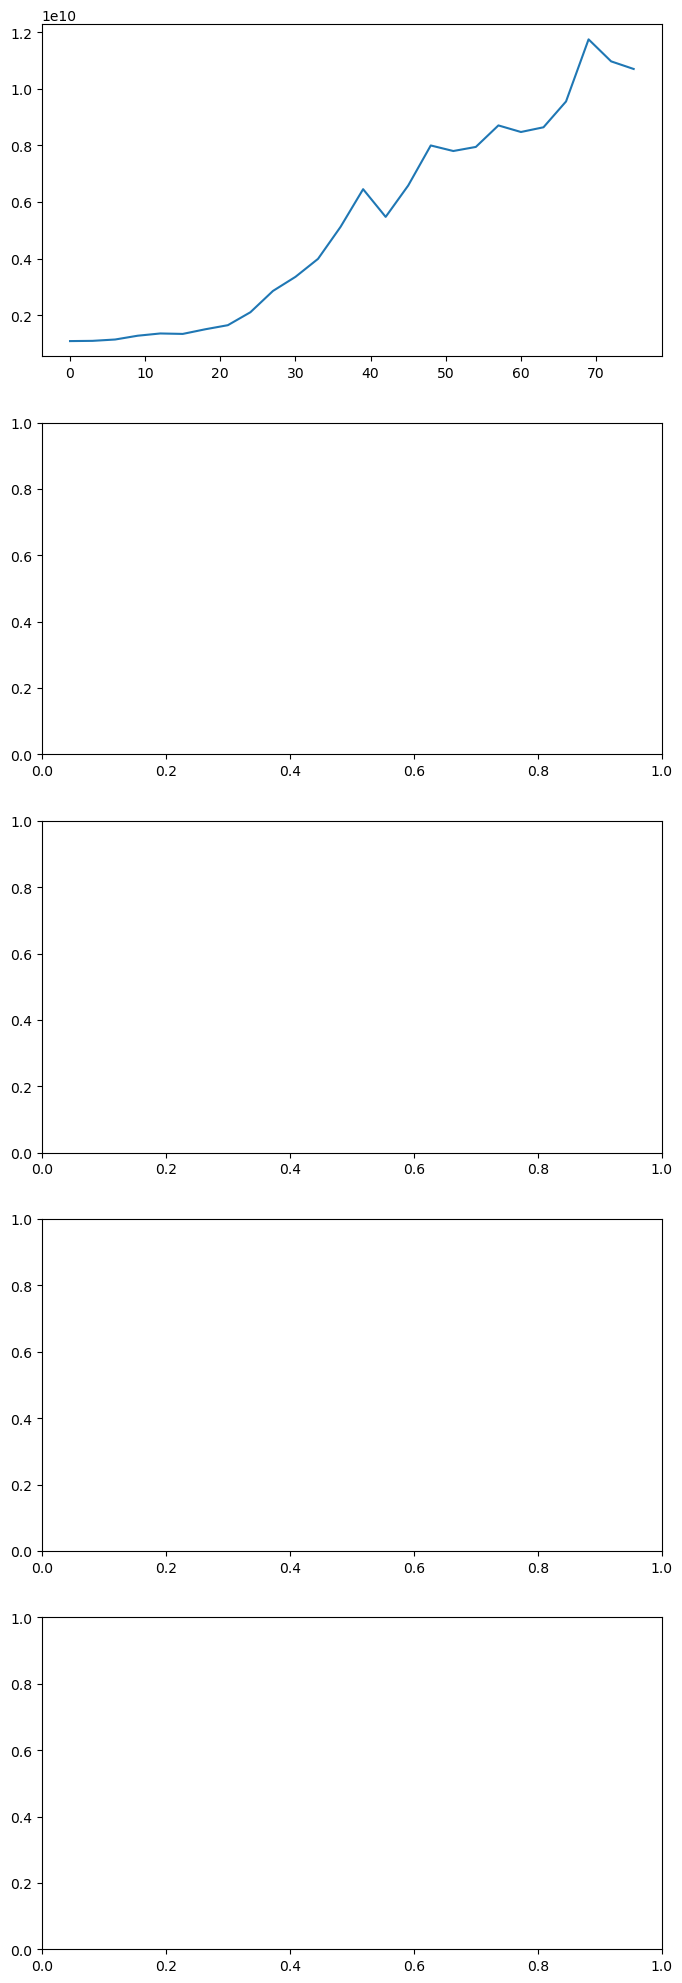

In [185]:
data_purificado = data_purificadoAux.sample(n = 5, axis = 1)
purified_column_positions = [data.columns.get_loc(col) for col in data_purificado.columns]


# Create a figure and subplots
fig, axs = plt.subplots(len(data_purificado.T), 1, figsize=(8, len(data_purificado.T)*5))

# Plot the forecasted values and confidence intervals
for axis_number, (nombre_columna, column_position) in enumerate(zip(data_purificado, purified_column_positions)):
    # Customize the X-axis ticks
    #axs[axis_number].set_xticks(np.arange(0, 26, 1))  # Set specific tick values
    #axs[axis_number].set_xlim(0, 25)  # Set the X-axis limits

    # Customize the Y-axis ticks
    #axs[axis_number].set_yticks(np.arange(-1.1, 1.1, 0.1))  # Set specific tick values
    #axs[axis_number].set_ylim(-0.5, 0.5)  # Set the Y-axis limits
    
    variance = abs(((Año_24_y[column_position] - data_purificado.iloc[22, axis_number]) / data_purificado.iloc[22, axis_number]) * 100)
    
    print(nombre_columna, column_position, variance)
    
    axs[axis_number].plot(data_purificado.index, data_purificado.iloc[:, axis_number].values,\
                          label=f'Actuals -                 {float(Año_26_x[column_position]):.2e}')
    axs[axis_number].set_title(f'Graph {nombre_columna} - {column_position} - {variance:.2e}')

    
    error = abs(float(Año_24_x[column_position] + \
                      Año_25_x[column_position] + \
                      Año_26_x[column_position])- \
                float(Año_24_yARIMA[column_position] + \
                      Año_25_yARIMA[column_position] + \
                      Año_26_yARIMA[column_position]))/3
    
    axs[axis_number].plot([68, 69, 72, 75], \
             [data_purificado.iloc[:, axis_number].values[68], \
              Año_24_yARIMA[column_position],  \
              Año_25_yARIMA[column_position],  \
              Año_26_yARIMA[column_position]], \
             label=f'Forecast ARIMA -   E{error:.2e}')
    
    
    error = abs(float(Año_24_x[column_position] + \
                      Año_25_x[column_position] + \
                      Año_26_x[column_position])- \
                float(Año_24_y[column_position] + \
                      Año_25_y[column_position] + \
                      Año_26_y[column_position]))/3

    axs[axis_number].plot([68, 69, 72, 75], \
             [data_purificado.iloc[:, axis_number].values[68], \
              Año_24_y[column_position],  \
              Año_25_y[column_position],  \
              Año_26_y[column_position]], \
             label = f'Forecast STGCN -  E{error:.2e}')
    
    axs[axis_number].plot([68, 69, 72, 75], \
             [data_purificado.iloc[:, axis_number].values[68], \
              Año_24_x[column_position],  \
              Año_25_x[column_position],  \
              Año_26_x[column_position]], \
                         )
    
    axs[axis_number].legend()
    
    #print(nombre_columna, "ERRORES")
    #print("Error del primer año: ", MAE(Año_24_x[column_position], Año_24_y[column_position]))
    #print("Error del segundo año:", MAE(Año_25_x[column_position], Año_25_y[column_position]))
    #print("Error del tercer año: ", MAE(Año_26_x[column_position], Año_26_y[column_position]))
    
print("\nErrores absolutos finales del primer año:  ", MAE(Año_24_x[purified_column_positions], Año_24_y[purified_column_positions]), )
print("Errores absolutos finales del segundo año: ", MAE(Año_25_x[purified_column_positions], Año_25_y[purified_column_positions]), )
print("Errores absolutos finales del tercer año:  ", MAE(Año_26_x[purified_column_positions], Año_26_y[purified_column_positions]), )

print("\nErrores RMSE finales del primer año:  ", RMSE(Año_24_x[purified_column_positions], Año_24_y[purified_column_positions]), )
print("Errores RMSE finales del segundo año: ", RMSE(Año_25_x[purified_column_positions], Año_25_y[purified_column_positions]), )
print("Errores RMSE finales del tercer año:  ", RMSE(Año_26_x[purified_column_positions], Año_26_y[purified_column_positions]), )

print("\n")
analisis([data.columns.get_loc(col) for col in data_purificadoAux.columns])
print("\nNúmero de relaciones que cumplen esta condición: ", len(good_countries), "\n")
analisis_ultimo([data.columns.get_loc(col) for col in data_purificadoAux.columns])
print("Por alguna razón predecimos mejor a 3 años que ha uno.")
plt.show()

In [13]:
def plotear(data_purificadoAux, data):
    data_purificado = data_purificadoAux.sample(n = 5, axis = 1)
    purified_column_positions = [data.columns.get_loc(col) for col in data_purificado.columns]

    # Create a figure and subplots
    fig, axs = plt.subplots(len(data_purificado.T), 1, figsize=(8, len(data_purificado.T)*5))

    # Plot the forecasted values and confidence intervals
    for axis_number, (nombre_columna, column_position) in enumerate(zip(data_purificado, purified_column_positions)):
        # Customize the X-axis ticks
        #axs[axis_number].set_xticks(np.arange(0, 26, 1))  # Set specific tick values
        #axs[axis_number].set_xlim(0, 25)  # Set the X-axis limits

        # Customize the Y-axis ticks
        #axs[axis_number].set_yticks(np.arange(-1.1, 1.1, 0.1))  # Set specific tick values
        #axs[axis_number].set_ylim(-0.5, 0.5)  # Set the Y-axis limits

        variance = abs(((Año_24_y[column_position] - data_purificado.iloc[22, axis_number]) / data_purificado.iloc[22, axis_number]) * 100)

        print(nombre_columna, column_position, variance)

        axs[axis_number].plot(data_purificado.index, data_purificado.iloc[:, axis_number].values,\
                              label=f'Actuals -                 {float(Año_26_x[column_position]):.2e}')
        axs[axis_number].set_title(f'Graph {nombre_columna} - {column_position} - {variance:.2e}')
        axs[axis_number].plot(68, data_purificado.iloc[:, axis_number].values[68], 'ro') 


        error = abs(float(Año_24_x[column_position] + \
                          Año_25_x[column_position] + \
                          Año_26_x[column_position])- \
                    float(Año_24_yARIMA[column_position] + \
                          Año_25_yARIMA[column_position] + \
                          Año_26_yARIMA[column_position]))/3

        axs[axis_number].plot([68, 69, 72, 75], \
                 [data_purificado.iloc[:, axis_number].values[68], \
                  Año_24_yARIMA[column_position],  \
                  Año_25_yARIMA[column_position],  \
                  Año_26_yARIMA[column_position]], \
                 label=f'Forecast ARIMA -   E{error:.2e}')


        error = abs(float(Año_24_x[column_position] + \
                          Año_25_x[column_position] + \
                          Año_26_x[column_position])- \
                    float(Año_24_y[column_position] + \
                          Año_25_y[column_position] + \
                          Año_26_y[column_position]))/3

        axs[axis_number].plot([68, 69, 72, 75], \
                 [data_purificado.iloc[:, axis_number].values[68], \
                  Año_24_y[column_position],  \
                  Año_25_y[column_position],  \
                  Año_26_y[column_position]], \
                 label = f'Forecast STGCN -  E{error:.2e}')

        axs[axis_number].plot([68, 69, 72, 75], \
                 [data_purificado.iloc[:, axis_number].values[68], \
                  Año_24_x[column_position],  \
                  Año_25_x[column_position],  \
                  Año_26_x[column_position]], \
                             )

        axs[axis_number].legend()

        #print(nombre_columna, "ERRORES")
        #print("Error del primer año: ", MAE(Año_24_x[column_position], Año_24_y[column_position]))
        #print("Error del segundo año:", MAE(Año_25_x[column_position], Año_25_y[column_position]))
        #print("Error del tercer año: ", MAE(Año_26_x[column_position], Año_26_y[column_position]))

    print("\nErrores absolutos finales del primer año:  ", MAE(Año_24_x[purified_column_positions], Año_24_y[purified_column_positions]), )
    print("Errores absolutos finales del segundo año: ", MAE(Año_25_x[purified_column_positions], Año_25_y[purified_column_positions]), )
    print("Errores absolutos finales del tercer año:  ", MAE(Año_26_x[purified_column_positions], Año_26_y[purified_column_positions]), )

    print("\nErrores RMSE finales del primer año:  ", RMSE(Año_24_x[purified_column_positions], Año_24_y[purified_column_positions]), )
    print("Errores RMSE finales del segundo año: ", RMSE(Año_25_x[purified_column_positions], Año_25_y[purified_column_positions]), )
    print("Errores RMSE finales del tercer año:  ", RMSE(Año_26_x[purified_column_positions], Año_26_y[purified_column_positions]), )

    print("\n")
    analisis([data.columns.get_loc(col) for col in data_purificadoAux.columns])
    print("Has pasado ", len(data_purificadoAux.columns), "relaciones/columnas.")
    #analisis_ultimo([data.columns.get_loc(col) for col in data_purificadoAux.columns])
    #print("Por alguna razón predecimos mejor a 3 años que ha uno.")
    plt.show()

# PROYECTO DEPURACIÓN DE PRIMER GRADO

In [209]:
def sacar_stats(column_positions = slice(None)):
    
    X = pd.DataFrame({'Año_24': Año_24_x[column_positions].reshape(-1), \
                      'Año_25': Año_25_x[column_positions].reshape(-1), \
                      'Año_26': Año_26_x[column_positions].reshape(-1)})

    Y_STGCN = pd.DataFrame({'Año_24': Año_24_y_Inter[column_positions].reshape(-1), \
                            'Año_25': Año_25_y_Inter[column_positions].reshape(-1), \
                            'Año_26': Año_26_y_Inter[column_positions].reshape(-1)})

    Y_ARIMA = pd.DataFrame({'Año_24': Año_24_yARIMA[column_positions].reshape(-1), \
                            'Año_25': Año_25_yARIMA[column_positions].reshape(-1), \
                            'Año_26': Año_26_yARIMA[column_positions].reshape(-1)})
    
    MAE_STGCN = f'{(np.mean(np.abs(scale(X.values, mean, iqr)-scale(Y_STGCN.values, mean, iqr))) ):.2f}'
    #f'{(sum(MAE(scale(X.values, mean, iqr), scale(Y_STGCN.values, mean, iqr)))):.2f}'
    MAE_ARIMA = f'{(np.mean(np.abs(scale(X.values, mean, iqr)-scale(Y_ARIMA.values, mean, iqr))) ):.2f}'
    #f'{(sum(MAE(scale(X.values, mean, iqr), scale(Y_ARIMA, mean, iqr)))):.2f}'
    
    RMSE_STGCN = f'{(np.sqrt(np.mean((scale(X.values, mean, iqr)-scale(Y_STGCN.values, mean, iqr)) ** 2))):.2f}'
    #f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_STGCN, mean, iqr)))):.2f}'
    RMSE_ARIMA = f'{(np.sqrt(np.mean((scale(X.values, mean, iqr)-scale(Y_ARIMA.values, mean, iqr)) ** 2))):.2f}'
    #f'{(sum(RMSE(scale(X.values, mean, iqr), scale(Y_ARIMA, mean, iqr)))):.2f}'
    
        
    RMSE_ARIMA_STGCN = f'{(float(RMSE_STGCN)/float(RMSE_ARIMA)):.2f}'
    if float(MAE_ARIMA) == 0:
        MAE_ARIMA_STGCN = RMSE_ARIMA_STGCN
    else:
        MAE_ARIMA_STGCN = f'{(float(MAE_STGCN)/float(MAE_ARIMA)):.2f}'
    
    return [MAE_STGCN, MAE_ARIMA], [RMSE_STGCN, RMSE_ARIMA], MAE_ARIMA_STGCN, RMSE_ARIMA_STGCN
    

In [187]:
# "Purificadora de Bases"
# Divide los datos según el la apertura comercial de la relación.
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
graduación = pd.read_csv('./dataset/Matriz_primer_grado_Porcetual.csv', header=0)

indexX = []

MAE_Y, RMSE_Y, MAE_ARIMA_STGCN_Y, RMSE_ARIMA_STGCN_Y = [], [], [], []
especificidad = 10

for x in range(int(100/especificidad)):
    commerce_relationships = []
    for column_number, column in enumerate(data.columns):
        dataC = data[column]
        graduaciónC = graduación[column]
        if (x+1)*(especificidad) > graduaciónC.values > x*(especificidad):
            commerce_relationships.append(column)

    MAE, RMSE, MAE_ARIMA_STGCN, RMSE_ARIMA_STGCN = sacar_stats([data.columns.get_loc(col) for col in commerce_relationships])

    MAE_Y.append(MAE)
    RMSE_Y.append(RMSE)
    MAE_ARIMA_STGCN_Y.append(float(MAE_ARIMA_STGCN))
    RMSE_ARIMA_STGCN_Y.append(float(RMSE_ARIMA_STGCN))
    
    #indexX.append(f"{(x*especificidad/100):.0%} - {((x+1)*especificidad/100):.0%}")
    indexX.append(f"{((x+1)*especificidad/100):.0%}")

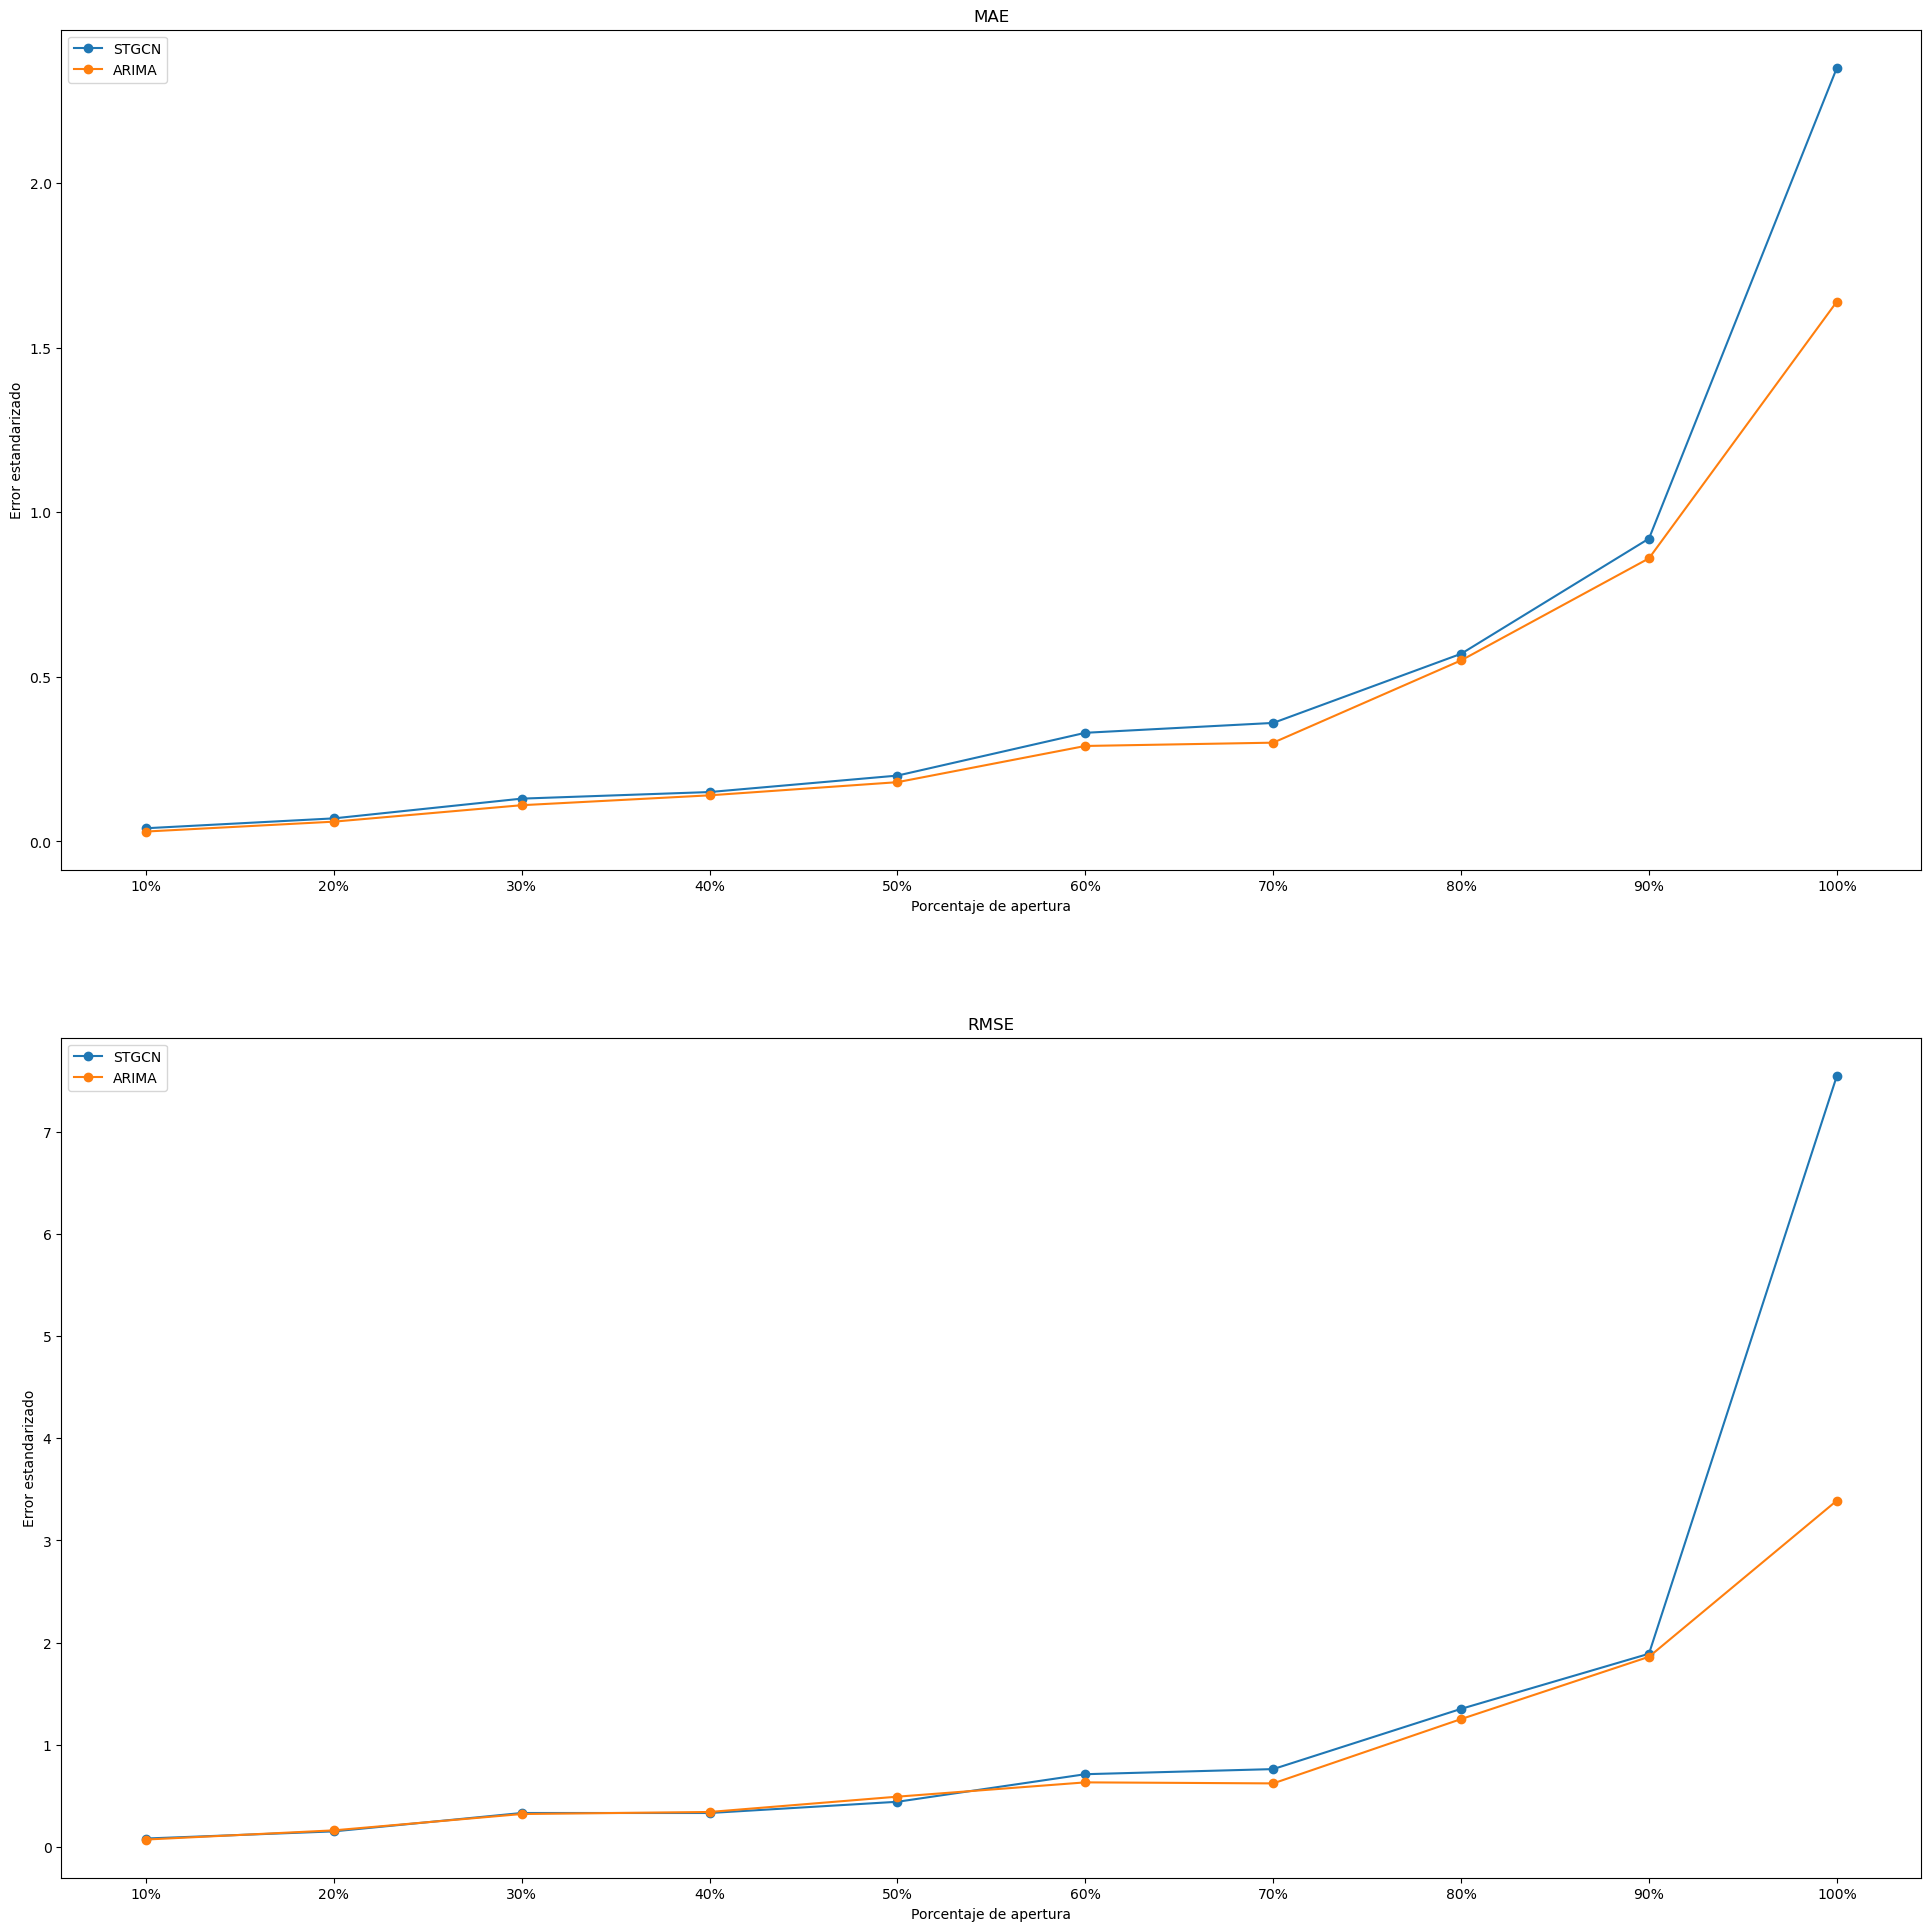

In [188]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(24, 24)) # Width: 8 inches, Height: 6 inches

axs[0].plot(indexX, [float(col[0]) for col in MAE_Y], 'o-', label='STGCN')
axs[0].plot(indexX, [float(col[1]) for col in MAE_Y], 'o-', label='ARIMA')
axs[0].set_title('MAE')
axs[0].set_xlabel("Porcentaje de apertura")
axs[0].set_ylabel("Error estandarizado")
axs[0].legend()


axs[1].plot(indexX, [float(col[0]) for col in RMSE_Y], 'o-', label='STGCN')
axs[1].plot(indexX, [float(col[1]) for col in RMSE_Y], 'o-', label='ARIMA')
axs[1].set_title('RMSE')
axs[1].set_xlabel("Porcentaje de apertura")
axs[1].set_ylabel("Error estandarizado")
axs[1].legend()

# Display the subplots
plt.show()

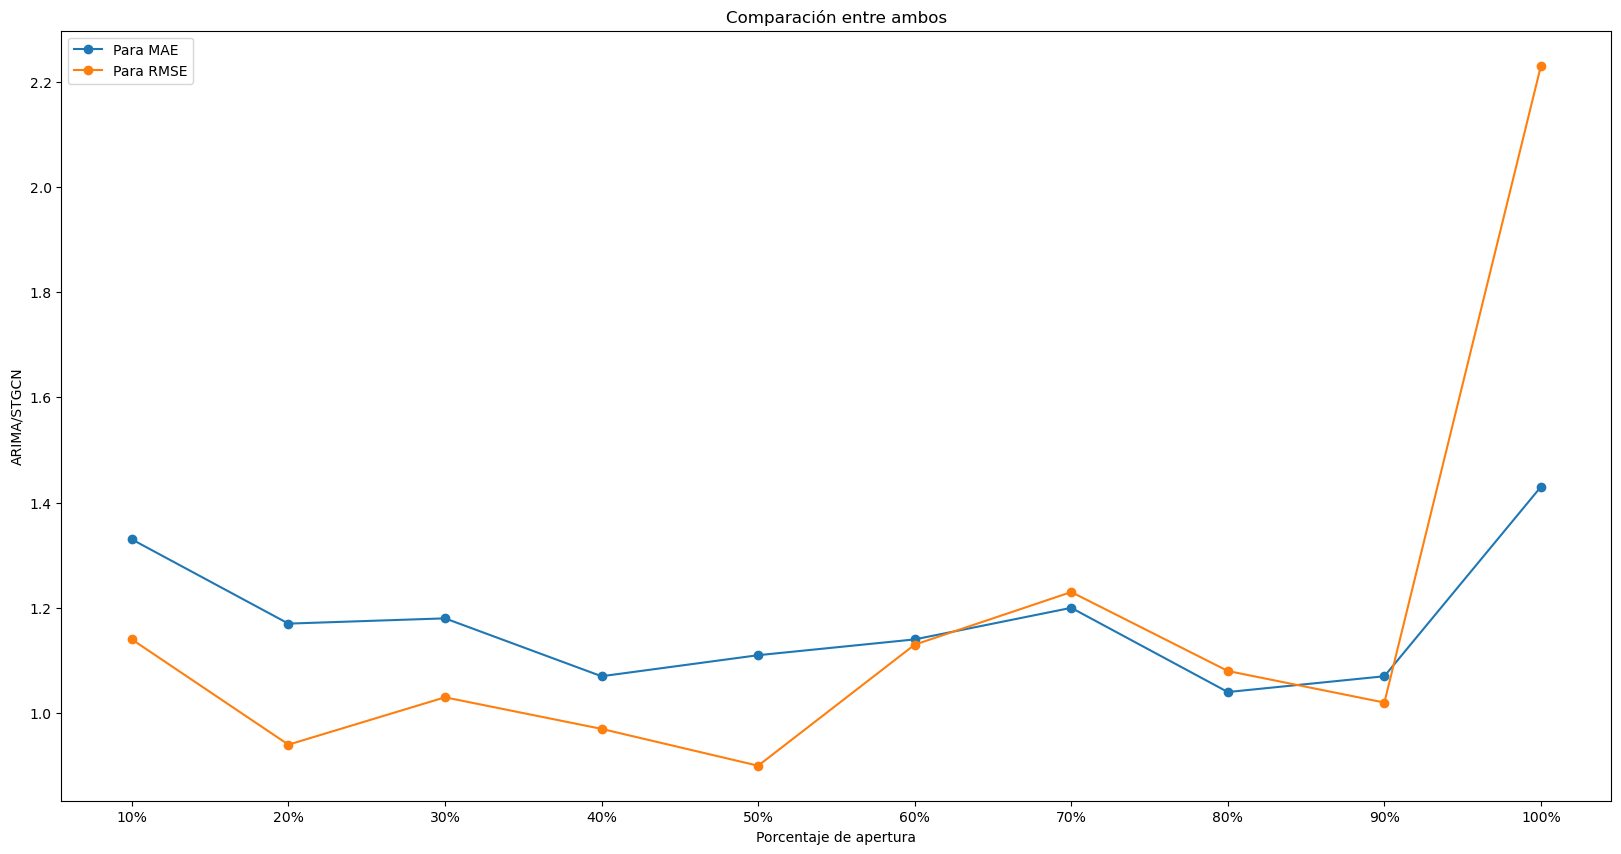

In [189]:
plt.figure(figsize=(20,10))

plt.plot(indexX, MAE_ARIMA_STGCN_Y, 'o-', label='Para MAE')
plt.plot(indexX, RMSE_ARIMA_STGCN_Y, 'o-', label='Para RMSE')
plt.title('Comparación entre ambos')
plt.xlabel("Porcentaje de apertura")
plt.ylabel("ARIMA/STGCN")
plt.legend()
plt.show()

In [201]:
# "Purificadora de Bases"
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
graduación = pd.read_csv('./dataset/Matriz_primer_grado_Porcetual.csv', header=0)

small_commerce_relationships = []
medium_commerce_relationships = []
big_commerce_relationships = []
for column_number, column in enumerate(data.columns):
    dataC = data[column]
    graduaciónC = graduación[column]
    
    if 5 > graduaciónC.values > 0:
        small_commerce_relationships.append(column) # HIGH MAE RELATONSHIPS
    elif 95 > graduaciónC.values > 5:
        medium_commerce_relationships.append(column) # BEST RELATINSHIPS
    else:
        big_commerce_relationships.append(column) # HIGH RMSE RELATINSHIPS



In [202]:
analisis([data.columns.get_loc(col) for col in small_commerce_relationships])



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    2.22   |     0.09       |   0.03    |
------------------------------------------------------------
|     RMSE        |    2.23   |     0.10       |   0.07    |
------------------------------------------------------------


C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [203]:
analisis([data.columns.get_loc(col) for col in medium_commerce_relationships])



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    3.04   |     1.14       |   1.06    |
------------------------------------------------------------
|     RMSE        |    9.17   |     3.35       |   3.36    |
------------------------------------------------------------


In [204]:
analisis([data.columns.get_loc(col) for col in big_commerce_relationships])



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    17.59   |     9.92       |   5.80    |
------------------------------------------------------------
|     RMSE        |    51.20   |     30.56       |   9.82    |
------------------------------------------------------------


###### OBSERVACIÓN

if 90 > graduaciónC.values > 0:

    - En RMSE, ARIMA tiene  1.05 veces menos error que STGCN.
    - En MAE, ARIMA tiene  1.10 veces menos error que STGCN.
    

Umm curioso, la mayor  parte del error biene del top 95 por ciento de apertura comercial!!

Parece que en el resto es similar a ARIMA, pero en casos de ralaciones  muy muy grandes STGN tiende a fallar  mucho.

In [69]:
good_countries = []

for col in data_purificadoAux.columns:
    error = np.mean(analisis(data.columns.get_loc(col), True))
    if error > 3:
        good_countries.append(col)
        
data_purificadoAux = data_purificadoAux[good_countries]     
purified_column_positions = [data.columns.get_loc(col) for col in data_purificado.columns]

En RMSE, STGCN tiene  2.23 veces menos error que ARIMA.
En MAE, STGCN tiene  2.23 veces menos error que ARIMA.
En RMSE, ARIMA tiene  2.25 veces menos error que STGCN.
En MAE, ARIMA tiene  2.25 veces menos error que STGCN.
En RMSE, ARIMA tiene  1.65 veces menos error que STGCN.
En MAE, ARIMA tiene  1.65 veces menos error que STGCN.
En RMSE, STGCN tiene  1.55 veces menos error que ARIMA.
En MAE, STGCN tiene  1.55 veces menos error que ARIMA.
En RMSE, STGCN tiene  2.03 veces menos error que ARIMA.
En MAE, STGCN tiene  2.03 veces menos error que ARIMA.
En RMSE, STGCN tiene  2.52 veces menos error que ARIMA.
En MAE, STGCN tiene  2.52 veces menos error que ARIMA.
En RMSE, STGCN tiene  6.43 veces menos error que ARIMA.
En MAE, STGCN tiene  6.43 veces menos error que ARIMA.
En RMSE, ARIMA tiene  1.47 veces menos error que STGCN.
En MAE, ARIMA tiene  1.47 veces menos error que STGCN.
En RMSE, STGCN tiene  1.63 veces menos error que ARIMA.
En MAE, STGCN tiene  1.63 veces menos error que ARIMA.
E

En RMSE, ARIMA tiene  3.23 veces menos error que STGCN.
En MAE, ARIMA tiene  3.23 veces menos error que STGCN.
En RMSE, STGCN tiene  1.42 veces menos error que ARIMA.
En MAE, STGCN tiene  1.42 veces menos error que ARIMA.
En RMSE, STGCN tiene  2.87 veces menos error que ARIMA.
En MAE, STGCN tiene  2.87 veces menos error que ARIMA.
En RMSE, STGCN tiene  1.08 veces menos error que ARIMA.
En MAE, STGCN tiene  1.08 veces menos error que ARIMA.
En RMSE, STGCN tiene  1.08 veces menos error que ARIMA.
En MAE, STGCN tiene  1.08 veces menos error que ARIMA.
En RMSE, ARIMA tiene  1.06 veces menos error que STGCN.
En MAE, ARIMA tiene  1.06 veces menos error que STGCN.
En RMSE, ARIMA tiene  2.90 veces menos error que STGCN.
En MAE, ARIMA tiene  2.90 veces menos error que STGCN.
En RMSE, STGCN tiene  1.25 veces menos error que ARIMA.
En MAE, STGCN tiene  1.25 veces menos error que ARIMA.
En RMSE, ARIMA tiene  1.12 veces menos error que STGCN.
En MAE, ARIMA tiene  1.12 veces menos error que STGCN.
E

En RMSE, STGCN tiene  1.46 veces menos error que ARIMA.
En MAE, STGCN tiene  1.46 veces menos error que ARIMA.
En RMSE, ARIMA tiene  2.43 veces menos error que STGCN.
En MAE, ARIMA tiene  2.43 veces menos error que STGCN.
En RMSE, STGCN tiene  5.65 veces menos error que ARIMA.
En MAE, STGCN tiene  5.65 veces menos error que ARIMA.
En RMSE, ARIMA tiene  1.05 veces menos error que STGCN.
En MAE, ARIMA tiene  1.05 veces menos error que STGCN.
En RMSE, STGCN tiene  1.33 veces menos error que ARIMA.
En MAE, STGCN tiene  1.33 veces menos error que ARIMA.
En RMSE, ARIMA tiene  1.98 veces menos error que STGCN.
En MAE, ARIMA tiene  1.98 veces menos error que STGCN.
En RMSE, STGCN tiene  1.17 veces menos error que ARIMA.
En MAE, STGCN tiene  1.17 veces menos error que ARIMA.
En RMSE, STGCN tiene  2.36 veces menos error que ARIMA.
En MAE, STGCN tiene  2.36 veces menos error que ARIMA.
En RMSE, STGCN tiene  1.10 veces menos error que ARIMA.
En MAE, STGCN tiene  1.10 veces menos error que ARIMA.
E

# PROYECTO DEPURACIÓN DE SEGUNDO GRADO

In [243]:
# "Purificadora de Bases"
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)

graduación = pd.read_csv('./dataset/Pesos_TODO_REDUCIDO.csv', header=0)
graduación = pd.DataFrame(graduación.values, index=graduación.columns, columns=graduación.columns)

indexX = []

MAE_Y, RMSE_Y, MAE_ARIMA_STGCN_Y, RMSE_ARIMA_STGCN_Y = [], [], [], []

especificidad = 10

for x in range(int(100/especificidad)):
    commerce_relationships = []
    for column_number, column in enumerate(data.columns):
        dataC = data[column]
        graduaciónC = graduación[column]
        
        vecindario = graduaciónC[graduaciónC == 1].index.tolist()
        numero_de_conexiones = len(vecindario)
        #print(numero_de_conexiones)
    
        if ((x+1)*(especificidad/100))*1051 > numero_de_conexiones > (x*(especificidad/100))*1051:
            commerce_relationships.append(column)

    MAE, RMSE, MAE_ARIMA_STGCN, RMSE_ARIMA_STGCN = sacar_stats([data.columns.get_loc(col) for col in commerce_relationships])
    
    MAE_Y.append(MAE)
    RMSE_Y.append(RMSE)
    MAE_ARIMA_STGCN_Y.append(float(MAE_ARIMA_STGCN)-1)
    RMSE_ARIMA_STGCN_Y.append(float(RMSE_ARIMA_STGCN)-1)
    
    indexX.append(f"{(x*especificidad/100):.0%} - {((x+1)*especificidad/100):.0%}")
    #indexX.append(f"{((x+1)*especificidad/100):.0%}")

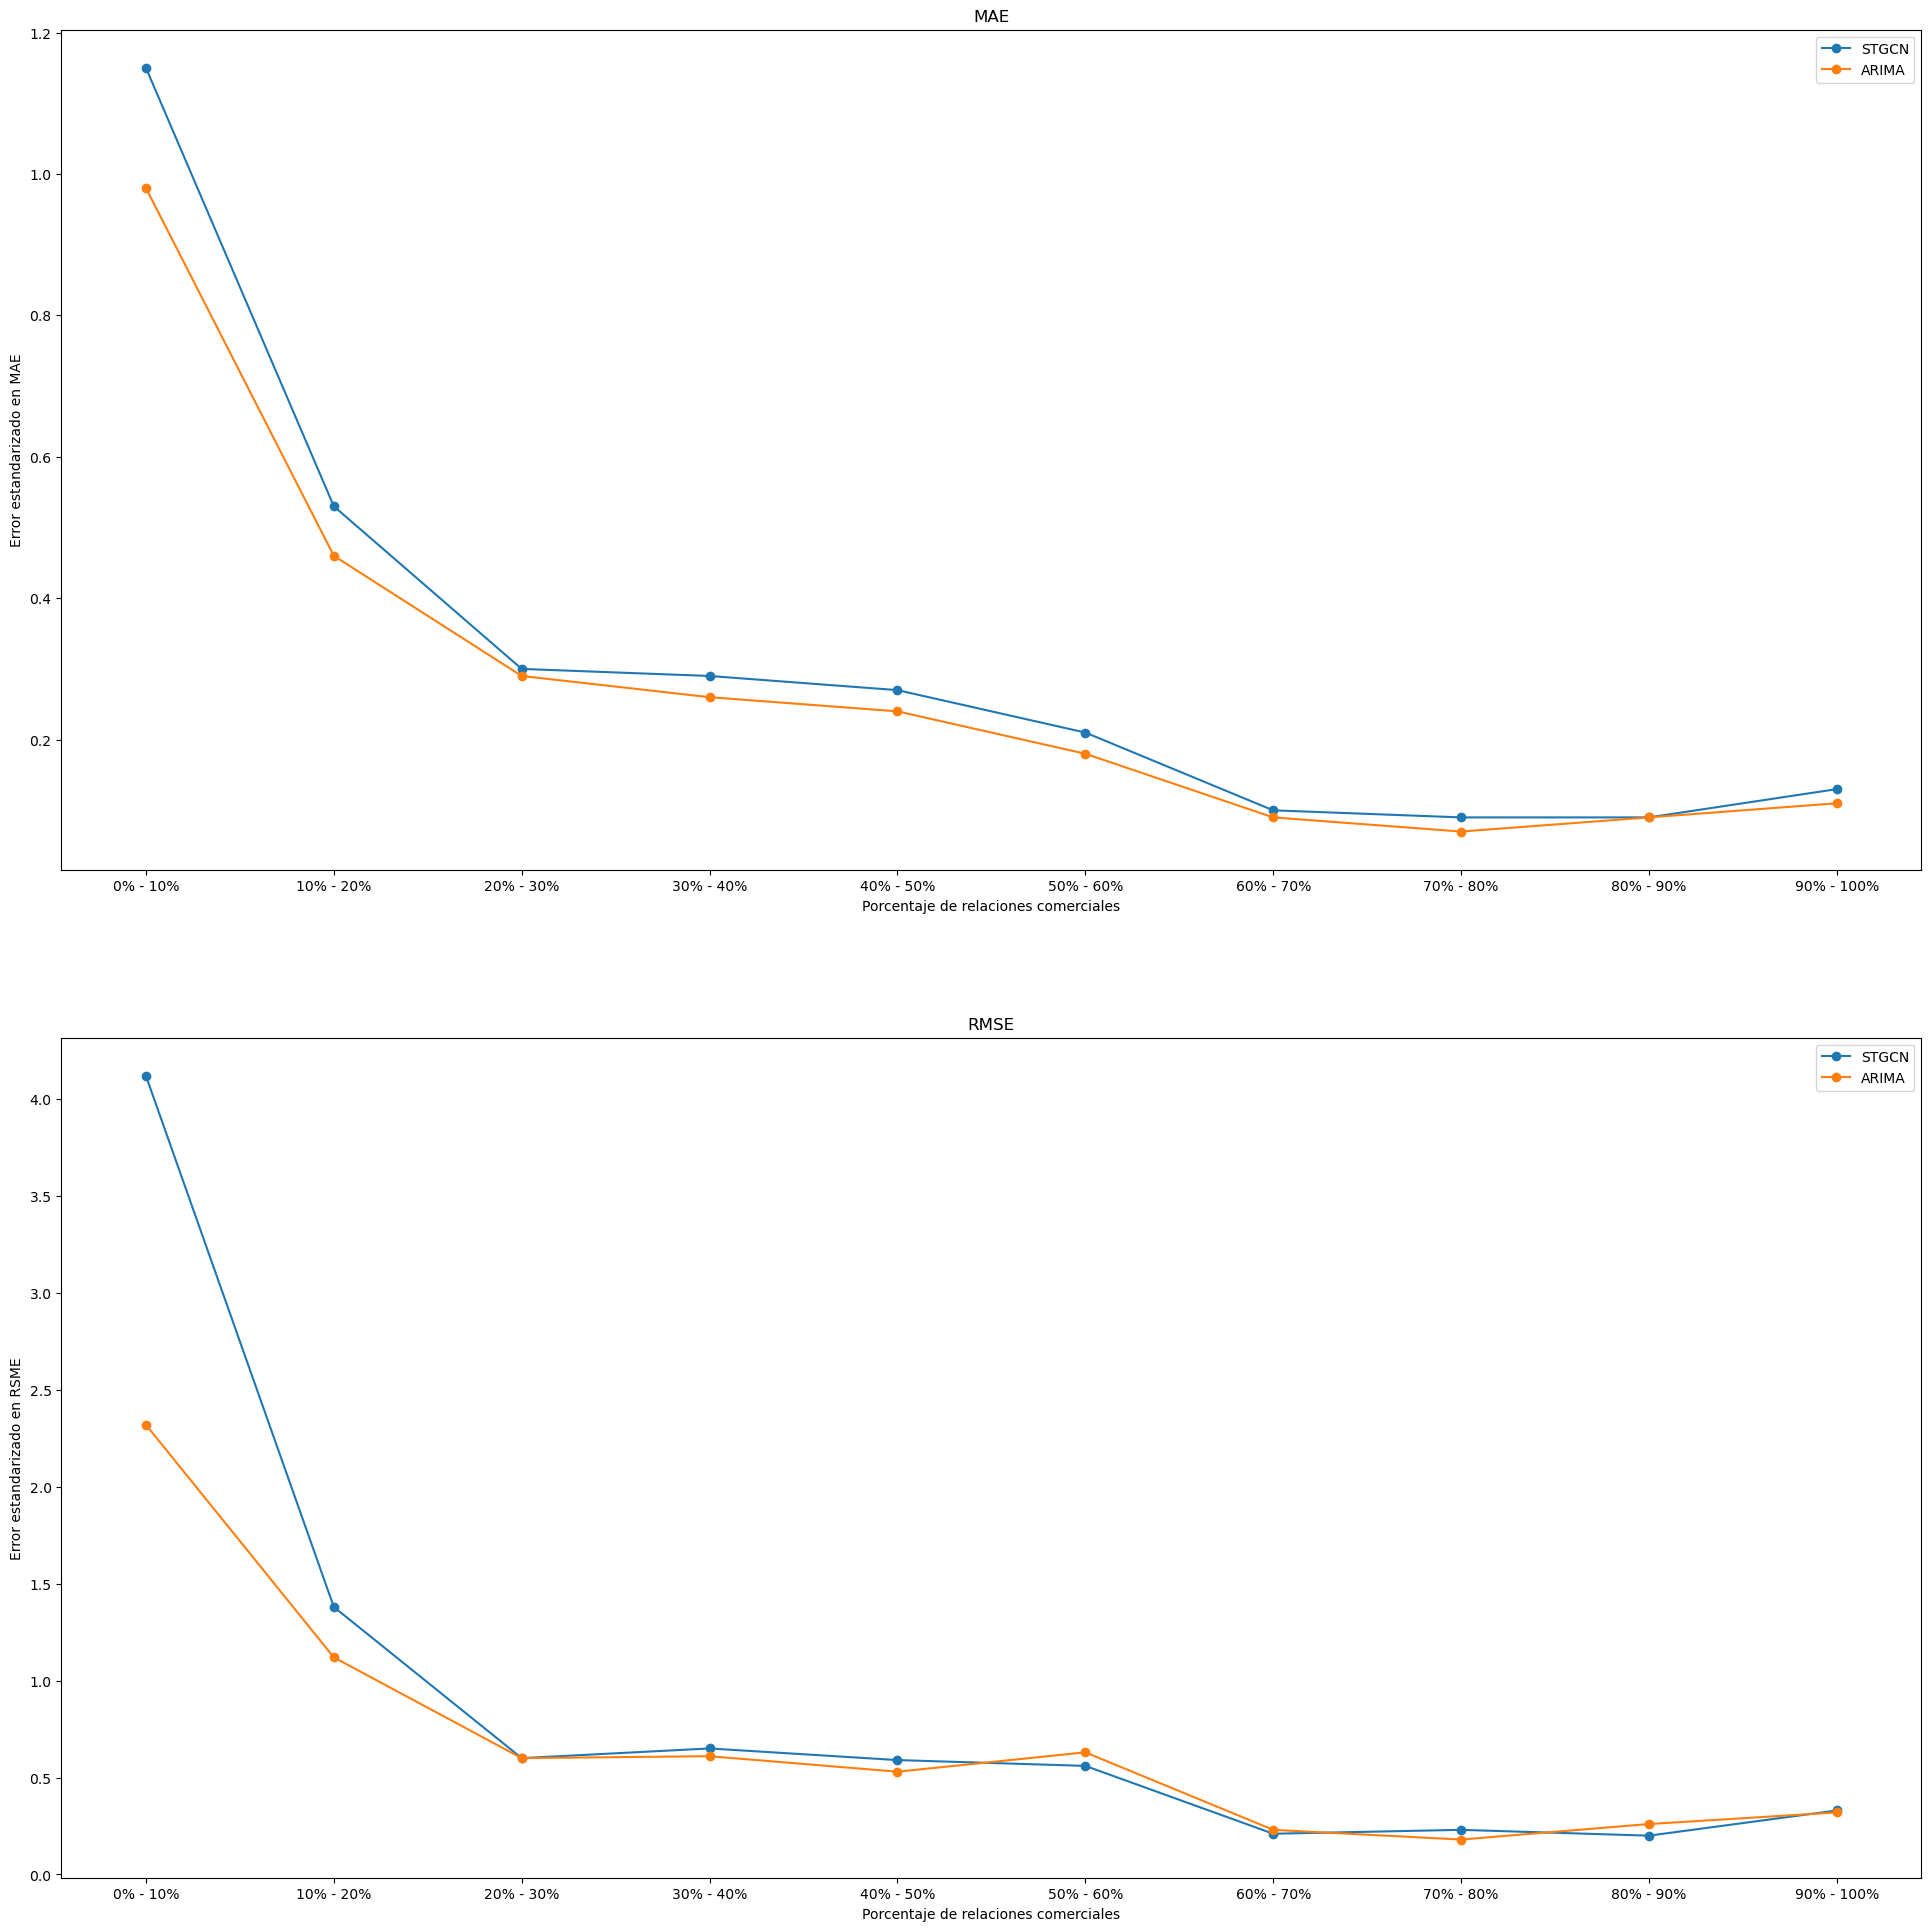

In [244]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(24, 24)) # Width: 8 inches, Height: 6 inches

axs[0].plot(indexX, [float(col[0]) for col in MAE_Y], 'o-', label='STGCN')
axs[0].plot(indexX, [float(col[1]) for col in MAE_Y], 'o-', label='ARIMA')
axs[0].set_title('MAE')
axs[0].set_xlabel("Porcentaje de relaciones comerciales")
axs[0].set_ylabel("Error estandarizado en MAE")
axs[0].legend()


axs[1].plot(indexX, [float(col[0]) for col in RMSE_Y], 'o-', label='STGCN')
axs[1].plot(indexX, [float(col[1]) for col in RMSE_Y], 'o-', label='ARIMA')
axs[1].set_title('RMSE')
axs[1].set_xlabel("Porcentaje de relaciones comerciales")
axs[1].set_ylabel("Error estandarizado en RSME")
axs[1].legend()

# Display the subplots
plt.show()

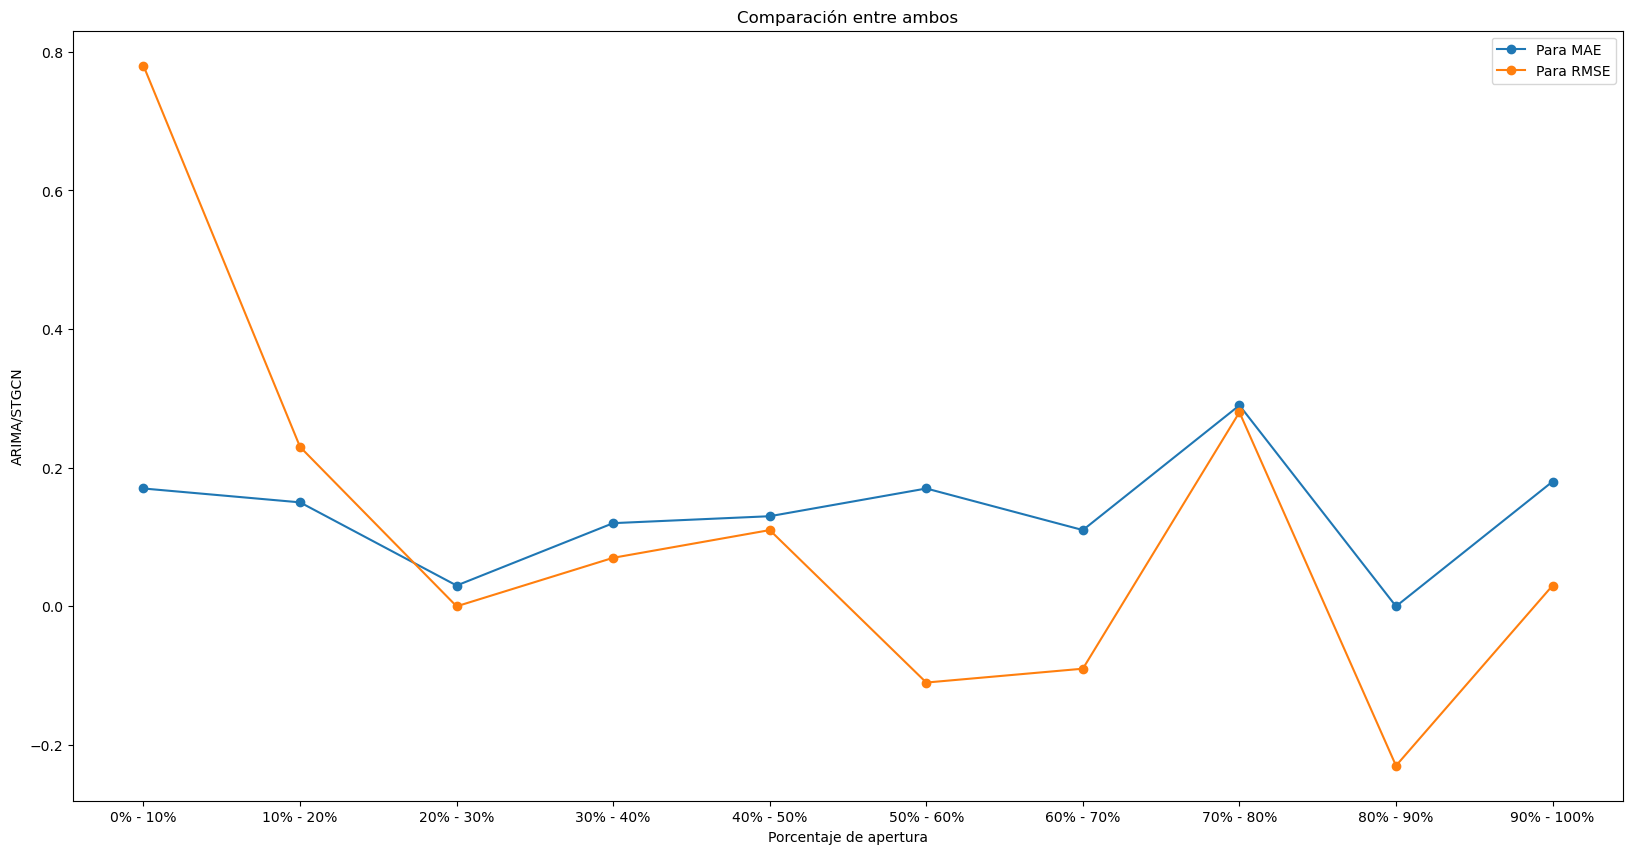

In [245]:
plt.figure(figsize=(20,10))

plt.plot(indexX, MAE_ARIMA_STGCN_Y, 'o-', label='Para MAE')
plt.plot(indexX, RMSE_ARIMA_STGCN_Y, 'o-', label='Para RMSE')
plt.title('Comparación entre ambos')
plt.xlabel("Porcentaje de apertura")
plt.ylabel("ARIMA/STGCN")
plt.legend()
plt.show()

In [207]:
# "Purificadora de Bases"
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)

graduación = pd.read_csv('./dataset/Pesos_TODO_REDUCIDO.csv', header=0)
graduación = pd.DataFrame(graduación.values, index=graduación.columns, columns=graduación.columns)

bad_relations = []
neutral_realations = []
good_relations = []

small_neighborhood = []
medium_neighborhood = []
big_neighborhood = []

aux = []
for column_number, column in enumerate(data.columns):
    dataC = data[column]
    graduaciónC = graduación[column]
    
    # Si coges los de 0, las predicciones son poco predecibles.
    # Si coges los de 1, las predicciones son muy predecibles.
    vecindario = graduaciónC[graduaciónC == 1].index.tolist()
    numero_de_conexiones = len(vecindario)
    aux.append(numero_de_conexiones)
    
    #print("Conectados con", column, " N.:", numero_de_conexiones)
    #comparacion = analisis([data.columns.get_loc(col) for col in vecindario], True)
    
    #if comparacion > 2:
    #    bad_relations.append([column, numero_de_conexiones, round(comparacion, 2), vecindario])   
    #elif comparacion < 1:
    #    good_relations.append([column, numero_de_conexiones, round(comparacion, 2)])
    #else:
    #    neutral_realations.append([column, numero_de_conexiones, round(comparacion, 2)])
        
    if 0.01*1051 > numero_de_conexiones >= 0*1051:
        small_neighborhood.append(column)
    elif 0.9*1051 > numero_de_conexiones > 0.01*1051:
        medium_neighborhood.append(column)
    elif 1*1051 >= numero_de_conexiones > 0.9*1051:
        big_neighborhood.append(column)

#black_list = list(set(item for sublist in small_neighborhood for item in sublist))

In [230]:
analisis([data.columns.get_loc(col) for col in small_neighborhood])

# Son más dificiles de predecir que la media de base, y además como tienen pocas conexiones
#  la  brecha entre STGCN y ARIMA se ensancha.



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    13.61   |     7.24       |   5.14    |
------------------------------------------------------------
|     RMSE        |    33.68   |     17.98       |   8.59    |
------------------------------------------------------------


C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [231]:
len(small_neighborhood)

152

Cuando tiene pocas conxiones, realiza muchos más errores y se vuelve comparativamente inferior a ARIMA.

In [232]:
analisis([data.columns.get_loc(col) for col in medium_neighborhood])

# Son  basicamente la media.



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    3.26   |     1.28       |   1.10    |
------------------------------------------------------------
|     RMSE        |    13.03   |     6.72       |   3.59    |
------------------------------------------------------------


In [233]:
len(medium_neighborhood)

1969

In [234]:
analisis([data.columns.get_loc(col) for col in big_neighborhood])



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    1.98   |     0.38       |   0.33    |
------------------------------------------------------------
|     RMSE        |    2.13   |     0.97       |   0.91    |
------------------------------------------------------------


In [235]:
len(big_neighborhood)

329

Cuando tiene muchas conxiones, realiza pocos errores y se vuelve competitivo con ARIMA.

Cuantas más conexiones, mejor va la cosa, o eso parece ser!!!

Lo que significa que funciona como era esperado, ahora a verlo por paises!!

In [218]:
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)

graduación2 = pd.read_csv('./dataset/Pesos_TODO_REDUCIDO.csv', header=0)
graduación2 = pd.DataFrame(graduación.values, index=graduación.columns, columns=graduación.columns)

graduación1 = pd.read_csv('./dataset/Matriz_primer_grado_Porcetual.csv', header=0)

paises = []
indexX = []

MAE_Y, RMSE_Y, MAE_ARIMA_STGCN_Y, RMSE_ARIMA_STGCN_Y = [], [], [], []


paises_buenos = []

lista_negra = ["USA", "CHN", "CAN", "MEX", "DEU", "NLD"]
for aux in data.columns:
    pais_origen, pais_destino = aux.split("-")
    if pais_origen not in lista_negra and pais_destino not in lista_negra:
        paises_buenos.append(aux)
        
#for aux in data.columns:
for aux in paises_buenos:
    pais_origen, pais_destino = aux.split("-")
    paises.append(pais_origen)
    paises.append(pais_destino)
    
paises = list(set(item for item in paises))

for pais in paises:
    target_columns = [col for col in data.columns if pais in col]
    
    ############################### Para la apertura comercial
    nivel_apertura = 0
    for column in graduación1[target_columns]:
        graduaciónC = graduación1[column]
        nivel_apertura += round(graduaciónC.values[0], 0)
    
    nivel_apertura = round(nivel_apertura/len(target_columns), 0)
    
    ############################### Para las conexiones
    numero_de_conexiones = 0
    for column in graduación2[target_columns]:
        graduaciónC = graduación2[column]
        numero_de_conexiones += len(graduaciónC[graduaciónC == 1].index.tolist())
    
    
    MAE, RMSE, MAE_ARIMA_STGCN, RMSE_ARIMA_STGCN = sacar_stats([data.columns.get_loc(col) for col in target_columns])
    
    MAE_Y.append(MAE)
    RMSE_Y.append(RMSE)
    MAE_ARIMA_STGCN_Y.append(float(MAE_ARIMA_STGCN))
    RMSE_ARIMA_STGCN_Y.append(float(RMSE_ARIMA_STGCN))
    
    #indexX.append(f"{pais}\n{nivel_apertura}\n{numero_de_conexiones}\n{(numero_de_conexiones/nivel_apertura):.0f}")
    indexX.append(f"{pais}")

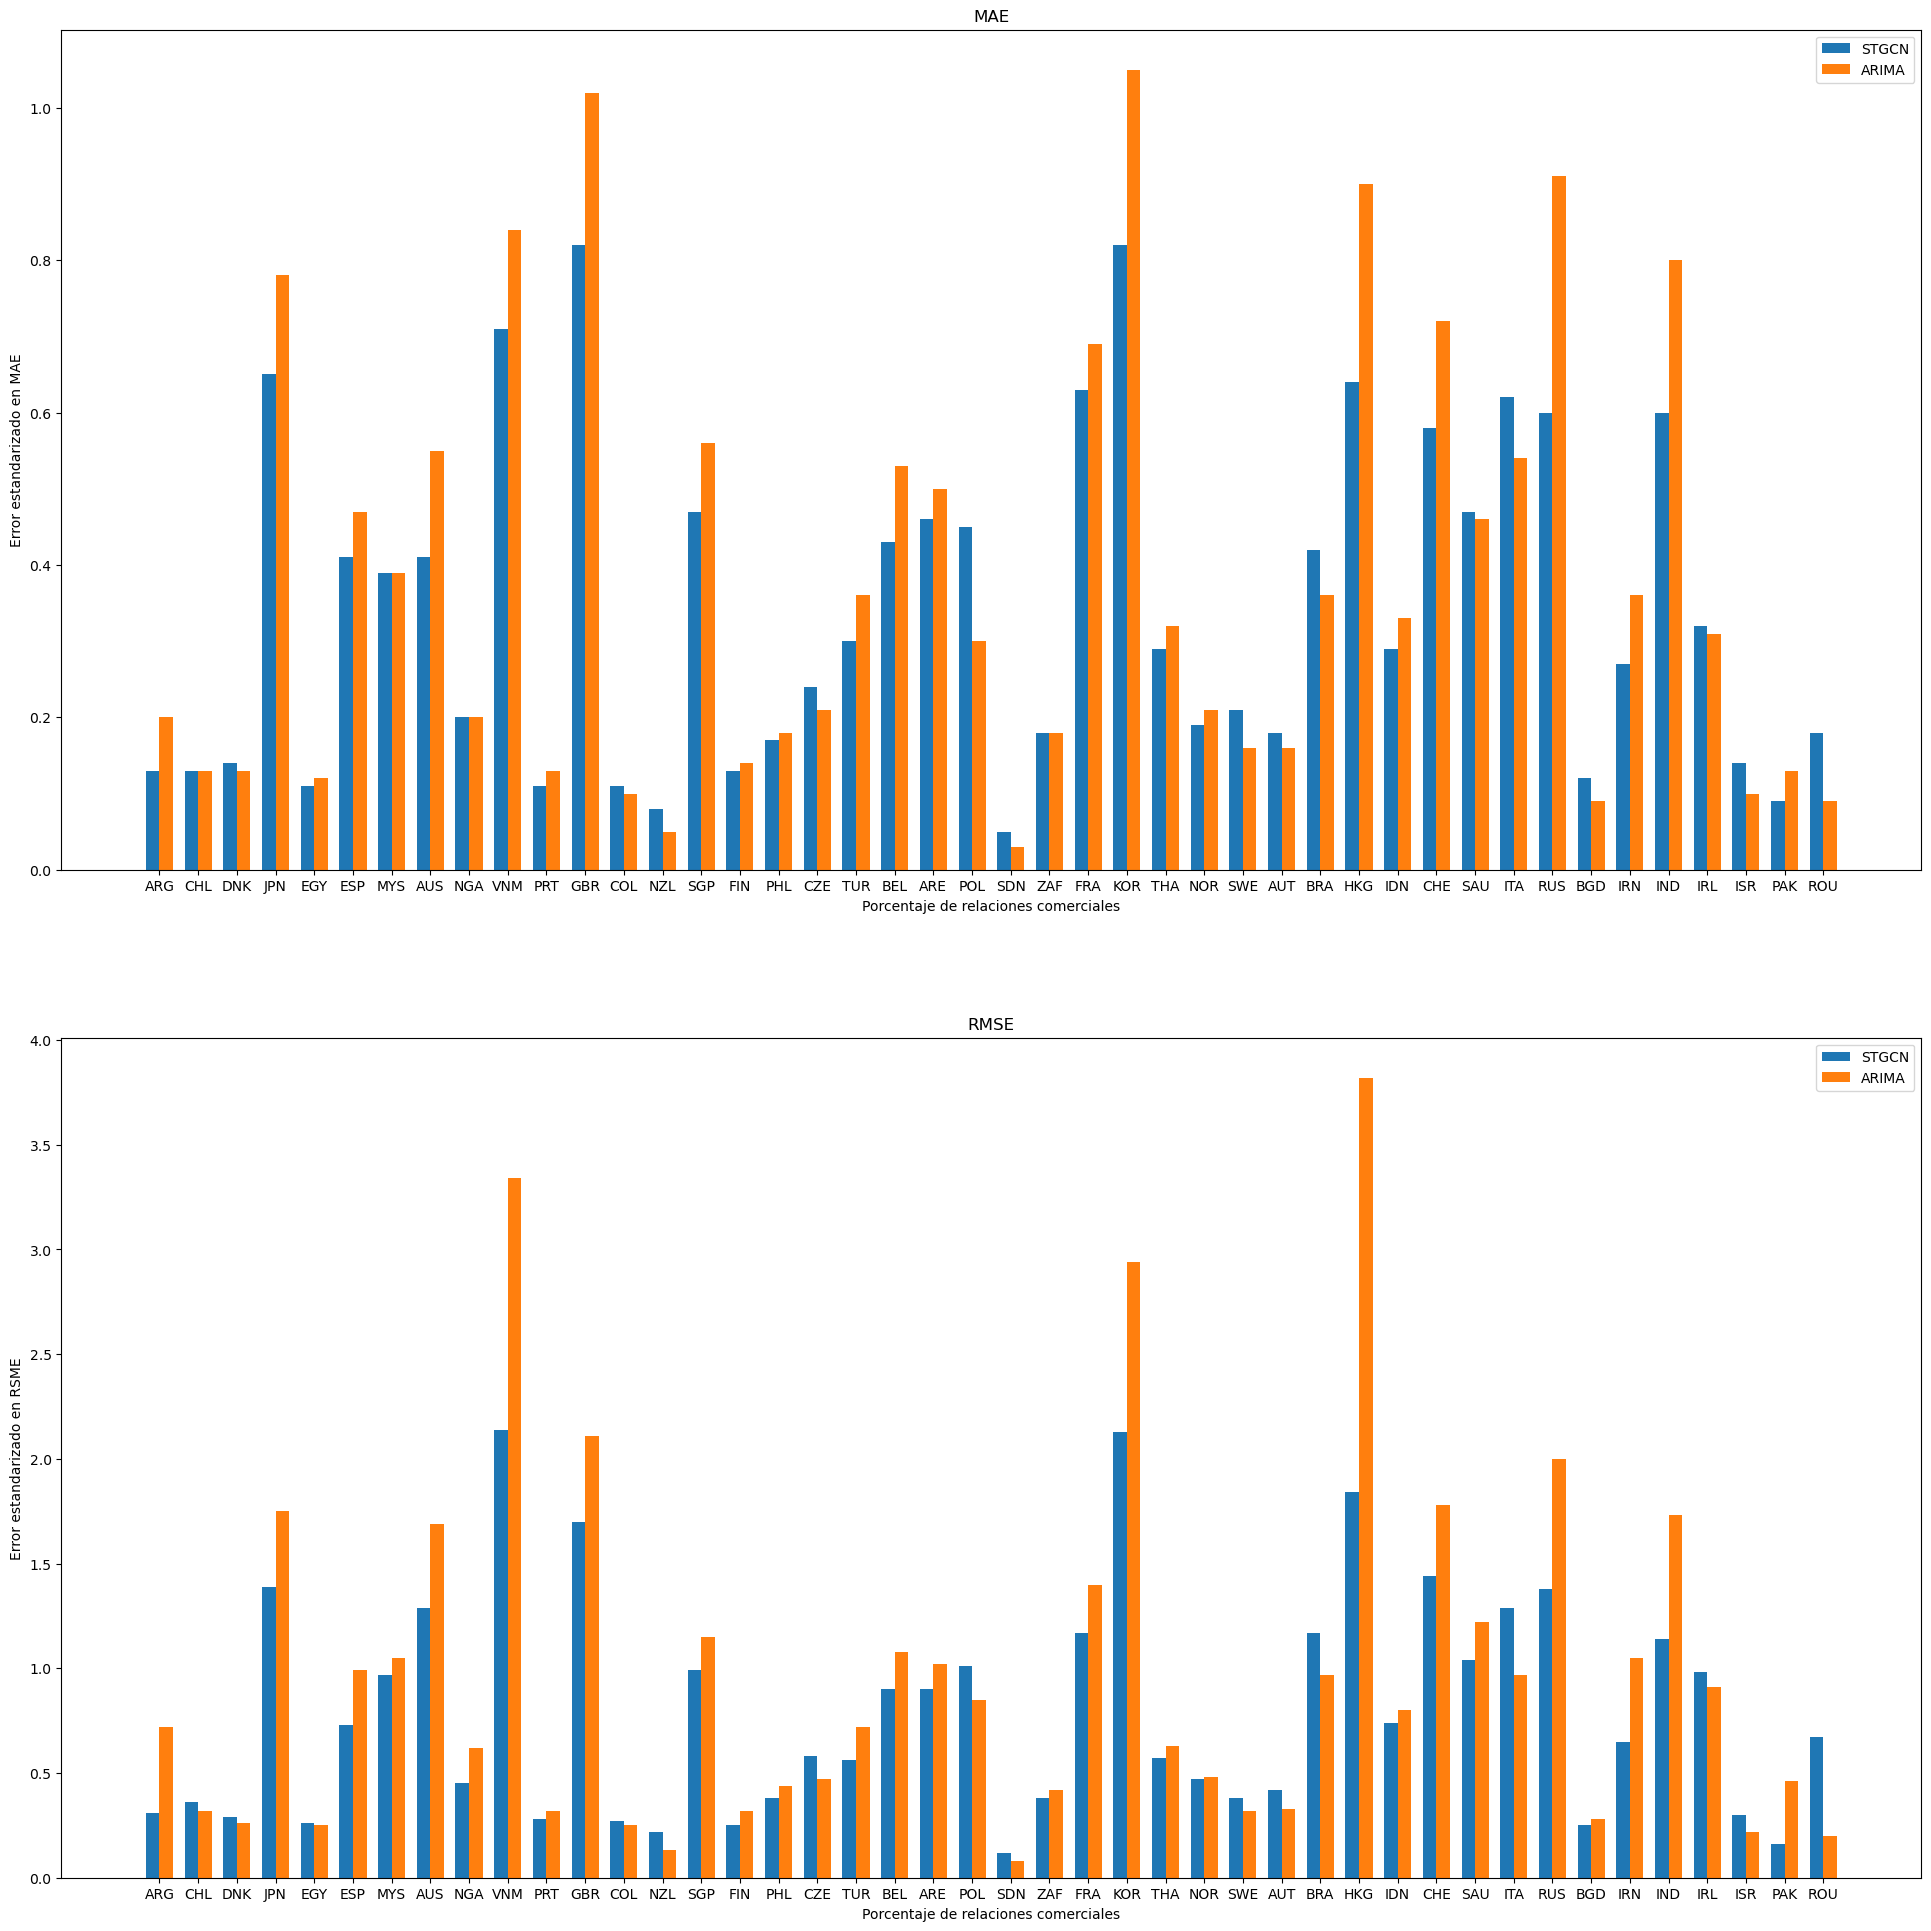

In [219]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(24, 24)) # Width: 8 inches, Height: 6 inches

# Set the width of each bar
bar_width = 0.35

# Set the x-axis positions for each dataset
x_pos1 = np.arange(len(indexX))
x_pos2 = x_pos1 + bar_width

axs[0].bar(x_pos1, [float(col[0]) for col in MAE_Y], width=bar_width, label='STGCN')
axs[0].bar(x_pos2, [float(col[1]) for col in MAE_Y], width=bar_width, label='ARIMA')
axs[0].set_title('MAE')
axs[0].set_xlabel("Porcentaje de relaciones comerciales")
axs[0].set_ylabel("Error estandarizado en MAE")
axs[0].set_xticks(x_pos1 + bar_width/2)
axs[0].set_xticklabels(indexX)
axs[0].legend()


axs[1].bar(x_pos1, [float(col[0]) for col in RMSE_Y], width=bar_width, label='STGCN')
axs[1].bar(x_pos2, [float(col[1]) for col in RMSE_Y], width=bar_width, label='ARIMA')
axs[1].set_title('RMSE')
axs[1].set_xlabel("Porcentaje de relaciones comerciales")
axs[1].set_ylabel("Error estandarizado en RSME")
axs[1].set_xticks(x_pos1 + bar_width/2)
axs[1].set_xticklabels(indexX)
axs[1].legend()

# Display the subplots
plt.show()

Paises en los que STGCN hace sustancialmente mejor:
    HKG (Hong Kong), KOR (Korea del Sur).
    Economias muy relevantes en el comercio internacional!
    Incluso, en el caso de paises menos dependientes del comercio internacional como JPN, IND, GBR, IRN, SGP, también se cumple esta regla, pero en menor  grado.
    Sin embargo otros paises muy dependientes del comercio internacional como: RUS, SAU, AUT, BRA.
    
Paises en los que ARIMA hace sustancialmente mejor:
    CHN (China), MEX (Mejico), CAN (Canada), USA (Estados Unidos).
    Paises extremadamente grandes.
    Miembros de NAFTA.
    Probablemente culpa de Trump.
    
    

En lo que se refiere a la apertura:
    Tenemos un problema con aperturas bajas, el sistema predice mucho peor que ARIMA en caso de aperturas bajas.
    Y otro problema con casos de aperturas altas, el sistema predice mucho peor que ARIMA.
    En el resto de casos STGCN el sistema es similar a ARIMA.
    
En lo que se refiere al  número de conexiones:
    Cuanto menos conexiones peor en comparación con ARIMA.
    Luego, cuando aumenta el número de conexines existe cierta tendencia a mejorar el sistema en general y en comparación con ARIMA.

Norteamérica, es un continente problematico.

In [155]:
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
paises_buenos = []

lista_negra = ["MEX", "USA", "CAN"]
for aux in data.columns:
    pais_origen, pais_destino = aux.split("-")
    if pais_origen not in lista_negra and pais_destino not in lista_negra:
        paises_buenos.append(aux)

analisis([data.columns.get_loc(col) for col in paises_buenos])
analisis_ultimo([data.columns.get_loc(col) for col in paises_buenos])



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    3.03   |     1.17       |   1.33    |
------------------------------------------------------------
|     RMSE        |    7.65   |     3.25       |   4.54    |
------------------------------------------------------------


------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   STCGN_Inter_5  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    1.06   |     0.43 |   0.52       |   0.52    |
------------------------------------------------------------
|     RMSE        |    2.47   |     1.17 |   1.51      |   1.74    |
------------------------------------------------------------


C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [60]:
ruta_matriz_pesos = './dataset/Datos_TODO_reducido_interpolado_2_limpio.csv'
data[paises_buenos].to_csv(ruta_matriz_pesos, index=False)  # index=False para no guardar el índice del DataFrame


ruta_matriz_pesos = './dataset/Pesos_TODO_REDUCIDO_limpio.csv'
graduación.loc[graduación.index.isin(paises_buenos), graduación.columns.isin(paises_buenos)].to_csv(ruta_matriz_pesos, index=False)

In [66]:
len(paises_buenos)

2162

In [24]:
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
paises_malos = []

lista_blanca = ["MEX", "USA", "CAN"]
for aux in data.columns:
    pais_origen, pais_destino = aux.split("-")
    if pais_origen in lista_blanca or pais_destino in lista_blanca:
        paises_malos.append(aux)

analisis([data.columns.get_loc(col) for col in paises_malos])
analisis_ultimo([data.columns.get_loc(col) for col in paises_malos])



------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    8.98   |     4.24       |   2.31    |
------------------------------------------------------------
|     RMSE        |    36.46   |     20.14       |   6.24    |
------------------------------------------------------------


------------------------------------------------------------
|     Errores     |    STCGN  |   STCGN_Inter  |   ARIMA   |
------------------------------------------------------------
|      MAE        |    2.84   |     1.22       |   0.96    |
------------------------------------------------------------
|     RMSE        |    11.50   |     6.53       |   2.54    |
------------------------------------------------------------


C:\Users\jccvm\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [62]:
ruta_matriz_pesos = './dataset/Datos_TODO_reducido_interpolado_2_sucio.csv'
data[paises_malos].to_csv(ruta_matriz_pesos, index=False)  # index=False para no guardar el índice del DataFrame


ruta_matriz_pesos = './dataset/Pesos_TODO_REDUCIDO_sucio.csv'
graduación.loc[graduación.index.isin(paises_malos), graduación.columns.isin(paises_malos)].to_csv(ruta_matriz_pesos, index=False)

Con todo:
    En RMSE, ARIMA tiene  2.01 veces menos error que STGCN.
    En MAE, ARIMA tiene  1.23 veces menos error que STGCN.


Sin USA:
    En RMSE, STGCN tiene  1.02 veces menos error que ARIMA.
    En MAE, ARIMA tiene  1.07 veces menos error que STGCN.
    
Sin CHN:
    En RMSE, ARIMA tiene  1.68 veces menos error que STGCN.
    En MAE, ARIMA tiene  1.16 veces menos error que STGCN.
    
Sin USA y CHN:
    En RMSE, STGCN tiene  1.09 veces menos error que ARIMA.
    En MAE, ARIMA tiene  1.03 veces menos error que STGCN.
    
!!!Lo que pasó fueron las tarifas comerciales de Trump!!!


#### ACLARACIÓN

Lo que realmente pasa, no es que STGCN predice peor para norteamérica, sino que ARIMA predice mucho mejor para norteamérica en comparación con STGCN!!

Si esto es cierto, el resultado con la base de datos sucia deberia de ser el mismo!!


#### Otra cosa que  probar

Lista de paises sucios, como paises 


# Conteo de  predicciones a  un año

Consiste en ver cuando, ir columna a columna y contar cuando STGCN mejora a ARIMA y cuando ocurre lo opuesto a un año.

In [13]:
puntos_Arima = 0
puntos_STGCN = 0

for (columna_STGCN_Inter, columna_ARIMA, columna_real) in zip(Año_26_y_Inter, Año_26_yARIMA, Año_26_x):
    error_STGCN_Inter = abs(columna_real - columna_STGCN_Inter)
    error_ARIMA = abs(columna_real - columna_ARIMA)
    
    if error_STGCN_Inter > error_ARIMA:
        puntos_Arima += 1
        #print("Punto ARIMA")
        #print(columna_real, columna_STGCN_Inter, error_STGCN_Inter)
        #print(columna_real, columna_ARIMA, error_ARIMA)
    else:
        puntos_STGCN += 1
        #print("Punto STGCN")
        #print(columna_real, columna_STGCN_Inter, error_STGCN_Inter)
        #print(columna_real, columna_ARIMA, error_ARIMA)
        
print("puntos_Arima: ", puntos_Arima)
print("puntos_STGCN: ", puntos_STGCN)

puntos_Arima:  1409
puntos_STGCN:  1041


In [ ]:
Primer año:
puntos_Arima:  1597
puntos_STGCN:  853

Segundo año:
puntos_Arima:  1513
puntos_STGCN:  937

Tercer año:
puntos_Arima:  1409
puntos_STGCN:  1041

In [25]:
lista = {}

for column_number, column_name in enumerate(data.columns):
    valor = 0
    
    error_STGCN_Inter_24 = abs(Año_24_x[column_number] - Año_24_y_Inter[column_number]) # 1
    error_ARIMA_24 = abs(Año_24_x[column_number] - Año_24_yARIMA[column_number]) # -1
    # X 0 0
    
    error_STGCN_Inter_25 = abs(Año_25_x[column_number] - Año_25_y_Inter[column_number]) # 1
    error_ARIMA_25 = abs(Año_25_x[column_number] - Año_25_yARIMA[column_number]) # -1
    # 0 X 0
    
    error_STGCN_Inter_26 = abs(Año_26_x[column_number] - Año_26_y_Inter[column_number]) # 1
    error_ARIMA_26 = abs(Año_26_x[column_number] - Año_26_yARIMA[column_number]) # -1
    # 0 0 X

    if error_STGCN_Inter_24 > error_ARIMA_24:
        valor += 1 # ARIMA ha tenido  menor  error!
    if error_STGCN_Inter_25 > error_ARIMA_25:
        valor += 2
    if error_STGCN_Inter_26 > error_ARIMA_26:
        valor += 4
    
    lista[column_name] = valor

In [32]:
from collections import Counter

Counter(lista.values())

Counter({0: 391, 3: 311, 7: 920, 5: 122, 4: 180, 2: 95, 1: 244, 6: 187})

In [36]:
keys_with_zero_value = [key for key, value in lista.items() if value == 0]

lista2 = []

for combinación in keys_with_zero_value:
    pais_origen, pais_destino = combinación.split("-")
    lista2.append(pais_origen)
    lista2.append(pais_destino)

In [40]:
keys_with_zero_value

['ARG-ARE',
 'BEL-ARE',
 'CHE-ARE',
 'CHL-ARE',
 'COL-ARE',
 'CZE-ARE',
 'DNK-ARE',
 'ESP-ARE',
 'IRL-ARE',
 'ITA-ARE',
 'PAK-ARE',
 'PHL-ARE',
 'TUR-ARE',
 'USA-ARE',
 'ARE-ARG',
 'BEL-ARG',
 'BRA-ARG',
 'CAN-ARG',
 'CHL-ARG',
 'ISR-ARG',
 'ITA-ARG',
 'NGA-ARG',
 'PHL-ARG',
 'POL-ARG',
 'SAU-ARG',
 'CHL-AUS',
 'DNK-AUS',
 'FIN-AUS',
 'FRA-AUS',
 'GBR-AUS',
 'SGP-AUS',
 'VNM-AUS',
 'ARE-AUT',
 'CHE-AUT',
 'GBR-AUT',
 'HKG-AUT',
 'SGP-AUT',
 'THA-AUT',
 'VNM-AUT',
 'ARE-BEL',
 'AUT-BEL',
 'CHE-BEL',
 'IDN-BEL',
 'IRL-BEL',
 'JPN-BEL',
 'PAK-BEL',
 'RUS-BEL',
 'VNM-BEL',
 'AUS-BGD',
 'AUT-BGD',
 'BEL-BGD',
 'CHE-BGD',
 'EGY-BGD',
 'KOR-BGD',
 'NLD-BGD',
 'ARE-BRA',
 'AUS-BRA',
 'CHE-BRA',
 'CHN-BRA',
 'EGY-BRA',
 'IRN-BRA',
 'ISR-BRA',
 'AUS-CAN',
 'CHL-CAN',
 'EGY-CAN',
 'GBR-CAN',
 'MYS-CAN',
 'CHL-CHE',
 'CHN-CHE',
 'CZE-CHE',
 'ESP-CHE',
 'IDN-CHE',
 'ISR-CHE',
 'JPN-CHE',
 'KOR-CHE',
 'MYS-CHE',
 'NLD-CHE',
 'SWE-CHE',
 'VNM-CHE',
 'ARG-CHL',
 'NOR-CHL',
 'NZL-CHL',
 'CHL-CHN',
 'IR

In [46]:
[ x[0] for x in Counter(lista2).most_common()][:10]

['CHE', 'MYS', 'TUR', 'ARE', 'RUS', 'IND', 'BEL', 'IRL', 'SGP', 'NLD']

In [47]:
Counter(lista2).most_common()

[('CHE', 27),
 ('MYS', 27),
 ('TUR', 24),
 ('ARE', 23),
 ('RUS', 23),
 ('IND', 22),
 ('BEL', 20),
 ('IRL', 20),
 ('SGP', 20),
 ('NLD', 20),
 ('NGA', 19),
 ('ARG', 18),
 ('CZE', 18),
 ('USA', 18),
 ('HKG', 18),
 ('IDN', 18),
 ('NOR', 18),
 ('DNK', 17),
 ('FRA', 17),
 ('GBR', 17),
 ('VNM', 17),
 ('JPN', 17),
 ('EGY', 17),
 ('KOR', 17),
 ('IRN', 17),
 ('AUS', 16),
 ('ZAF', 16),
 ('ITA', 15),
 ('PAK', 15),
 ('PHL', 15),
 ('ESP', 14),
 ('AUT', 14),
 ('MEX', 14),
 ('CHL', 13),
 ('CAN', 13),
 ('CHN', 13),
 ('PRT', 13),
 ('FIN', 12),
 ('BRA', 11),
 ('POL', 11),
 ('SAU', 11),
 ('SWE', 11),
 ('THA', 10),
 ('BGD', 10),
 ('DEU', 10),
 ('COL', 9),
 ('ISR', 9),
 ('ROU', 9),
 ('NZL', 5),
 ('SDN', 4)]

# Bases de  datos pais a pais

In [171]:
# Lista de paises a examinar
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
paises_buenos, paises_malos = [], []



lista_negra = ["USA", "CHN"]
for aux in data.columns:
    pais_origen, pais_destino = aux.split("-")
    if pais_origen not in lista_negra and pais_destino not in lista_negra:
        paises_buenos.append(aux)

lista_blanca = ["USA", "CHN"]
for aux in data.columns:
    pais_origen, pais_destino = aux.split("-")
    if pais_origen in lista_blanca or pais_destino in lista_blanca:
        paises_malos.append(aux)

# Lista negra:
paises = [data.columns.get_loc(col) for col in paises_buenos]
print(Año_22_x[paises].mean())
# Lista blanca:
#paises = [data.columns.get_loc(col) for col in paises_malos]
#print(Año_22_x[paises].mean())

print(len(paises))

2889255772.43617
2256


In [172]:
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
pesos = pd.read_csv('./dataset/Pesos_TODO_REDUCIDO.csv', header=0)

In [173]:
pesos.iloc[paises, paises].to_csv('./dataset/Pesos_TODO_REDUCIDO_!USA_CHN.csv', index=False)
data.iloc[:, paises].to_csv('./dataset/Datos_TODO_reducido_interpolado_2_!USA_CHN.csv', index=False)

In [90]:
import pandas as pd

#### Tratamiento por peso:

# Lista de paises a examinar
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
paises_buenos = []
umbral = 1e8

for column in data.columns:
    if data[column].mean() > umbral:
        paises_buenos.append(column)
        
paises = [data.columns.get_loc(col) for col in paises_buenos]
data = pd.read_csv('./dataset/Datos_TODO_reducido_interpolado_2.csv', header=0)
pesos = pd.read_csv('./dataset/Pesos_TODO_REDUCIDO.csv', header=0)
pesos.iloc[paises, paises].to_csv('./dataset/Pesos_TODO_REDUCIDO_Sin_0.csv', index=False)
data.iloc[:, paises].to_csv('./dataset/Datos_TODO_reducido_interpolado_2_Sin_0.csv', index=False)

# Print the updated DataFrame
data.iloc[:, paises]

ARG-ARE       AUS-ARE      AUT-ARE       BEL-ARE       BGD-ARE  \
0   1.631558e+07  1.743842e+08   95413366.0  2.841407e+08  1.672554e+07   
1   2.337933e+07  2.027164e+08   98999804.0  2.735117e+08  1.604355e+07   
2   3.044307e+07  2.310486e+08  102586242.0  2.628827e+08  1.536155e+07   
3   3.750681e+07  2.593809e+08  106172680.0  2.522536e+08  1.467956e+07   
4   4.052451e+07  3.061556e+08  104532800.0  2.774517e+08  1.479531e+07   
..           ...           ...          ...           ...           ...   
71  3.371057e+08  2.659397e+09  600114155.0  2.935188e+09  4.316801e+08   
72  3.940329e+08  2.580638e+09  557882497.0  2.659086e+09  4.327286e+08   
73  4.046708e+08  2.333818e+09  552362223.0  2.575886e+09  4.051337e+08   
74  4.153087e+08  2.086997e+09  546841949.0  2.492685e+09  3.775387e+08   
75  4.259466e+08  1.840177e+09  541321675.0  2.409485e+09  3.499438e+08   

         BRA-ARE       CAN-ARE       CHE-ARE       CHN-ARE       CZE-ARE  ...  \
0   1.090672e+08  1.464124e+08  3.684022e+08  1.100646e+09  1.818557e+07  ...   
1   1.299405e+08  1.398262e+08  3.845116e+08  1.092723e+09  2.454881e+07  ...   
2   1.508138e+08  1.332401e+08  4.006211e+08  1.084800e+09  3.091206e+07  ...   
3   1.716872e+08  1.266539e+08  4.167305e+08  1.076877e+09  3.727530e+07  ...   
4   1.979768e+08  1.471066e+08  4.179527e+08  1.151635e+09  7.352323e+07  ...   
..           ...           ...           ...           ...           ...  ...   
71  2.159997e+09  1.153468e+09  4.026683e+09  3.222129e+10  7.033390e+08  ...   
72  2.229946e+09  1.152568e+09  3.592891e+09  3.333774e+10  6.861802e+08  ...   
73  2.152678e+09  1.210669e+09  3.394841e+09  3.294188e+10  6.681189e+08  ...   
74  2.075409e+09  1.268770e+09  3.196792e+09  3.254602e+10  6.500575e+08  ...   
75  1.998141e+09  1.326871e+09  2.998743e+09  3.215017e+10  6.319962e+08  ...   

         PRT-ZAF       ROU-ZAF       RUS-ZAF       SAU-ZAF       SGP-ZAF  \
0   6.277342e+07  4.342111e+07  2.935940e+07  1.712682e+08  3.542732e+08   
1   6.811056e+07  3.118541e+07  2.827193e+07  1.730872e+08  3.528384e+08   
2   7.344769e+07  1.894972e+07  2.718445e+07  1.749062e+08  3.514036e+08   
3   7.878482e+07  6.714021e+06  2.609698e+07  1.767252e+08  3.499688e+08   
4   7.616279e+07  6.348566e+06  2.991053e+07  1.234693e+08  3.255078e+08   
..           ...           ...           ...           ...           ...   
71  2.151133e+08  3.233110e+08  3.776865e+08  3.257766e+09  5.491045e+08   
72  2.151973e+08  3.411516e+08  3.860904e+08  2.814865e+09  5.329200e+08   
73  2.006094e+08  2.985532e+08  3.864496e+08  2.569772e+09  4.558110e+08   
74  1.860215e+08  2.559547e+08  3.868088e+08  2.324678e+09  3.787020e+08   
75  1.714336e+08  2.133562e+08  3.871680e+08  2.079585e+09  3.015931e+08   

         SWE-ZAF       THA-ZAF       TUR-ZAF       USA-ZAF       VNM-ZAF  
0   3.943414e+08  2.016164e+08  6.407607e+07  2.812651e+09  1.231912e+07  
1   4.186569e+08  1.956600e+08  6.357752e+07  2.927230e+09  1.051206e+07  
2   4.429724e+08  1.897036e+08  6.307898e+07  3.041810e+09  8.705000e+06  
3   4.672880e+08  1.837473e+08  6.258043e+07  3.156389e+09  6.897941e+06  
4   4.571840e+08  2.050112e+08  6.481164e+07  3.127269e+09  8.992098e+06  
..           ...           ...           ...           ...           ...  
71  7.922589e+08  2.581216e+09  5.633184e+08  5.363921e+09  7.542408e+08  
72  8.031384e+08  2.449714e+09  5.682604e+08  5.286287e+09  7.708434e+08  
73  7.520220e+08  2.341400e+09  5.700977e+08  5.008608e+09  7.480401e+08  
74  7.009055e+08  2.233087e+09  5.719351e+08  4.730930e+09  7.252368e+08  
75  6.497891e+08  2.124773e+09  5.737725e+08  4.453252e+09  7.024335e+08  

[76 rows x 1960 columns]

In [91]:
data

ARG-ARE       AUS-ARE      AUT-ARE       BEL-ARE       BGD-ARE  \
0   1.631558e+07  1.743842e+08   95413366.0  2.841407e+08  1.672554e+07   
1   2.337933e+07  2.027164e+08   98999804.0  2.735117e+08  1.604355e+07   
2   3.044307e+07  2.310486e+08  102586242.0  2.628827e+08  1.536155e+07   
3   3.750681e+07  2.593809e+08  106172680.0  2.522536e+08  1.467956e+07   
4   4.052451e+07  3.061556e+08  104532800.0  2.774517e+08  1.479531e+07   
..           ...           ...          ...           ...           ...   
71  3.371057e+08  2.659397e+09  600114155.0  2.935188e+09  4.316801e+08   
72  3.940329e+08  2.580638e+09  557882497.0  2.659086e+09  4.327286e+08   
73  4.046708e+08  2.333818e+09  552362223.0  2.575886e+09  4.051337e+08   
74  4.153087e+08  2.086997e+09  546841949.0  2.492685e+09  3.775387e+08   
75  4.259466e+08  1.840177e+09  541321675.0  2.409485e+09  3.499438e+08   

         BRA-ARE       CAN-ARE       CHE-ARE       CHL-ARE       CHN-ARE  ...  \
0   1.090672e+08  1.464124e+08  3.684022e+08  5.273232e+07  1.100646e+09  ...   
1   1.299405e+08  1.398262e+08  3.845116e+08  5.307350e+07  1.092723e+09  ...   
2   1.508138e+08  1.332401e+08  4.006211e+08  5.341468e+07  1.084800e+09  ...   
3   1.716872e+08  1.266539e+08  4.167305e+08  5.375585e+07  1.076877e+09  ...   
4   1.979768e+08  1.471066e+08  4.179527e+08  5.189298e+07  1.151635e+09  ...   
..           ...           ...           ...           ...           ...  ...   
71  2.159997e+09  1.153468e+09  4.026683e+09  1.821057e+08  3.222129e+10  ...   
72  2.229946e+09  1.152568e+09  3.592891e+09  1.983517e+08  3.333774e+10  ...   
73  2.152678e+09  1.210669e+09  3.394841e+09  2.170152e+08  3.294188e+10  ...   
74  2.075409e+09  1.268770e+09  3.196792e+09  2.356788e+08  3.254602e+10  ...   
75  1.998141e+09  1.326871e+09  2.998743e+09  2.543424e+08  3.215017e+10  ...   

         ROU-ZAF       RUS-ZAF       SAU-ZAF        SDN-ZAF       SGP-ZAF  \
0   4.342111e+07  2.935940e+07  1.712682e+08  234022.000000  3.542732e+08   
1   3.118541e+07  2.827193e+07  1.730872e+08  413217.333333  3.528384e+08   
2   1.894972e+07  2.718445e+07  1.749062e+08  592412.666667  3.514036e+08   
3   6.714021e+06  2.609698e+07  1.767252e+08  771608.000000  3.499688e+08   
4   6.348566e+06  2.991053e+07  1.234693e+08  903266.000000  3.255078e+08   
..           ...           ...           ...            ...           ...   
71  3.233110e+08  3.776865e+08  3.257766e+09  144842.000000  5.491045e+08   
72  3.411516e+08  3.860904e+08  2.814865e+09  141444.000000  5.329200e+08   
73  2.985532e+08  3.864496e+08  2.569772e+09   94296.000000  4.558110e+08   
74  2.559547e+08  3.868088e+08  2.324678e+09   47148.000000  3.787020e+08   
75  2.133562e+08  3.871680e+08  2.079585e+09       0.000000  3.015931e+08   

         SWE-ZAF       THA-ZAF       TUR-ZAF       USA-ZAF       VNM-ZAF  
0   3.943414e+08  2.016164e+08  6.407607e+07  2.812651e+09  1.231912e+07  
1   4.186569e+08  1.956600e+08  6.357752e+07  2.927230e+09  1.051206e+07  
2   4.429724e+08  1.897036e+08  6.307898e+07  3.041810e+09  8.705000e+06  
3   4.672880e+08  1.837473e+08  6.258043e+07  3.156389e+09  6.897941e+06  
4   4.571840e+08  2.050112e+08  6.481164e+07  3.127269e+09  8.992098e+06  
..           ...           ...           ...           ...           ...  
71  7.922589e+08  2.581216e+09  5.633184e+08  5.363921e+09  7.542408e+08  
72  8.031384e+08  2.449714e+09  5.682604e+08  5.286287e+09  7.708434e+08  
73  7.520220e+08  2.341400e+09  5.700977e+08  5.008608e+09  7.480401e+08  
74  7.009055e+08  2.233087e+09  5.719351e+08  4.730930e+09  7.252368e+08  
75  6.497891e+08  2.124773e+09  5.737725e+08  4.453252e+09  7.024335e+08  

[76 rows x 2450 columns]

In [94]:
data_aux = data.iloc[:, paises]
data_aux

ARG-ARE       AUS-ARE      AUT-ARE       BEL-ARE       BGD-ARE  \
0   1.631558e+07  1.743842e+08   95413366.0  2.841407e+08  1.672554e+07   
1   2.337933e+07  2.027164e+08   98999804.0  2.735117e+08  1.604355e+07   
2   3.044307e+07  2.310486e+08  102586242.0  2.628827e+08  1.536155e+07   
3   3.750681e+07  2.593809e+08  106172680.0  2.522536e+08  1.467956e+07   
4   4.052451e+07  3.061556e+08  104532800.0  2.774517e+08  1.479531e+07   
..           ...           ...          ...           ...           ...   
71  3.371057e+08  2.659397e+09  600114155.0  2.935188e+09  4.316801e+08   
72  3.940329e+08  2.580638e+09  557882497.0  2.659086e+09  4.327286e+08   
73  4.046708e+08  2.333818e+09  552362223.0  2.575886e+09  4.051337e+08   
74  4.153087e+08  2.086997e+09  546841949.0  2.492685e+09  3.775387e+08   
75  4.259466e+08  1.840177e+09  541321675.0  2.409485e+09  3.499438e+08   

         BRA-ARE       CAN-ARE       CHE-ARE       CHN-ARE       CZE-ARE  ...  \
0   1.090672e+08  1.464124e+08  3.684022e+08  1.100646e+09  1.818557e+07  ...   
1   1.299405e+08  1.398262e+08  3.845116e+08  1.092723e+09  2.454881e+07  ...   
2   1.508138e+08  1.332401e+08  4.006211e+08  1.084800e+09  3.091206e+07  ...   
3   1.716872e+08  1.266539e+08  4.167305e+08  1.076877e+09  3.727530e+07  ...   
4   1.979768e+08  1.471066e+08  4.179527e+08  1.151635e+09  7.352323e+07  ...   
..           ...           ...           ...           ...           ...  ...   
71  2.159997e+09  1.153468e+09  4.026683e+09  3.222129e+10  7.033390e+08  ...   
72  2.229946e+09  1.152568e+09  3.592891e+09  3.333774e+10  6.861802e+08  ...   
73  2.152678e+09  1.210669e+09  3.394841e+09  3.294188e+10  6.681189e+08  ...   
74  2.075409e+09  1.268770e+09  3.196792e+09  3.254602e+10  6.500575e+08  ...   
75  1.998141e+09  1.326871e+09  2.998743e+09  3.215017e+10  6.319962e+08  ...   

         PRT-ZAF       ROU-ZAF       RUS-ZAF       SAU-ZAF       SGP-ZAF  \
0   6.277342e+07  4.342111e+07  2.935940e+07  1.712682e+08  3.542732e+08   
1   6.811056e+07  3.118541e+07  2.827193e+07  1.730872e+08  3.528384e+08   
2   7.344769e+07  1.894972e+07  2.718445e+07  1.749062e+08  3.514036e+08   
3   7.878482e+07  6.714021e+06  2.609698e+07  1.767252e+08  3.499688e+08   
4   7.616279e+07  6.348566e+06  2.991053e+07  1.234693e+08  3.255078e+08   
..           ...           ...           ...           ...           ...   
71  2.151133e+08  3.233110e+08  3.776865e+08  3.257766e+09  5.491045e+08   
72  2.151973e+08  3.411516e+08  3.860904e+08  2.814865e+09  5.329200e+08   
73  2.006094e+08  2.985532e+08  3.864496e+08  2.569772e+09  4.558110e+08   
74  1.860215e+08  2.559547e+08  3.868088e+08  2.324678e+09  3.787020e+08   
75  1.714336e+08  2.133562e+08  3.871680e+08  2.079585e+09  3.015931e+08   

         SWE-ZAF       THA-ZAF       TUR-ZAF       USA-ZAF       VNM-ZAF  
0   3.943414e+08  2.016164e+08  6.407607e+07  2.812651e+09  1.231912e+07  
1   4.186569e+08  1.956600e+08  6.357752e+07  2.927230e+09  1.051206e+07  
2   4.429724e+08  1.897036e+08  6.307898e+07  3.041810e+09  8.705000e+06  
3   4.672880e+08  1.837473e+08  6.258043e+07  3.156389e+09  6.897941e+06  
4   4.571840e+08  2.050112e+08  6.481164e+07  3.127269e+09  8.992098e+06  
..           ...           ...           ...           ...           ...  
71  7.922589e+08  2.581216e+09  5.633184e+08  5.363921e+09  7.542408e+08  
72  8.031384e+08  2.449714e+09  5.682604e+08  5.286287e+09  7.708434e+08  
73  7.520220e+08  2.341400e+09  5.700977e+08  5.008608e+09  7.480401e+08  
74  7.009055e+08  2.233087e+09  5.719351e+08  4.730930e+09  7.252368e+08  
75  6.497891e+08  2.124773e+09  5.737725e+08  4.453252e+09  7.024335e+08  

[76 rows x 1960 columns]

In [89]:
data

ARG-ARE       AUS-ARE      AUT-ARE       BEL-ARE       BGD-ARE  \
0   1.631558e+07  1.743842e+08   95413366.0  2.841407e+08  1.672554e+07   
1   2.337933e+07  2.027164e+08   98999804.0  2.735117e+08  1.604355e+07   
2   3.044307e+07  2.310486e+08  102586242.0  2.628827e+08  1.536155e+07   
3   3.750681e+07  2.593809e+08  106172680.0  2.522536e+08  1.467956e+07   
4   4.052451e+07  3.061556e+08  104532800.0  2.774517e+08  1.479531e+07   
..           ...           ...          ...           ...           ...   
71  3.371057e+08  2.659397e+09  600114155.0  2.935188e+09  4.316801e+08   
72  3.940329e+08  2.580638e+09  557882497.0  2.659086e+09  4.327286e+08   
73  4.046708e+08  2.333818e+09  552362223.0  2.575886e+09  4.051337e+08   
74  4.153087e+08  2.086997e+09  546841949.0  2.492685e+09  3.775387e+08   
75  4.259466e+08  1.840177e+09  541321675.0  2.409485e+09  3.499438e+08   

         BRA-ARE       CAN-ARE       CHE-ARE       CHL-ARE       CHN-ARE  ...  \
0   1.090672e+08  1.464124e+08  3.684022e+08  5.273232e+07  1.100646e+09  ...   
1   1.299405e+08  1.398262e+08  3.845116e+08  5.307350e+07  1.092723e+09  ...   
2   1.508138e+08  1.332401e+08  4.006211e+08  5.341468e+07  1.084800e+09  ...   
3   1.716872e+08  1.266539e+08  4.167305e+08  5.375585e+07  1.076877e+09  ...   
4   1.979768e+08  1.471066e+08  4.179527e+08  5.189298e+07  1.151635e+09  ...   
..           ...           ...           ...           ...           ...  ...   
71  2.159997e+09  1.153468e+09  4.026683e+09  1.821057e+08  3.222129e+10  ...   
72  2.229946e+09  1.152568e+09  3.592891e+09  1.983517e+08  3.333774e+10  ...   
73  2.152678e+09  1.210669e+09  3.394841e+09  2.170152e+08  3.294188e+10  ...   
74  2.075409e+09  1.268770e+09  3.196792e+09  2.356788e+08  3.254602e+10  ...   
75  1.998141e+09  1.326871e+09  2.998743e+09  2.543424e+08  3.215017e+10  ...   

         ROU-ZAF       RUS-ZAF       SAU-ZAF        SDN-ZAF       SGP-ZAF  \
0   4.342111e+07  2.935940e+07  1.712682e+08  234022.000000  3.542732e+08   
1   3.118541e+07  2.827193e+07  1.730872e+08  413217.333333  3.528384e+08   
2   1.894972e+07  2.718445e+07  1.749062e+08  592412.666667  3.514036e+08   
3   6.714021e+06  2.609698e+07  1.767252e+08  771608.000000  3.499688e+08   
4   6.348566e+06  2.991053e+07  1.234693e+08  903266.000000  3.255078e+08   
..           ...           ...           ...            ...           ...   
71  3.233110e+08  3.776865e+08  3.257766e+09  144842.000000  5.491045e+08   
72  3.411516e+08  3.860904e+08  2.814865e+09  141444.000000  5.329200e+08   
73  2.985532e+08  3.864496e+08  2.569772e+09   94296.000000  4.558110e+08   
74  2.559547e+08  3.868088e+08  2.324678e+09   47148.000000  3.787020e+08   
75  2.133562e+08  3.871680e+08  2.079585e+09       0.000000  3.015931e+08   

         SWE-ZAF       THA-ZAF       TUR-ZAF       USA-ZAF       VNM-ZAF  
0   3.943414e+08  2.016164e+08  6.407607e+07  2.812651e+09  1.231912e+07  
1   4.186569e+08  1.956600e+08  6.357752e+07  2.927230e+09  1.051206e+07  
2   4.429724e+08  1.897036e+08  6.307898e+07  3.041810e+09  8.705000e+06  
3   4.672880e+08  1.837473e+08  6.258043e+07  3.156389e+09  6.897941e+06  
4   4.571840e+08  2.050112e+08  6.481164e+07  3.127269e+09  8.992098e+06  
..           ...           ...           ...           ...           ...  
71  7.922589e+08  2.581216e+09  5.633184e+08  5.363921e+09  7.542408e+08  
72  8.031384e+08  2.449714e+09  5.682604e+08  5.286287e+09  7.708434e+08  
73  7.520220e+08  2.341400e+09  5.700977e+08  5.008608e+09  7.480401e+08  
74  7.009055e+08  2.233087e+09  5.719351e+08  4.730930e+09  7.252368e+08  
75  6.497891e+08  2.124773e+09  5.737725e+08  4.453252e+09  7.024335e+08  

[76 rows x 2450 columns]

In [35]:
pesos.iloc[paises, paises]

ARG-ARE  AUS-ARE  AUT-ARE  BEL-ARE  BGD-ARE  BRA-ARE  CAN-ARE  CHE-ARE  \
0           0        0        1        0        0        1        1        0   
1           0        0        0        0        1        0        0        0   
2           1        0        0        0        0        1        1        0   
3           0        0        0        0        0        0        0        0   
4           0        1        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1955        1        0        0        0        0        1        1        0   
1956        0        0        0        0        0        0        0        0   
1957        1        0        0        0        0        1        1        0   
1958        1        0        1        0        0        1        1        0   
1959        1        0        0        0        0        1        1        0   

      CHL-ARE  CHN-ARE  ...  RUS-ROU  SAU-ROU  SDN-ROU  SGP-ROU  SWE-ROU  \
0           1        0  ...        0        1        1        1        1   
1           0        0  ...        1        0        0        0        0   
2           1        0  ...        0        0        1        0        1   
3           0        0  ...        0        0        0        0        0   
4           0        1  ...        0        0        0        0        0   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1955        1        0  ...        0        1        1        1        1   
1956        0        0  ...        0        0        0        0        0   
1957        1        0  ...        0        1        1        1        0   
1958        1        0  ...        0        1        1        1        1   
1959        1        0  ...        0        1        1        1        1   

      THA-ROU  TUR-ROU  USA-ROU  VNM-ROU  ZAF-ROU  
0           1        0        1        1        1  
1           0        0        0        0        0  
2           0        0        0        1        0  
3           0        0        0        0        0  
4           0        0        0        0        0  
...       ...      ...      ...      ...      ...  
1955        0        0        1        1        1  
1956        0        0        0        0        0  
1957        1        0        0        1        1  
1958        1        0        1        0        1  
1959        1        0        1        1        0  

[1960 rows x 1960 columns]

# COSAS ANTIGUAS E IRRELEVANTES

Columna:  1297
Varianza:  [41.23953833]
Valor antiguo:  3910649288.0
Valor nuevo:  [5.523383e+09]
Columna:  1086
Varianza:  [28.07418249]
Valor antiguo:  20160031083.0
Valor nuevo:  [2.5819795e+10]
Columna:  830
Varianza:  [12.35355307]
Valor antiguo:  11406561386.0
Valor nuevo:  [1.2815677e+10]
Columna:  371
Varianza:  [15.18584169]
Valor antiguo:  21835990978.0
Valor nuevo:  [2.515197e+10]
Columna:  1297
Varianza:  [41.23953833]
Valor antiguo:  3910649288.0
Valor nuevo:  [5.523383e+09]
Columna:  1096
Varianza:  [4.68591419]
Valor antiguo:  6022403668.0
Valor nuevo:  [5.740199e+09]
Columna:  1182
Varianza:  [34.27181303]
Valor antiguo:  2517562118.0
Valor nuevo:  [3.3803763e+09]
Columna:  969
Varianza:  [44.01240892]
Valor antiguo:  2622815234.0
Valor nuevo:  [3.7771794e+09]
Columna:  1277
Varianza:  [27.83439879]
Valor antiguo:  10317866024.0
Valor nuevo:  [1.3189782e+10]
Columna:  666
Varianza:  [7.48035285]
Valor antiguo:  7266043321.0
Valor nuevo:  [7.809569e+09]

Errores absoluto

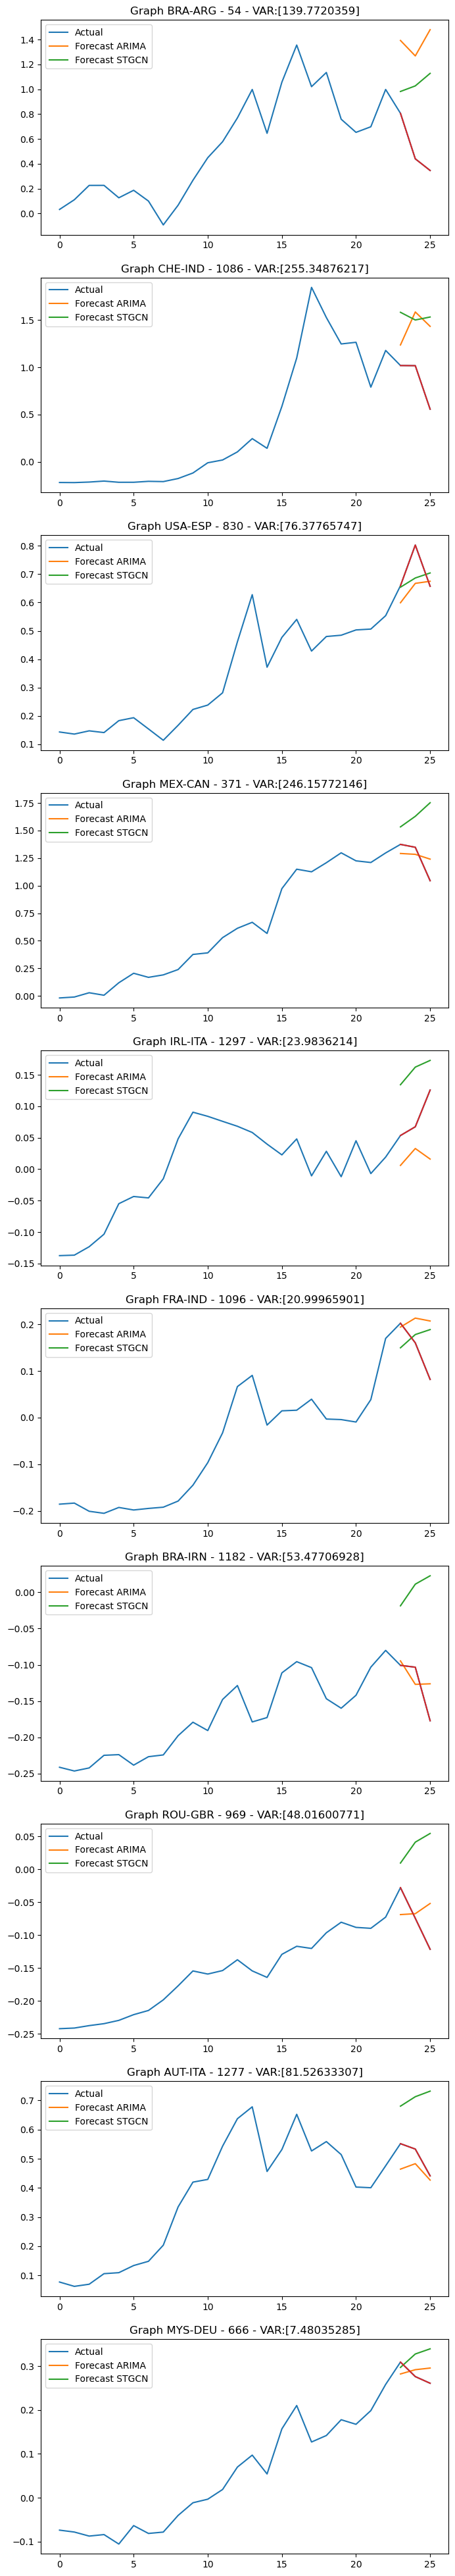

In [132]:
# import random
column_positions = [0 for _ in range(10)]

data = pd.read_csv('./dataset/Datos_TODO_REDUCIDO.csv', header=0)
for axis_number, _ in enumerate(column_positions):
    variance = 100
    while variance > 50:
        column_positions[axis_number] = random.randint(0, 2449)
        dataC = data.iloc[:, column_positions[axis_number]]
        # Quitar el error de valores muy raros.
        variance = abs(((Año_24_y[column_positions[axis_number]] - dataC[22]) / dataC[22]) * 100)
    print("Columna: ", column_positions[axis_number])
    print("Varianza: ", variance)
    print("Valor antiguo: ", dataC[22])
    print("Valor nuevo: ", Año_24_y[column_positions[axis_number]])
#column_positions[0] = 339
#column_positions[1] = 477
#column_positions[2] = 549
#column_positions[3] = 1270
column_positions[0] = 12
column_positions[0] = 509
column_positions[0] = 54

# Create a figure and subplots
fig, axs = plt.subplots(len(column_positions), 1, figsize=(8, 50))

# Plot the forecasted values and confidence intervals
for axis_number, column_position in enumerate(column_positions):
    
    data = pd.read_csv('./dataset/Datos_TODO_REDUCIDO.csv', header=0)
    nombre_columna = data.columns[column_positions[axis_number]]
    data = data.iloc[:, column_position]
    #data.columns.get_loc(column_name)
    
    # Poner la varianza en las labels!
    variance = abs(((Año_24_y[column_positions[axis_number]] - dataC[22]) / dataC[22]) * 100)
    
    # Customize the X-axis ticks
    #axs[axis_number].set_xticks(np.arange(0, 26, 1))  # Set specific tick values
    #axs[axis_number].set_xlim(0, 25)  # Set the X-axis limits

    # Customize the Y-axis ticks
    #axs[axis_number].set_yticks(np.arange(-1.1, 1.1, 0.1))  # Set specific tick values
    #axs[axis_number].set_ylim(-0.5, 0.5)  # Set the Y-axis limits
    
    
    
    axs[axis_number].plot(data.index, z_score(data.values, mean, std), label='Actual')
    axs[axis_number].set_title(f'Graph {nombre_columna} - {column_position} - VAR:{variance}')

    axs[axis_number].plot([23, 24, 25], \
             [z_score(Año_24_yARIMA[column_position], mean, std),  \
              z_score(Año_25_yARIMA[column_position], mean, std),  \
              z_score(Año_26_yARIMA[column_position], mean, std)], \
             label='Forecast ARIMA')

    axs[axis_number].plot([23, 24, 25], \
             [z_score(Año_24_y[column_position], mean, std),  \
              z_score(Año_25_y[column_position], mean, std),  \
              z_score(Año_26_y[column_position], mean, std)], \
             label='Forecast STGCN')
    
    axs[axis_number].plot([23, 24, 25], \
             [z_score(Año_24_x[column_position], mean, std),  \
              z_score(Año_25_x[column_position], mean, std),  \
              z_score(Año_26_x[column_position], mean, std)], \
                         )
    
    axs[axis_number].legend()
    
    #print(nombre_columna, "ERRORES")
    #print("Error del primer año: ", MAE(Año_24_x[column_position], Año_24_y[column_position]))
    #print("Error del segundo año:", MAE(Año_25_x[column_position], Año_25_y[column_position]))
    #print("Error del tercer año: ", MAE(Año_26_x[column_position], Año_26_y[column_position]))
    
print("\nErrores absolutos finales del primer año:  ", MAE(Año_24_x[column_positions], Año_24_y[column_positions]), )
print("Errores absolutos finales del segundo año: ", MAE(Año_25_x[column_positions], Año_25_y[column_positions]), )
print("Errores absolutos finales del tercer año:  ", MAE(Año_26_x[column_positions], Año_26_y[column_positions]), )

print("\nErrores RMSE finales del primer año:  ", RMSE(Año_24_x[column_positions], Año_24_y[column_positions]), )
print("Errores RMSE finales del segundo año: ", RMSE(Año_25_x[column_positions], Año_25_y[column_positions]), )
print("Errores RMSE finales del tercer año:  ", RMSE(Año_26_x[column_positions], Año_26_y[column_positions]), )
    
plt.show()

In [5]:
    axs[axis_number].plot([23, 24, 25], \
             [z_score(Año_24_yARIMA[column_position], mean, std),  \
              z_score(Año_25_yARIMA[column_position], mean, std),  \
              z_score(Año_26_yARIMA[column_position], mean, std)], \
             label='Forecast ARIMA')

    axs[axis_number].plot([23, 24, 25], \
             [z_score(Año_24_y[column_position], mean, std),  \
              z_score(Año_25_y[column_position], mean, std),  \
              z_score(Año_26_y[column_position], mean, std)], \
             label='Forecast STGCN')
    
    axs[axis_number].plot([23, 24, 25], \
             [z_score(Año_24_x[column_position], mean, std),  \
              z_score(Año_25_x[column_position], mean, std),  \
              z_score(Año_26_x[column_position], mean, std)], \

ARG-ARE       AUS-ARE      AUT-ARE       BEL-ARE      BGD-ARE  \
0    16315585.0  1.743842e+08   95413366.0  2.841407e+08   16725541.0   
1    37506807.0  2.593809e+08  106172680.0  2.522536e+08   14679560.0   
2    46559919.0  3.997052e+08  101253040.0  3.278479e+08   15026808.0   
3    39674787.0  3.471166e+08  122164637.0  4.070703e+08   29167548.0   
4    67548591.0  2.499419e+08  130338469.0  4.708355e+08          0.0   
5    86267890.0  4.548436e+08  107343128.0  5.758222e+08   27962249.0   
6    92541099.0  5.488824e+08  275804296.0  7.713404e+08   38791020.0   
7   106125168.0  5.808196e+08  169395363.0  9.044470e+08   12142960.0   
8   172035967.0  6.095704e+08  208737556.0  8.865691e+08   12909857.0   
9   180515310.0  7.356847e+08  252976718.0  1.184821e+09   19482668.0   
10  217999931.0  7.539926e+08  324918364.0  1.496001e+09   34411224.0   
11  158721891.0  1.159903e+09  492931165.0  1.803429e+09   45906320.0   
12  190482502.0  2.260097e+09  663708992.0  2.301562e+09   43353124.0   
13  352442945.0  2.883725e+09  852962288.0  2.751591e+09   52488782.0   
14  234627277.0  1.380474e+09  585126842.0  2.000330e+09   88559996.0   
15  265059608.0  1.504369e+09  641205473.0  2.127896e+09   77270427.0   
16  337159089.0  1.711905e+09  710580553.0  3.105856e+09  137847007.0   
17  289825151.0  1.736079e+09  745234393.0  3.061977e+09  276043837.0   
18  262368310.0  1.745364e+09  834949432.0  4.390257e+09  217216766.0   
19  201087605.0  2.098556e+09  894832390.0  4.706903e+09  211855261.0   
20  171119400.0  1.975885e+09  855563910.0  3.301630e+09  312336958.0   
21  233623842.0  1.724430e+09  696444369.0  3.543592e+09  217618589.0   
22  216873373.0  2.564634e+09  696353451.0  3.742097e+09  429311877.0   
23  223251244.0  2.816917e+09  684577471.0  3.487392e+09  429583093.0   
24  394032934.0  2.580638e+09  557882497.0  2.659086e+09  432728649.0   
25  425946557.0  1.840177e+09  541321675.0  2.409485e+09  349943798.0   

         BRA-ARE       CAN-ARE       CHE-ARE      CHL-ARE       CHN-ARE  ...  \
0   1.090672e+08  1.464124e+08  3.684022e+08   52732322.0  1.100646e+09  ...   
1   1.716872e+08  1.266539e+08  4.167305e+08   53755853.0  1.076877e+09  ...   
2   2.505560e+08  1.880118e+08  4.203970e+08   48167232.0  1.301153e+09  ...   
3   1.827809e+08  1.955703e+08  4.324040e+08   64748231.0  1.291306e+09  ...   
4   1.503316e+08  1.223233e+08  3.937649e+08   26865253.0  1.417092e+09  ...   
5   2.246353e+08  1.546056e+08  3.974891e+08   34435101.0  2.076091e+09  ...   
6   4.149675e+08  1.346383e+08  5.784689e+08   32999617.0  2.361334e+09  ...   
7   6.346111e+08  1.736818e+08  7.336243e+08  106058899.0  3.401727e+09  ...   
8   5.487893e+08  2.438700e+08  7.418609e+08   51153846.0  4.867229e+09  ...   
9   7.066882e+08  3.237060e+08  9.915663e+08   57392836.0  6.551583e+09  ...   
10  7.269652e+08  4.843002e+08  1.212057e+09   79048079.0  8.607353e+09  ...   
11  1.046172e+09  6.933145e+08  1.457868e+09   61208176.0  1.112275e+10  ...   
12  1.190008e+09  1.042483e+09  1.798394e+09  114477304.0  1.689784e+10  ...   
13  1.311398e+09  1.343869e+09  3.283537e+09   96806652.0  2.330342e+10  ...   
14  1.748786e+09  1.138569e+09  1.996595e+09   61349699.0  1.844229e+10  ...   
15  1.829160e+09  1.100884e+09  2.117854e+09   82437308.0  2.101737e+10  ...   
16  2.148074e+09  1.367602e+09  3.045150e+09  120316727.0  2.644382e+10  ...   
17  2.415926e+09  1.450637e+09  5.367019e+09  122890961.0  2.922085e+10  ...   
18  2.456506e+09  1.522127e+09  9.250398e+09  148468095.0  3.144711e+10  ...   
19  2.723934e+09  1.597706e+09  6.438970e+09  141191910.0  3.736651e+10  ...   
20  2.499144e+09  1.567135e+09  5.180110e+09   87511612.0  3.515620e+10  ...   
21  2.175238e+09  1.343938e+09  4.243624e+09   82686709.0  2.891875e+10  ...   
22  2.469129e+09  1.254870e+09  4.097138e+09  130686316.0  3.019402e+10  ...   
23  2.020098e+09  1.155268e+09  4.894269e+09  149613669.0  2.998839e+10  ...   
24  2.229946e+09  1.152568e+09  3.59

In [16]:
Año_24_yARIMA[1941]

96601923.58313115

In [258]:
data_seq_falladas = data_seq.iloc[:, list(dict_errores.keys())[:10]].copy()
data_seq_falladas

CHN-USA       MEX-USA       CAN-USA       CHN-HKG       USA-CAN  \
0   3.989724e+10  6.275094e+10  1.485857e+11  6.033263e+10  1.255863e+11   
1   4.449100e+10  7.420275e+10  1.602425e+11  6.431551e+10  1.322365e+11   
2   5.216533e+10  8.727192e+10  1.751868e+11  6.041880e+10  1.494838e+11   
3   5.898906e+10  9.626973e+10  1.790166e+11  5.503339e+10  1.532085e+11   
4   6.925933e+10  1.111263e+11  2.026370e+11  5.856093e+10  1.635010e+11   
5   8.176510e+10  1.377000e+11  2.350069e+11  5.720233e+10  1.754274e+11   
6   8.341148e+10  1.328483e+11  2.217530e+11  5.734408e+10  1.632259e+11   
7   1.039182e+11  1.361682e+11  2.154748e+11  6.857198e+10  1.602194e+11   
8   1.252103e+11  1.398038e+11  2.305405e+11  8.497586e+10  1.681459e+11   
9   1.606004e+11  1.579040e+11  2.652068e+11  1.054299e+11  1.863490e+11   
10  2.023200e+11  1.726115e+11  2.967866e+11  1.265753e+11  2.108732e+11   
11  2.370795e+11  2.007278e+11  3.135625e+11  1.549684e+11  2.291053e+11   
12  2.590855e+11  2.131257e+11  3.281650e+11  1.824528e+11  2.471150e+11   
13  2.714707e+11  2.184651e+11  3.507385e+11  1.900403e+11  2.592628e+11   
14  2.391748e+11  1.784893e+11  2.317806e+11  1.656874e+11  2.036507e+11   
15  2.997633e+11  2.323848e+11  2.848831e+11  2.157383e+11  2.471434e+11   
16  3.320647e+11  2.653131e+11  3.240003e+11  2.625217e+11  2.771322e+11   
17  3.548314e+11  2.801404e+11  3.307852e+11  3.153197e+11  2.908520e+11   
18  3.674196e+11  2.832516e+11  3.380607e+11  3.682609e+11  2.987953e+11   
19  3.903145e+11  2.969968e+11  3.575977e+11  3.514296e+11  3.092465e+11   
20  4.043221e+11  2.992553e+11  3.050143e+11  3.206167e+11  2.764796e+11   
21  3.851513e+11  2.962450e+11  2.875881e+11  2.826586e+11  2.647631e+11   
22  4.223739e+11  3.158243e+11  3.103271e+11  2.776594e+11  2.798641e+11   
23  4.576371e+11  3.492596e+11  3.302829e+11  3.012513e+11  2.975683e+11   
24  3.898797e+11  3.612884e+11  3.310525e+11  2.782632e+11  2.890866e+11   
25  4.566874e+11  3.288662e+11  2.783938e+11  2.713620e+11  2.511284e+11   

         USA-MEX       VNM-CHN       DEU-ITA       JPN-USA       JPN-CHN  
0   4.637557e+10  3.320257e+08  3.920360e+10  1.265806e+11  2.231738e+10  
1   5.682344e+10  3.093615e+08  3.899212e+10  1.164707e+11  2.225026e+10  
2   7.145531e+10  3.570920e+08  3.679490e+10  1.211397e+11  2.194847e+10  
3   7.923093e+10  2.173503e+08  3.936863e+10  1.226105e+11  2.026521e+10  
4   8.715814e+10  3.542752e+08  3.999609e+10  1.335116e+11  2.395732e+10  
5   1.119889e+11  1.167947e+09  4.130503e+10  1.288968e+11  3.107875e+10  
6   1.016127e+11  1.164714e+09  4.135200e+10  1.071031e+11  3.259223e+10  
7   9.762151e+10  1.231331e+09  4.391052e+10  1.242081e+11  4.360314e+10  
8   9.757142e+10  1.576100e+09  5.446355e+10  1.203421e+11  6.100876e+10  
9   1.107818e+11  2.610770e+09  6.426277e+10  1.323071e+11  7.858902e+10  
10  1.200433e+11  2.761413e+09  6.622407e+10  1.409622e+11  8.438818e+10  
11  1.341007e+11  2.763999e+09  7.362937e+10  1.511851e+11  9.873639e+10  
12  1.365550e+11  3.369590e+09  8.828032e+10  1.486582e+11  1.165298e+11  
13  1.515284e+11  4.492386e+09  9.128733e+10  1.421105e+11  1.312017e+11  
14  1.288414e+11  4.827632e+09  7.050085e+10  9.805941e+10  1.205520e+11  
15  1.634750e+11  7.213875e+09  7.758128e+10  1.229563e+11  1.571598e+11  
16  1.978664e+11  1.122714e+10  8.579139e+10  1.317408e+11  1.709585e+11  
17  2.155334e+11  1.541500e+10  7.100290e+10  1.239907e+11  1.529074e+11  
18  2.256660e+11  1.606589e+10  7.006594e+10  1.152453e+11  1.384335e+11  
19  2.395261e+11  1.858963e+10  7.157049e+10  1.127114e+11  1.357231e+11  
20  2.351386e+11  2.616939e+10  6.402171e+10  1.105200e+11  1.171300e+11  
21  2.296608e+11  3.546439e+10  6.765463e+10  1.344579e+11  1.234493e+11  
22  2.427266e+11  4.832090e+10  7.353370e+10  1.391477e+11  1.427626e+11  
23  2.648560e+11  6.270639e+10  8.241467e+10  1.450772e+11  1.529673e+11  
24  2.556837e+11  6.145687e+10  7.580901e+10  1.455159e+11  1.415254e+11  
25  2.

In [259]:
data_seq_falladas = data_seq.iloc[:, list(dict_erroresI.keys())[:10]].copy()
data_seq_falladas

ROU-GBR       ESP-ROU       ROU-ESP       CHE-MYS       GBR-DEU  \
0   2.413597e+08  7.435068e+07  1.133292e+08  5.544568e+08  2.897756e+10   
1   2.549047e+08  1.155812e+08  1.162803e+08  4.474601e+08  2.993456e+10   
2   3.067100e+08  6.818975e+07  9.603688e+07  4.729870e+08  3.164098e+10   
3   3.484579e+08  9.619360e+07  8.683991e+07  2.540331e+08  3.208397e+10   
4   4.186601e+08  8.677677e+07  1.215049e+08  3.312486e+08  2.977765e+10   
5   5.407743e+08  1.093090e+08  1.362881e+08  3.746874e+08  3.478118e+10   
6   6.302361e+08  1.653652e+08  1.974841e+08  3.893898e+08  3.397656e+10   
7   8.566174e+08  2.275689e+08  2.617475e+08  3.377932e+08  3.273558e+10   
8   1.155769e+09  3.667102e+08  3.414465e+08  3.797534e+08  3.375352e+10   
9   1.473808e+09  5.464139e+08  5.022021e+08  5.660595e+08  4.033098e+10   
10  1.407660e+09  7.221619e+08  6.816922e+08  6.154451e+08  4.202616e+10   
11  1.482274e+09  9.524529e+08  7.875057e+08  5.710245e+08  5.126167e+10   
12  1.712854e+09  1.332854e+09  8.158894e+08  7.305345e+08  5.078757e+10   
13  1.475010e+09  1.557466e+09  1.118647e+09  7.366427e+08  5.430781e+10   
14  1.336198e+09  9.640450e+08  1.135743e+09  5.402355e+08  3.988648e+10   
15  1.828185e+09  1.158247e+09  1.393472e+09  6.856124e+08  4.517892e+10   
16  2.000304e+09  1.775613e+09  1.258017e+09  9.847126e+08  5.539575e+10   
17  1.953959e+09  1.528035e+09  1.148805e+09  1.213493e+09  5.211492e+10   
18  2.289137e+09  1.701763e+09  1.459570e+09  1.630582e+09  4.837398e+10   
19  2.513858e+09  2.081563e+09  1.579514e+09  1.891860e+09  5.188383e+10   
20  2.403691e+09  2.028960e+09  1.585438e+09  1.741858e+09  4.638246e+10   
21  2.383816e+09  2.266217e+09  1.826902e+09  1.497443e+09  4.344917e+10   
22  2.622815e+09  2.494995e+09  1.942419e+09  2.441719e+09  4.610352e+10   
23  3.252280e+09  2.594237e+09  2.288045e+09  2.295541e+09  4.722627e+10   
24  2.597849e+09  2.588891e+09  2.151793e+09  1.346164e+09  4.611049e+10   
25  1.936498e+09  2.083289e+09  1.971293e+09  1.205149e+09  4.143589e+10   

         IDN-USA       SGP-BEL       ROU-FRA       ARE-NLD       BGD-FRA  
0   6.367375e+09  2.714545e+08  4.577689e+08  5.234381e+07  2.270360e+08  
1   6.990996e+09  2.149228e+08  4.756839e+08  5.140070e+07  2.644732e+08  
2   7.753783e+09  2.946031e+08  4.774051e+08  6.826027e+07  3.501026e+08  
3   7.922550e+09  2.650406e+08  5.467400e+08  7.259957e+07  3.949361e+08  
4   8.158135e+09  4.927768e+08  6.153259e+08  9.053477e+07  3.152679e+08  
5   8.917051e+09  5.364589e+08  7.630165e+08  1.178108e+08  3.430653e+08  
6   8.652179e+09  5.872937e+08  9.288114e+08  1.008871e+08  3.489791e+08  
7   8.267859e+09  5.874539e+08  1.132832e+09  8.658528e+07  3.767265e+08  
8   8.155891e+09  4.521608e+08  1.425233e+09  1.691337e+08  4.718425e+08  
9   9.274540e+09  5.833176e+08  1.949367e+09  4.539756e+08  6.349966e+08  
10  1.033027e+10  7.193698e+08  2.075286e+09  9.819292e+08  6.329145e+08  
11  1.145360e+10  1.056288e+09  2.345505e+09  5.798024e+08  7.663434e+08  
12  1.208500e+10  1.495391e+09  2.769813e+09  9.972389e+08  8.714169e+08  
13  1.332949e+10  1.871378e+09  3.386715e+09  8.528779e+08  1.033162e+09  
14  1.091592e+10  2.131468e+09  3.183386e+09  4.239740e+08  1.048100e+09  
15  1.399067e+10  3.092861e+09  3.993905e+09  7.288727e+08  1.205288e+09  
16  1.604674e+10  4.024426e+09  4.544327e+09  1.115896e+09  1.611321e+09  
17  1.506310e+10  4.206517e+09  3.658695e+09  9.249813e+08  1.432368e+09  
18  1.581267e+10  4.559221e+09  4.105533e+09  1.092032e+09  1.632292e+09  
19  1.627263e+10  4.552954e+09  4.304113e+09  1.032994e+09  1.809777e+09  
20  1.649737e+10  2.958333e+09  3.866898e+09  9.988719e+08  1.874261e+09  
21  1.610749e+10  4.591908e+09  4.337559e+09  1.091645e+09  2.184720e+09  
22  1.700171e+10  4.467970e+09  4.507535e+09  1.214809e+09  2.217450e+09  
23  1.757519e+10  4.637142e+09  5.309206e+09  1.946980e+09  2.462940e+09  
24  1.710558e+10  3.400929e+09  4.938318e+09  1.277266e+09  2.663551e+09  
25  1.

In [266]:
Año_26_x[list(dict_errores.keys())[:10]]

array([[4.56687355e+11],
       [3.28866201e+11],
       [2.78393813e+11],
       [2.71361980e+11],
       [2.51128398e+11],
       [2.12009747e+11],
       [7.40576796e+10],
       [6.91192710e+10],
       [1.22199426e+11],
       [1.47511968e+11]])

In [267]:
Año_26_y[list(dict_errores.keys())[:10]]

array([[1.7969747e+11],
       [1.7975597e+11],
       [1.7977159e+11],
       [1.7915152e+11],
       [1.7969257e+11],
       [1.7971433e+11],
       [3.3144594e+10],
       [5.4616490e+10],
       [1.3260075e+11],
       [1.5284514e+11]])

In [264]:
Año_26_x[list(dict_erroresI.keys())[:10]]

array([[1.93649842e+09],
       [2.08328884e+09],
       [1.97129294e+09],
       [1.20514864e+09],
       [4.14358855e+10],
       [1.71159552e+10],
       [3.80691690e+09],
       [4.06704820e+09],
       [1.03714977e+09],
       [1.38316877e+09]])

In [265]:
Año_26_y[list(dict_erroresI.keys())[:10]]

array([[2.0390296e+09],
       [1.3864617e+09],
       [1.1326034e+09],
       [1.0715164e+09],
       [5.0262675e+10],
       [1.7652920e+10],
       [3.6190710e+09],
       [4.2245810e+09],
       [8.0698800e+08],
       [1.2948106e+09]])

In [10]:
from utils.math_utils import *
from data_loader.data_utilsTFM import *

n, n_his, n_pred = 2450, 16, 3

path = './dataset/Datos_TODO_REDUCIDO_interpolado_2.csv'
n_train, n_val, n_test = 17, 0, 3
PeMS = data_gen_simple(path, (n_train, n_val, n_test, "robust"), n, n_his + n_pred, True)
print(f'>> Loading dataset with Mean: {PeMS.mean:.2f}, STD: {PeMS.std:.2f}')

(17, 19, 2450, 1)
0 19
3 22
6 25
9 28
12 31
15 34
18 37
21 40
24 43
27 46
30 49
33 52
36 55
39 58
42 61
45 64
48 67
(0, 19, 2450, 1)
(3, 19, 2450, 1)
51 70
54 73
57 76
>> Loading dataset with Mean: 3645884473.33, STD: 2041554713.67


In [ ]:
PeMS.get_data("test")[-1, -3:, 1, 0]

In [18]:
PeMS.get_data("test")[-1, -3:, 1, 0]

array([-0.64533777, -0.76666001, -0.88798225])

In [9]:
PeMS.get_data("test")[-1, -3:, 1, 0]

array([-0.64533777, -0.76666001, -0.88798225])

In [3]:
PeMS.get_data("test").shape

(3, 19, 2450, 1)

In [217]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

info2020 = pd.read_csv('info2020.csv', header=0)

# Means
mean_STGCN = info2020['Error porcentual en STGCN'].mean()
mean_ARIMA = info2020['Error porcentual en ARIMA'].mean()

pred_STGCN = info2020['Valor Predicción STGCN']
pred_ARIMA = info2020['Valor Predicción ARIMA']

# Standard deviations
sd_STGCN = info2020['Error porcentual en STGCN'].std()
#sd_STGCN = np.percentile(info2020['Error porcentual en STGCN'], 25)
sd_ARIMA = info2020['Error porcentual en ARIMA'].std()
#sd_ARIMA = np.percentile(info2020['Error porcentual en ARIMA'], 25)
                         
# Confidence interval, limits
info2020['low.ci.STGCN'] = info2020['Valor Predicción STGCN'] - 2 * info2020['Valor Predicción STGCN'].std()
info2020['high.ci.STGCN'] = info2020['Valor Predicción STGCN'] + 2 * info2020['Valor Predicción STGCN'].std()

info2020['low.ci.ARIMA'] = info2020['Valor Predicción ARIMA'] - 2 * info2020['Valor Predicción ARIMA'].std()
info2020['high.ci.ARIMA'] = info2020['Valor Predicción ARIMA'] + 2 * info2020['Valor Predicción ARIMA'].std()

# Check Goodness pred
x = np.arange(1, len(info2020) + 1)

df = pd.DataFrame({
    'pred_STGCN': pred_STGCN,
    'pred_ARIMA': pred_ARIMA,
    'low.ci.STGCN': info2020['low.ci.STGCN'],
    'high.ci.STGCN': info2020['high.ci.STGCN'],
    'low.ci.ARIMA': info2020['low.ci.ARIMA'],
    'high.ci.ARIMA': info2020['high.ci.ARIMA'],
    'x': x,
    'real': info2020['Valor Real']
})

# Percentage of times true value is outside Confidence Interval STGCN
percentage_STGCN = ((info2020['Valor Real'] < info2020['low.ci.STGCN']) | 
                    (info2020['Valor Real'] > info2020['high.ci.STGCN'])).mean() * 100

# Percentage of times true value is outside Confidence Interval ARIMA
percentage_ARIMA = ((info2020['Valor Real'] < info2020['low.ci.ARIMA']) | 
                    (info2020['Valor Real'] > info2020['high.ci.ARIMA'])).mean() * 100

# List of success/failure in predictions, statistically, according to our CI
checklist_STGCN = ((info2020['Valor Real'] < info2020['low.ci.STGCN']) | 
                   (info2020['Valor Real'] > info2020['high.ci.STGCN']))

checklist_ARIMA = ((info2020['Valor Real'] < info2020['low.ci.ARIMA']) | 
                   (info2020['Valor Real'] > info2020['high.ci.ARIMA']))

df_checklist = pd.DataFrame({'checklist_STGCN': checklist_STGCN, 'checklist_ARIMA': checklist_ARIMA})

# Plotting CI with CI bands
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['x'], y=df['pred_STGCN'], mode='lines', name='STGCN'))
fig.add_trace(go.Scatter(x=df['x'], y=df['pred_ARIMA'], mode='lines', name='ARIMA'))

fig.add_trace(go.Scatter(x=df['x'], y=df['low.ci.STGCN'], fill=None, line=dict(color='grey'), name='STGCN CI'))
fig.add_trace(go.Scatter(x=df['x'], y=df['high.ci.STGCN'], fill='tonexty', line=dict(color='grey'), name='STGCN CI'))

fig.add_trace(go.Scatter(x=df['x'], y=df['low.ci.ARIMA'], fill=None, line=dict(color='lightgrey'), name='ARIMA CI'))
fig.add_trace(go.Scatter(x=df['x'], y=df['high.ci.ARIMA'], fill='tonexty', line=dict(color='lightgrey'), name='ARIMA CI'))

# Tamaño de fuente
fig.update_layout(
    font=dict(size=18)
)

# Tamaño de la figura
fig.update_layout(
    autosize=False,
    width=1000,
    height=600
)

fig.show()

In [218]:
info2020['Valor Predicción STGCN'].std()

1.023558740297509

In [219]:
info2020['Valor Predicción ARIMA'].std()

1.122081477914741

In [220]:
percentage_STGCN

7.244897959183673

In [221]:
percentage_ARIMA

0.10204081632653061

In [22]:
%%time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from os.path import join as pjoin
from data_loader.data_utilsTFM import *
from pmdarima.arima import auto_arima

# Load the ti# Carga de datosme series data
#n_train, n_val, n_test = 8, 2, 1
#PeMS = data_gen_simple('./dataset/Datos_TODO_REDUCIDO.csv', (n_train, n_val, n_test, "robust"), 2450, 16)
#print(f'>> Loading dataset with Mean: {PeMS.mean:.2f}, STD: {PeMS.std:.2f}')

## CAMBIAR LA DIRECCIÓN
direccion = './dataset/Datos_TODO_reducido.csv'
tamaño_de_la_base = 2450 # 2450 # 288 # 2162

data_aux = pd.read_csv(direccion, header=0)
#Año_22_yARIMA = np.zeros(tamaño_de_la_base)
#Año_23_yARIMA = np.zeros(tamaño_de_la_base)
#Año_24_yARIMA = np.zeros(tamaño_de_la_base)
#Año_25_yARIMA = np.zeros(tamaño_de_la_base)
Año_26_yARIMA = np.zeros(tamaño_de_la_base)

for column_number, column_name in enumerate(data_aux.columns):
    print(column_number,  column_name)
    data = pd.read_csv(direccion, header=0, usecols=[column_name])
    data_train = data.iloc[:-1]
    data_test = data.iloc[-1:]
    
    # Fit ARIMA model
    model = auto_arima(data_train, max_q=20)
    print(model.summary())
    # model_fit = model.fit()

    # Make predictions
    num_forecast_years = 1
    #forecast_start = data.index[0]
    #forecast_end = data.index[-5]
    #forecast = model.predict(steps=num_forecast_years)
    forecast_values, confidence_intervals = model.predict(n_periods=num_forecast_years, return_conf_int=True)
    #pred_df = forecast.conf_int() # Sacar los intervalos de confianza.
    #pred_df['pred'] = forecast.predicted_mean
    #pred_df.columns = ['lower', 'upper', 'pred']

    
    #Año_22_yARIMA[column_number] = forecast_values.values[0]
    #Año_23_yARIMA[column_number] = forecast_values.values[0] # 1
    #Año_24_yARIMA[column_number] = forecast_values.values[0] # 2
    #Año_25_yARIMA[column_number] = forecast_values.values[0] # 3
    Año_26_yARIMA[column_number] = forecast_values.values[0] # 4

0 ARG-ARE
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -465.601
Date:                Fri, 28 Jul 2023   AIC                            933.203
Time:                        17:32:49   BIC                            934.381
Sample:                             0   HQIC                           933.516
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.982e+15   8.42e+14      4.728      0.000    2.33e+15    5.63e+15
Ljung-Box (L1) (Q):                   1.33   Jarque-Bera (JB):                 2.50
Prob(Q):                             

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -481.400
Date:                Fri, 28 Jul 2023   AIC                            966.800
Time:                        17:32:50   BIC                            969.156
Sample:                             0   HQIC                           967.425
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7355      0.199      3.696      0.000       0.346       1.125
sigma2      1.817e+16   9.28e-19   1.96e+34      0.000    1.82e+16    1.82e+16
Ljung-Box (L1) (Q):                   0.35   Jarque-

13 DNK-ARE
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -453.885
Date:                Fri, 28 Jul 2023   AIC                            915.769
Time:                        17:32:52   BIC                            920.481
Sample:                             0   HQIC                           917.019
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.008e+07   1.65e-09   1.83e+16      0.000    3.01e+07    3.01e+07
ar.L1         -0.6136      0.129     -4.768      0.000      -0.866      -0.361
ar.L2         -0.4034      0.185     -2.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -551.496
Date:                Fri, 28 Jul 2023   AIC                           1106.992
Time:                        17:32:53   BIC                           1109.348
Sample:                             0   HQIC                          1107.617
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4410      0.253     -1.744      0.081      -0.937       0.055
sigma2      6.283e+18   3.55e-20   1.77e+38      0.000    6.28e+18    6.28e+18
Ljung-Box (L1) (Q):                   0.23   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -531.363
Date:                Fri, 28 Jul 2023   AIC                           1070.726
Time:                        17:32:54   BIC                           1075.438
Sample:                             0   HQIC                          1071.976
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.885e+08   5.17e-10   3.64e+17      0.000    1.89e+08    1.89e+08
ar.L1         -0.3028      0.255     -1.187      0.235      -0.803       0.197
ma.L1         -0.8758      0.199     -4.407      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -484.047
Date:                Fri, 28 Jul 2023   AIC                            970.093
Time:                        17:32:55   BIC                            971.271
Sample:                             0   HQIC                           970.406
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.852e+16   2.43e+15      7.631      0.000    1.38e+16    2.33e+16
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):                50.00
Prob(Q):                              0.20   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(4, 1, 0)   Log Likelihood                -465.330
Date:                Fri, 28 Jul 2023   AIC                            942.661
Time:                        17:32:57   BIC                            949.729
Sample:                             0   HQIC                           944.536
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.464e+07   1.83e-09   1.89e+16      0.000    3.46e+07    3.46e+07
ar.L1          0.1056      0.228      0.463      0.643      -0.342       0.553
ar.L2         -0.4282      0.136     -3.151      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -469.218
Date:                Fri, 28 Jul 2023   AIC                            940.436
Time:                        17:32:57   BIC                            941.614
Sample:                             0   HQIC                           940.749
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.383e+15   1.42e+15      3.788      0.000     2.6e+15    8.17e+15
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.22   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -499.584
Date:                Fri, 28 Jul 2023   AIC                           1001.168
Time:                        17:32:58   BIC                           1002.346
Sample:                             0   HQIC                          1001.480
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       6.76e+16   1.57e+16      4.301      0.000    3.68e+16    9.84e+16
Ljung-Box (L1) (Q):                   2.29   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.13   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -468.027
Date:                Fri, 28 Jul 2023   AIC                            938.055
Time:                        17:33:00   BIC                            939.233
Sample:                             0   HQIC                           938.367
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.874e+15   1.64e+15      2.969      0.003    1.66e+15    8.09e+15
Ljung-Box (L1) (Q):                   1.79   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.18   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -473.867
Date:                Fri, 28 Jul 2023   AIC                            949.735
Time:                        17:33:01   BIC                            950.913
Sample:                             0   HQIC                           950.047
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       7.93e+15   2.09e+15      3.798      0.000    3.84e+15     1.2e+16
Ljung-Box (L1) (Q):                   2.48   Jarque-Bera (JB):                 2.10
Prob(Q):                              0.12   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -445.891
Date:                Fri, 28 Jul 2023   AIC                            895.782
Time:                        17:33:02   BIC                            898.138
Sample:                             0   HQIC                           896.407
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3778      0.221     -1.706      0.088      -0.812       0.056
sigma2      9.229e+14   3.42e-17    2.7e+31      0.000    9.23e+14    9.23e+14
Ljung-Box (L1) (Q):                   0.35   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -501.666
Date:                Fri, 28 Jul 2023   AIC                           1009.332
Time:                        17:33:03   BIC                           1012.989
Sample:                             0   HQIC                          1010.346
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.943e+08   9.19e-11    3.2e+18      0.000    2.94e+08    2.94e+08
ar.L1          0.3722      0.049      7.609      0.000       0.276       0.468
sigma2      1.572e+16   1.24e-19   1.27e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -461.116
Date:                Fri, 28 Jul 2023   AIC                            928.232
Time:                        17:33:05   BIC                            931.888
Sample:                             0   HQIC                           929.246
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.031e+07   5.03e-10   6.03e+16      0.000    3.03e+07    3.03e+07
ar.L1          0.6945      0.048     14.518      0.000       0.601       0.788
sigma2      5.906e+14   1.08e-18   5.45e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -454.764
Date:                Fri, 28 Jul 2023   AIC                            911.528
Time:                        17:33:05   BIC                            912.706
Sample:                             0   HQIC                           911.840
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.614e+15   6.81e+14      2.368      0.018    2.78e+14    2.95e+15
Ljung-Box (L1) (Q):                   1.14   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.29   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -421.232
Date:                Fri, 28 Jul 2023   AIC                            844.464
Time:                        17:33:06   BIC                            845.642
Sample:                             0   HQIC                           844.777
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       9.87e+13   2.96e+13      3.332      0.001    4.06e+13    1.57e+14
Ljung-Box (L1) (Q):                   2.46   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.12   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -450.457
Date:                Fri, 28 Jul 2023   AIC                            904.915
Time:                        17:33:08   BIC                            907.271
Sample:                             0   HQIC                           905.540
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5372      0.129     -4.155      0.000      -0.791      -0.284
sigma2       1.22e+15   3.08e-17   3.96e+31      0.000    1.22e+15    1.22e+15
Ljung-Box (L1) (Q):                   0.04   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -459.812
Date:                Fri, 28 Jul 2023   AIC                            921.623
Time:                        17:33:10   BIC                            922.801
Sample:                             0   HQIC                           921.936
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.458e+15   3.74e+14      6.575      0.000    1.73e+15    3.19e+15
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                40.12
Prob(Q):                              0.69   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -492.922
Date:                Fri, 28 Jul 2023   AIC                            987.843
Time:                        17:33:11   BIC                            989.022
Sample:                             0   HQIC                           988.156
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.88e+16   6.94e+15      5.593      0.000    2.52e+16    5.24e+16
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                26.87
Prob(Q):                              0.62   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -393.242
Date:                Fri, 28 Jul 2023   AIC                            792.484
Time:                        17:33:12   BIC                            795.890
Sample:                             0   HQIC                           793.340
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7622      0.166     -4.602      0.000      -1.087      -0.438
ma.L1         -0.7239      0.193     -3.753      0.000      -1.102      -0.346
sigma2      4.157e+13   7.04e-16   5.91e+28      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -480.951
Date:                Fri, 28 Jul 2023   AIC                            963.903
Time:                        17:33:13   BIC                            965.081
Sample:                             0   HQIC                           964.215
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.431e+16   3.44e+15      4.160      0.000    7.57e+15    2.11e+16
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.01
Prob(Q):                              0.77   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -498.801
Date:                Fri, 28 Jul 2023   AIC                           1009.603
Time:                        17:33:14   BIC                           1016.671
Sample:                             0   HQIC                          1011.478
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.469e+08   1.51e-09   2.95e+17      0.000    4.47e+08    4.47e+08
ar.L1         -1.3895      0.304     -4.570      0.000      -1.985      -0.794
ar.L2         -0.9063      0.242     -3.742      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -550.132
Date:                Fri, 28 Jul 2023   AIC                           1102.263
Time:                        17:33:15   BIC                           1103.441
Sample:                             0   HQIC                          1102.576
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.564e+18    1.1e+18      4.151      0.000    2.41e+18    6.72e+18
Ljung-Box (L1) (Q):                   0.76   Jarque-Bera (JB):                 3.90
Prob(Q):                              0.38   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -455.095
Date:                Fri, 28 Jul 2023   AIC                            912.190
Time:                        17:33:16   BIC                            913.368
Sample:                             0   HQIC                           912.503
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.659e+15   4.34e+14      3.819      0.000    8.08e+14    2.51e+15
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.68   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -428.934
Date:                Fri, 28 Jul 2023   AIC                            863.869
Time:                        17:33:17   BIC                            867.403
Sample:                             0   HQIC                           864.806
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.951e+06   2.98e+06      2.333      0.020    1.11e+06    1.28e+07
ar.L1         -0.5179      0.249     -2.079      0.038      -1.006      -0.030
sigma2      2.032e+14      0.218    9.3e+14      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -526.584
Date:                Fri, 28 Jul 2023   AIC                           1057.168
Time:                        17:33:18   BIC                           1059.524
Sample:                             0   HQIC                          1057.793
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.595e+08   1.67e+08      2.154      0.031    3.23e+07    6.87e+08
sigma2      6.687e+17      0.027   2.43e+19      0.000    6.69e+17    6.69e+17
Ljung-Box (L1) (Q):                   0.00   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -399.276
Date:                Fri, 28 Jul 2023   AIC                            800.553
Time:                        17:33:19   BIC                            801.731
Sample:                             0   HQIC                           800.865
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.584e+13   3.75e+12      4.221      0.000    8.48e+12    2.32e+13
Ljung-Box (L1) (Q):                   2.93   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.09   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -486.438
Date:                Fri, 28 Jul 2023   AIC                            978.876
Time:                        17:33:20   BIC                            982.533
Sample:                             0   HQIC                           979.890
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.472e+07   1.46e-10   6.49e+17      0.000    9.47e+07    9.47e+07
ar.L1          0.6405      0.045     14.121      0.000       0.552       0.729
sigma2      4.682e+15   3.37e-19   1.39e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -522.034
Date:                Fri, 28 Jul 2023   AIC                           1048.069
Time:                        17:33:21   BIC                           1050.425
Sample:                             0   HQIC                          1048.694
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.962e+08   1.38e+08      2.145      0.032    2.56e+07    5.67e+08
sigma2      4.577e+17      0.096   4.76e+18      0.000    4.58e+17    4.58e+17
Ljung-Box (L1) (Q):                   0.78   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -484.126
Date:                Fri, 28 Jul 2023   AIC                            976.253
Time:                        17:33:22   BIC                            981.128
Sample:                             0   HQIC                           977.605
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.399e+08   4.81e-10   4.99e+17      0.000     2.4e+08     2.4e+08
ar.L1          0.8706      0.280      3.104      0.002       0.321       1.420
ar.L2         -0.3790      0.281     -1.351      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -479.077
Date:                Fri, 28 Jul 2023   AIC                            962.154
Time:                        17:33:23   BIC                            964.510
Sample:                             0   HQIC                           962.779
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6159      0.109     -5.657      0.000      -0.829      -0.403
sigma2      1.314e+16   2.96e-19   4.43e+34      0.000    1.31e+16    1.31e+16
Ljung-Box (L1) (Q):                   0.18   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -501.644
Date:                Fri, 28 Jul 2023   AIC                           1009.287
Time:                        17:33:24   BIC                           1012.944
Sample:                             0   HQIC                          1010.301
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.091e+09   1.73e-10   6.32e+18      0.000    1.09e+09    1.09e+09
ma.L1          0.6411      0.204      3.138      0.002       0.241       1.042
sigma2      1.785e+16   2.25e-18   7.94e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -509.648
Date:                Fri, 28 Jul 2023   AIC                           1025.296
Time:                        17:33:25   BIC                           1028.953
Sample:                             0   HQIC                          1026.311
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.001e+08   8.27e-11   1.21e+18      0.000       1e+08       1e+08
ar.L1          0.7034      0.054     12.977      0.000       0.597       0.810
sigma2      2.954e+16    8.3e-20   3.56e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -466.790
Date:                Fri, 28 Jul 2023   AIC                            935.581
Time:                        17:33:26   BIC                            936.759
Sample:                             0   HQIC                           935.893
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.397e+15   5.26e+14      8.361      0.000    3.37e+15    5.43e+15
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                78.69
Prob(Q):                              0.75   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -492.198
Date:                Fri, 28 Jul 2023   AIC                            986.395
Time:                        17:33:28   BIC                            987.573
Sample:                             0   HQIC                           986.708
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.653e+16   6.85e+15      5.333      0.000    2.31e+16       5e+16
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                17.18
Prob(Q):                              0.76   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -513.415
Date:                Fri, 28 Jul 2023   AIC                           1028.830
Time:                        17:33:29   BIC                           1030.008
Sample:                             0   HQIC                          1029.143
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.141e+17   3.87e+16      5.530      0.000    1.38e+17     2.9e+17
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                14.56
Prob(Q):                              0.77   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -513.442
Date:                Fri, 28 Jul 2023   AIC                           1028.884
Time:                        17:33:29   BIC                           1030.063
Sample:                             0   HQIC                          1029.197
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.145e+17   4.31e+16      4.983      0.000     1.3e+17    2.99e+17
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                10.73
Prob(Q):                              0.51   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -496.643
Date:                Fri, 28 Jul 2023   AIC                            999.286
Time:                        17:33:31   BIC                           1002.943
Sample:                             0   HQIC                          1000.300
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.005e+08   8.68e-11   1.16e+18      0.000    1.01e+08    1.01e+08
ar.L1          0.7362      0.037     19.763      0.000       0.663       0.809
sigma2      9.477e+15   2.57e-19   3.69e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -526.133
Date:                Fri, 28 Jul 2023   AIC                           1056.265
Time:                        17:33:31   BIC                           1058.621
Sample:                             0   HQIC                          1056.890
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.712e+08   1.64e+08      1.655      0.098   -4.99e+07    5.92e+08
sigma2       6.44e+17      0.079   8.16e+18      0.000    6.44e+17    6.44e+17
Ljung-Box (L1) (Q):                   1.45   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -526.432
Date:                Fri, 28 Jul 2023   AIC                           1058.865
Time:                        17:33:32   BIC                           1062.399
Sample:                             0   HQIC                          1059.803
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.054e+08   6.54e-11   4.67e+18      0.000    3.05e+08    3.05e+08
ar.L1         -0.3376      0.129     -2.626      0.009      -0.590      -0.086
sigma2      6.884e+17   5.94e-20   1.16e+37      0.0

223 KOR-BEL
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -508.524
Date:                Fri, 28 Jul 2023   AIC                           1019.049
Time:                        17:33:33   BIC                           1020.227
Sample:                             0   HQIC                          1019.361
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.424e+17   3.69e+16      3.859      0.000    7.01e+16    2.15e+17
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 8.88
Prob(Q):                           

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -536.955
Date:                Fri, 28 Jul 2023   AIC                           1075.911
Time:                        17:33:34   BIC                           1077.089
Sample:                             0   HQIC                          1076.224
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.522e+18   5.14e+17      2.962      0.003    5.15e+17    2.53e+18
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.49   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -477.534
Date:                Fri, 28 Jul 2023   AIC                            961.067
Time:                        17:33:35   BIC                            964.601
Sample:                             0   HQIC                           962.005
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.782e+07   5.65e-10    1.2e+17      0.000    6.78e+07    6.78e+07
ar.L1         -0.3263      0.176     -1.852      0.064      -0.672       0.019
sigma2      1.164e+16   2.35e-18   4.95e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -531.836
Date:                Fri, 28 Jul 2023   AIC                           1065.672
Time:                        17:33:36   BIC                           1066.850
Sample:                             0   HQIC                          1065.984
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.936e+17   1.95e+17      5.104      0.000    6.12e+17    1.38e+18
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                14.00
Prob(Q):                              0.58   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(4, 2, 2)   Log Likelihood                -445.400
Date:                Fri, 28 Jul 2023   AIC                            904.800
Time:                        17:33:39   BIC                            912.748
Sample:                             0   HQIC                           906.799
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4317      0.335      1.289      0.197      -0.225       1.088
ar.L2         -0.5295      0.427     -1.241      0.215      -1.366       0.307
ar.L3          0.3396      0.358      0.949      0.3

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -484.885
Date:                Fri, 28 Jul 2023   AIC                            975.770
Time:                        17:33:40   BIC                            979.304
Sample:                             0   HQIC                           976.707
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.373e+07   4.36e-11   1.92e+18      0.000    8.37e+07    8.37e+07
ar.L1         -0.6459      0.149     -4.347      0.000      -0.937      -0.355
sigma2      2.143e+16      5e-19   4.29e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -407.486
Date:                Fri, 28 Jul 2023   AIC                            822.972
Time:                        17:33:42   BIC                            827.685
Sample:                             0   HQIC                           824.223
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.53e+06    1.3e+06      2.709      0.007    9.76e+05    6.08e+06
ar.L1         -0.4581      0.168     -2.732      0.006      -0.787      -0.129
ar.L2         -0.4119      0.223     -1.847      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -456.407
Date:                Fri, 28 Jul 2023   AIC                            920.813
Time:                        17:33:43   BIC                            925.526
Sample:                             0   HQIC                           922.064
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.426e+07   1.28e-09   1.12e+16      0.000    1.43e+07    1.43e+07
ar.L1         -0.5138      0.142     -3.624      0.000      -0.792      -0.236
ar.L2         -0.6585      0.139     -4.750      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -477.288
Date:                Fri, 28 Jul 2023   AIC                            964.576
Time:                        17:33:44   BIC                            970.466
Sample:                             0   HQIC                           966.139
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.899e+07   6.86e-10    8.6e+16      0.000     5.9e+07     5.9e+07
ar.L1          0.1774      0.121      1.468      0.142      -0.059       0.414
ar.L2         -0.4448      0.155     -2.872      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -474.473
Date:                Fri, 28 Jul 2023   AIC                            950.946
Time:                        17:33:45   BIC                            952.124
Sample:                             0   HQIC                           951.258
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.34e+15   1.56e+15      5.353      0.000    5.29e+15    1.14e+16
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                13.43
Prob(Q):                              0.83   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -453.380
Date:                Fri, 28 Jul 2023   AIC                            912.761
Time:                        17:33:46   BIC                            916.295
Sample:                             0   HQIC                           913.698
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.55e+07   1.58e-09   9.84e+15      0.000    1.55e+07    1.55e+07
ar.L1         -0.3724      0.182     -2.052      0.040      -0.728      -0.017
sigma2      1.557e+15   3.42e-17   4.56e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -388.972
Date:                Fri, 28 Jul 2023   AIC                            783.944
Time:                        17:33:48   BIC                            787.478
Sample:                             0   HQIC                           784.882
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.921e+05   8.06e+05      1.231      0.218   -5.87e+05    2.57e+06
ar.L1         -0.3278      0.302     -1.087      0.277      -0.919       0.263
sigma2      7.255e+12      0.245   2.96e+13      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -499.692
Date:                Fri, 28 Jul 2023   AIC                           1007.383
Time:                        17:33:49   BIC                           1012.096
Sample:                             0   HQIC                          1008.634
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3668      0.186      1.973      0.049       0.002       0.731
ar.L2         -0.4289      0.167     -2.565      0.010      -0.757      -0.101
ar.L3          0.4954      0.230      2.153      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -466.912
Date:                Fri, 28 Jul 2023   AIC                            941.825
Time:                        17:33:50   BIC                            946.537
Sample:                             0   HQIC                           943.075
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0825      0.122      0.678      0.498      -0.156       0.321
ar.L2         -0.2392      0.124     -1.925      0.054      -0.483       0.004
ar.L3          0.8255      0.121      6.802      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -515.784
Date:                Fri, 28 Jul 2023   AIC                           1033.567
Time:                        17:33:52   BIC                           1034.745
Sample:                             0   HQIC                          1033.880
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.608e+17   3.85e+16      6.775      0.000    1.85e+17    3.36e+17
Ljung-Box (L1) (Q):                   0.75   Jarque-Bera (JB):                53.28
Prob(Q):                              0.39   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -564.817
Date:                Fri, 28 Jul 2023   AIC                           1133.634
Time:                        17:33:53   BIC                           1135.990
Sample:                             0   HQIC                          1134.259
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.43e+09   8.21e+08      1.741      0.082   -1.79e+08    3.04e+09
sigma2      1.618e+19      0.017   9.38e+20      0.000    1.62e+19    1.62e+19
Ljung-Box (L1) (Q):                   0.52   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -515.493
Date:                Fri, 28 Jul 2023   AIC                           1032.986
Time:                        17:33:54   BIC                           1034.164
Sample:                             0   HQIC                          1033.299
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.545e+17   6.55e+16      3.889      0.000    1.26e+17    3.83e+17
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.72   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -490.970
Date:                Fri, 28 Jul 2023   AIC                            983.940
Time:                        17:33:55   BIC                            985.118
Sample:                             0   HQIC                           984.252
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.298e+16   5.08e+15      6.493      0.000     2.3e+16    4.29e+16
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.27
Prob(Q):                              0.97   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -526.747
Date:                Fri, 28 Jul 2023   AIC                           1055.494
Time:                        17:33:56   BIC                           1056.672
Sample:                             0   HQIC                          1055.807
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.502e+17   1.68e+17      3.881      0.000    3.22e+17    9.79e+17
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.39   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -509.320
Date:                Fri, 28 Jul 2023   AIC                           1026.641
Time:                        17:33:57   BIC                           1031.353
Sample:                             0   HQIC                          1027.891
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.497e+08   2.07e-10   7.23e+17      0.000     1.5e+08     1.5e+08
ar.L1         -0.8254      0.212     -3.896      0.000      -1.241      -0.410
ma.L1          0.4944      0.332      1.489      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -473.753
Date:                Fri, 28 Jul 2023   AIC                            949.505
Time:                        17:33:58   BIC                            950.683
Sample:                             0   HQIC                           949.818
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.854e+15   1.76e+15      4.465      0.000    4.41e+15    1.13e+16
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):                 4.07
Prob(Q):                              0.16   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -501.168
Date:                Fri, 28 Jul 2023   AIC                           1004.335
Time:                        17:33:59   BIC                           1005.513
Sample:                             0   HQIC                          1004.648
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.714e+16   1.94e+16      3.976      0.000    3.91e+16    1.15e+17
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.43   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -464.983
Date:                Fri, 28 Jul 2023   AIC                            935.965
Time:                        17:34:00   BIC                            939.371
Sample:                             0   HQIC                           936.822
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3385      0.178     -1.906      0.057      -0.687       0.010
ma.L1         -0.7093      0.144     -4.935      0.000      -0.991      -0.428
sigma2      2.078e+16        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -481.210
Date:                Fri, 28 Jul 2023   AIC                            966.419
Time:                        17:34:00   BIC                            968.775
Sample:                             0   HQIC                           967.044
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    4.53e+07   2.52e+07      1.797      0.072   -4.09e+06    9.47e+07
sigma2      1.524e+16      0.161   9.46e+16      0.000    1.52e+16    1.52e+16
Ljung-Box (L1) (Q):                   0.08   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -549.909
Date:                Fri, 28 Jul 2023   AIC                           1103.818
Time:                        17:34:02   BIC                           1106.174
Sample:                             0   HQIC                          1104.443
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.487e+09   4.41e+08      3.370      0.001    6.22e+08    2.35e+09
sigma2      4.671e+18      0.070   6.63e+19      0.000    4.67e+18    4.67e+18
Ljung-Box (L1) (Q):                   0.00   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -492.185
Date:                Fri, 28 Jul 2023   AIC                            986.370
Time:                        17:34:03   BIC                            987.549
Sample:                             0   HQIC                           986.683
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.649e+16   7.76e+15      4.702      0.000    2.13e+16    5.17e+16
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):                 4.66
Prob(Q):                              0.12   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -479.431
Date:                Fri, 28 Jul 2023   AIC                            962.862
Time:                        17:34:04   BIC                            965.218
Sample:                             0   HQIC                           963.487
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.029e+07   2.34e+07      2.576      0.010    1.44e+07    1.06e+08
sigma2      1.314e+16      0.118   1.11e+17      0.000    1.31e+16    1.31e+16
Ljung-Box (L1) (Q):                   0.02   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -507.575
Date:                Fri, 28 Jul 2023   AIC                           1021.150
Time:                        17:34:04   BIC                           1024.684
Sample:                             0   HQIC                          1022.088
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.601e+08   1.98e-10   1.31e+18      0.000     2.6e+08     2.6e+08
ar.L1         -0.4263      0.170     -2.510      0.012      -0.759      -0.093
sigma2       1.43e+17   2.68e-19   5.34e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -464.259
Date:                Fri, 28 Jul 2023   AIC                            930.517
Time:                        17:34:05   BIC                            931.695
Sample:                             0   HQIC                           930.830
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.56e+15   5.18e+14      6.879      0.000    2.55e+15    4.57e+15
Ljung-Box (L1) (Q):                   1.62   Jarque-Bera (JB):                28.58
Prob(Q):                              0.20   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -457.410
Date:                Fri, 28 Jul 2023   AIC                            918.819
Time:                        17:34:06   BIC                            921.175
Sample:                             0   HQIC                           919.444
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4204      0.200     -2.104      0.035      -0.812      -0.029
sigma2      2.524e+15   2.26e-18   1.11e+33      0.000    2.52e+15    2.52e+15
Ljung-Box (L1) (Q):                   0.50   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -508.161
Date:                Fri, 28 Jul 2023   AIC                           1022.321
Time:                        17:34:07   BIC                           1025.978
Sample:                             0   HQIC                          1023.335
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.937e+08   1.52e-11   1.93e+19      0.000    2.94e+08    2.94e+08
ar.L1          0.7477      0.021     36.068      0.000       0.707       0.788
sigma2      2.503e+16   2.75e-20   9.09e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -560.973
Date:                Fri, 28 Jul 2023   AIC                           1131.947
Time:                        17:34:09   BIC                           1137.837
Sample:                             0   HQIC                          1133.510
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.498e+09   8.92e-11   1.68e+19      0.000     1.5e+09     1.5e+09
ar.L1         -0.8512      0.407     -2.090      0.037      -1.649      -0.053
ar.L2         -0.6764      0.450     -1.504      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -430.351
Date:                Fri, 28 Jul 2023   AIC                            870.702
Time:                        17:34:10   BIC                            876.380
Sample:                             0   HQIC                           872.130
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.337e+07   1.43e-08   9.32e+14      0.000    1.34e+07    1.34e+07
ar.L1         -1.5328      0.278     -5.517      0.000      -2.077      -0.988
ar.L2         -1.2153      0.576     -2.111      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -479.524
Date:                Fri, 28 Jul 2023   AIC                            961.048
Time:                        17:34:11   BIC                            962.226
Sample:                             0   HQIC                           961.360
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.271e+16   2.36e+15      5.385      0.000    8.08e+15    1.73e+16
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 8.03
Prob(Q):                              0.36   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -492.718
Date:                Fri, 28 Jul 2023   AIC                            991.436
Time:                        17:34:12   BIC                            995.093
Sample:                             0   HQIC                           992.451
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.046e+08    3.1e-11   6.59e+18      0.000    2.05e+08    2.05e+08
ar.L1          0.6844      0.022     31.083      0.000       0.641       0.728
sigma2      7.331e+15   5.82e-20   1.26e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -519.412
Date:                Fri, 28 Jul 2023   AIC                           1044.824
Time:                        17:34:13   BIC                           1048.359
Sample:                             0   HQIC                          1045.762
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.714e+08   1.22e-10   3.04e+18      0.000    3.71e+08    3.71e+08
ar.L1         -0.4091      0.182     -2.250      0.024      -0.765      -0.053
sigma2      3.834e+17   7.46e-20   5.14e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -548.721
Date:                Fri, 28 Jul 2023   AIC                           1103.442
Time:                        17:34:14   BIC                           1107.099
Sample:                             0   HQIC                          1104.456
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.275e+08   4.69e-11   1.12e+19      0.000    5.27e+08    5.27e+08
ar.L1          0.3714      0.093      4.012      0.000       0.190       0.553
sigma2      6.945e+17   9.42e-20   7.37e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -424.851
Date:                Fri, 28 Jul 2023   AIC                            851.703
Time:                        17:34:15   BIC                            852.881
Sample:                             0   HQIC                           852.015
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.334e+14   3.77e+13      3.540      0.000    5.96e+13    2.07e+14
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.36   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -555.549
Date:                Fri, 28 Jul 2023   AIC                           1119.098
Time:                        17:34:16   BIC                           1123.973
Sample:                             0   HQIC                          1120.450
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.182e+09   3.71e-11   3.18e+19      0.000    1.18e+09    1.18e+09
ar.L1          0.6175      0.082      7.573      0.000       0.458       0.777
ma.L1          0.6905      0.268      2.575      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -535.276
Date:                Fri, 28 Jul 2023   AIC                           1072.552
Time:                        17:34:18   BIC                           1073.730
Sample:                             0   HQIC                          1072.865
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.323e+18    2.4e+17      5.521      0.000    8.54e+17    1.79e+18
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):                16.01
Prob(Q):                              0.58   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -415.082
Date:                Fri, 28 Jul 2023   AIC                            832.164
Time:                        17:34:19   BIC                            833.342
Sample:                             0   HQIC                           832.477
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.912e+13   1.42e+13      4.177      0.000    3.14e+13    8.69e+13
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.80   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -380.034
Date:                Fri, 28 Jul 2023   AIC                            768.068
Time:                        17:34:20   BIC                            772.610
Sample:                             0   HQIC                           769.210
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7136      0.319     -2.237      0.025      -1.339      -0.088
ar.L2          0.8036      0.283      2.844      0.004       0.250       1.357
ar.L3          0.6678      0.282      2.372      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -425.219
Date:                Fri, 28 Jul 2023   AIC                            858.437
Time:                        17:34:21   BIC                            863.149
Sample:                             0   HQIC                           859.687
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.659e+06   3.66e+06      2.094      0.036    4.91e+05    1.48e+07
ar.L1         -0.7329      0.251     -2.920      0.003      -1.225      -0.241
ar.L2         -0.5351      0.515     -1.040      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -496.746
Date:                Fri, 28 Jul 2023   AIC                            995.492
Time:                        17:34:21   BIC                            996.670
Sample:                             0   HQIC                           995.804
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.337e+16    1.5e+16      3.553      0.000    2.39e+16    8.28e+16
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.79   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -437.929
Date:                Fri, 28 Jul 2023   AIC                            877.859
Time:                        17:34:22   BIC                            879.037
Sample:                             0   HQIC                           878.171
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.968e+14    1.3e+14      3.050      0.002    1.42e+14    6.52e+14
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.34
Prob(Q):                              0.70   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -473.503
Date:                Fri, 28 Jul 2023   AIC                            949.006
Time:                        17:34:24   BIC                            950.184
Sample:                             0   HQIC                           949.319
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.693e+15   1.73e+15      4.450      0.000     4.3e+15    1.11e+16
Ljung-Box (L1) (Q):                   2.31   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.13   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -451.090
Date:                Fri, 28 Jul 2023   AIC                            908.181
Time:                        17:34:25   BIC                            911.715
Sample:                             0   HQIC                           909.118
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.314e+07   2.97e-09   4.43e+15      0.000    1.31e+07    1.31e+07
ar.L1         -0.6243      0.204     -3.056      0.002      -1.025      -0.224
sigma2      1.291e+15   1.35e-16   9.58e+30      0.0

C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: divide by zero encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -457.114
Date:                Fri, 28 Jul 2023   AIC                            920.229
Time:                        17:34:26   BIC                            923.885
Sample:                             0   HQIC                           921.243
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.304e+07   6.62e-10   3.48e+16      0.000     2.3e+07     2.3e+07
ar.L1          0.6017      0.057     10.586      0.000       0.490       0.713
sigma2      4.546e+14   7.39e-19   6.15e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -463.539
Date:                Fri, 28 Jul 2023   AIC                            933.078
Time:                        17:34:27   BIC                            936.612
Sample:                             0   HQIC                           934.015
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2357      0.280      0.842      0.400      -0.313       0.785
ma.L2          0.9347      0.218      4.284      0.000       0.507       1.362
sigma2       3.75e+15      5e-17   7.49e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -538.760
Date:                Fri, 28 Jul 2023   AIC                           1079.521
Time:                        17:34:28   BIC                           1080.699
Sample:                             0   HQIC                          1079.833
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.769e+18   2.46e+17      7.201      0.000    1.29e+18    2.25e+18
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                65.66
Prob(Q):                              0.93   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -548.399
Date:                Fri, 28 Jul 2023   AIC                           1100.797
Time:                        17:34:29   BIC                           1103.154
Sample:                             0   HQIC                          1101.423
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.873e+08   4.14e+08      2.142      0.032    7.54e+07     1.7e+09
sigma2      4.118e+18      0.119   3.47e+19      0.000    4.12e+18    4.12e+18
Ljung-Box (L1) (Q):                   0.43   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -506.534
Date:                Fri, 28 Jul 2023   AIC                           1025.068
Time:                        17:34:30   BIC                           1032.136
Sample:                             0   HQIC                          1026.943
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.785e+08   4.02e-10   1.44e+18      0.000    5.79e+08    5.79e+08
ar.L1         -1.0080      0.151     -6.680      0.000      -1.304      -0.712
ar.L2         -0.5667      0.156     -3.632      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -553.959
Date:                Fri, 28 Jul 2023   AIC                           1111.918
Time:                        17:34:32   BIC                           1114.274
Sample:                             0   HQIC                          1112.543
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5553      0.186      2.980      0.003       0.190       0.920
sigma2      8.107e+18   3.12e-21    2.6e+39      0.000    8.11e+18    8.11e+18
Ljung-Box (L1) (Q):                   0.01   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -531.683
Date:                Fri, 28 Jul 2023   AIC                           1075.366
Time:                        17:34:34   BIC                           1082.434
Sample:                             0   HQIC                          1077.241
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.599e+09   3.52e-10   4.55e+18      0.000     1.6e+09     1.6e+09
ar.L1         -0.6616      0.217     -3.048      0.002      -1.087      -0.236
ar.L2         -0.8620      0.420     -2.054      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -519.559
Date:                Fri, 28 Jul 2023   AIC                           1045.118
Time:                        17:34:35   BIC                           1048.652
Sample:                             0   HQIC                          1046.056
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.787e+08   1.12e-11   4.26e+19      0.000    4.79e+08    4.79e+08
ma.L1          0.4545      0.161      2.830      0.005       0.140       0.769
sigma2      3.789e+17   7.19e-20   5.27e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -486.519
Date:                Fri, 28 Jul 2023   AIC                            977.037
Time:                        17:34:35   BIC                            979.393
Sample:                             0   HQIC                           977.662
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.119e+08   3.14e+07      3.560      0.000    5.03e+07    1.74e+08
sigma2      2.373e+16      0.013   1.88e+18      0.000    2.37e+16    2.37e+16
Ljung-Box (L1) (Q):                   0.27   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -564.620
Date:                Fri, 28 Jul 2023   AIC                           1133.240
Time:                        17:34:36   BIC                           1135.677
Sample:                             0   HQIC                          1133.916
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8203      0.053     15.459      0.000       0.716       0.924
sigma2      2.405e+18   3.29e-21   7.31e+38      0.000     2.4e+18     2.4e+18
Ljung-Box (L1) (Q):                   0.41   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -539.399
Date:                Fri, 28 Jul 2023   AIC                           1080.797
Time:                        17:34:37   BIC                           1081.933
Sample:                             0   HQIC                          1081.083
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.259e+19   1.33e+18      9.440      0.000    9.98e+18    1.52e+19
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               151.61
Prob(Q):                              1.00   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -467.669
Date:                Fri, 28 Jul 2023   AIC                            937.338
Time:                        17:34:39   BIC                            938.516
Sample:                             0   HQIC                           937.650
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.731e+15   5.92e+14      7.989      0.000    3.57e+15    5.89e+15
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               139.61
Prob(Q):                              0.99   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -518.578
Date:                Fri, 28 Jul 2023   AIC                           1043.156
Time:                        17:34:40   BIC                           1046.690
Sample:                             0   HQIC                          1044.094
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.064e+08   2.42e-11   1.27e+19      0.000    3.06e+08    3.06e+08
ma.L1          0.6604      0.148      4.464      0.000       0.370       0.950
sigma2      3.989e+17   1.81e-19    2.2e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -448.299
Date:                Fri, 28 Jul 2023   AIC                            898.599
Time:                        17:34:41   BIC                            899.777
Sample:                             0   HQIC                           898.911
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.417e+14   2.19e+14      4.304      0.000    5.13e+14    1.37e+15
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                 2.42
Prob(Q):                              0.35   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -479.696
Date:                Fri, 28 Jul 2023   AIC                            963.391
Time:                        17:34:42   BIC                            965.747
Sample:                             0   HQIC                           964.016
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4937      0.148      3.333      0.001       0.203       0.784
sigma2      1.608e+16    1.4e-18   1.15e+34      0.000    1.61e+16    1.61e+16
Ljung-Box (L1) (Q):                   0.22   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -514.062
Date:                Fri, 28 Jul 2023   AIC                           1034.123
Time:                        17:34:43   BIC                           1037.780
Sample:                             0   HQIC                          1035.137
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.914e+08   3.78e-11   7.71e+18      0.000    2.91e+08    2.91e+08
ar.L1          0.7052      0.040     17.564      0.000       0.627       0.784
sigma2      4.276e+16   2.46e-20   1.74e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -416.789
Date:                Fri, 28 Jul 2023   AIC                            839.579
Time:                        17:34:44   BIC                            843.113
Sample:                             0   HQIC                           840.517
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7850      0.297     -2.643      0.008      -1.367      -0.203
ma.L2          0.4693      0.218      2.154      0.031       0.042       0.896
sigma2      8.312e+13      7e-16   1.19e+29      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -432.819
Date:                Fri, 28 Jul 2023   AIC                            867.639
Time:                        17:34:45   BIC                            868.817
Sample:                             0   HQIC                           867.951
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.592e+14   3.83e+13      6.767      0.000    1.84e+14    3.34e+14
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                26.60
Prob(Q):                              0.99   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -473.360
Date:                Fri, 28 Jul 2023   AIC                            952.719
Time:                        17:34:46   BIC                            956.376
Sample:                             0   HQIC                           953.734
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.633e+07    3.5e-10   1.61e+17      0.000    5.63e+07    5.63e+07
ar.L1          0.5313      0.054      9.923      0.000       0.426       0.636
sigma2      1.633e+15   6.52e-18   2.51e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -449.463
Date:                Fri, 28 Jul 2023   AIC                            900.926
Time:                        17:34:47   BIC                            902.104
Sample:                             0   HQIC                           901.239
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.038e+15    1.7e+14      6.086      0.000    7.03e+14    1.37e+15
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                14.45
Prob(Q):                              0.46   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 2, 2)   Log Likelihood                -423.306
Date:                Fri, 28 Jul 2023   AIC                            854.611
Time:                        17:34:48   BIC                            859.153
Sample:                             0   HQIC                           855.754
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4799      0.385     -1.247      0.212      -1.234       0.274
ma.L1         -0.8795      0.269     -3.268      0.001      -1.407      -0.352
ma.L2          0.8625      0.224      3.843      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -416.204
Date:                Fri, 28 Jul 2023   AIC                            836.408
Time:                        17:34:49   BIC                            838.845
Sample:                             0   HQIC                           837.084
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.126e+07    1.1e+06     10.251      0.000     9.1e+06    1.34e+07
sigma2       1.69e+13   4.08e+12      4.140      0.000     8.9e+12    2.49e+13
Ljung-Box (L1) (Q):                   0.05   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -480.893
Date:                Fri, 28 Jul 2023   AIC                            971.787
Time:                        17:34:50   BIC                            977.881
Sample:                             0   HQIC                           973.477
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.623e+07    2.1e-09   4.57e+16      0.000    9.62e+07    9.62e+07
ar.L1          1.0089      0.150      6.715      0.000       0.714       1.303
ar.L2         -0.5927      0.283     -2.093      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -469.694
Date:                Fri, 28 Jul 2023   AIC                            947.387
Time:                        17:34:51   BIC                            952.100
Sample:                             0   HQIC                           948.638
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.685e+07      5e-10   9.38e+16      0.000    4.68e+07    4.68e+07
ar.L1         -0.1996      0.148     -1.349      0.177      -0.490       0.090
ar.L2         -0.6432      0.161     -3.986      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -488.823
Date:                Fri, 28 Jul 2023   AIC                            985.647
Time:                        17:34:52   BIC                            990.359
Sample:                             0   HQIC                           986.897
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.121e+08   4.55e-10   2.47e+17      0.000    1.12e+08    1.12e+08
ar.L1          0.2028      0.159      1.275      0.202      -0.109       0.515
ar.L2         -0.4647      0.395     -1.176      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -521.576
Date:                Fri, 28 Jul 2023   AIC                           1049.153
Time:                        17:34:53   BIC                           1052.809
Sample:                             0   HQIC                          1050.167
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.327e+08   4.87e-11   2.72e+18      0.000    1.33e+08    1.33e+08
ar.L1          0.7183      0.051     14.142      0.000       0.619       0.818
sigma2      7.465e+16   5.25e-20   1.42e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -456.537
Date:                Fri, 28 Jul 2023   AIC                            923.074
Time:                        17:34:55   BIC                            928.751
Sample:                             0   HQIC                           924.502
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7826      0.289     -2.706      0.007      -1.350      -0.216
ar.L2         -0.6274      0.403     -1.557      0.120      -1.417       0.163
ma.L1          0.2583      0.321      0.806      0.4

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -482.640
Date:                Fri, 28 Jul 2023   AIC                            969.280
Time:                        17:34:56   BIC                            971.636
Sample:                             0   HQIC                           969.905
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.307e+07   2.67e+07      1.610      0.107   -9.36e+06    9.55e+07
sigma2      1.717e+16      0.115    1.5e+17      0.000    1.72e+16    1.72e+16
Ljung-Box (L1) (Q):                   0.28   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -491.293
Date:                Fri, 28 Jul 2023   AIC                            984.587
Time:                        17:34:57   BIC                            985.765
Sample:                             0   HQIC                           984.899
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.388e+16   5.84e+15      5.804      0.000    2.24e+16    4.53e+16
Ljung-Box (L1) (Q):                   2.00   Jarque-Bera (JB):                11.25
Prob(Q):                              0.16   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -533.776
Date:                Fri, 28 Jul 2023   AIC                           1069.552
Time:                        17:34:58   BIC                           1070.730
Sample:                             0   HQIC                          1069.865
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.168e+18   3.07e+17      3.802      0.000    5.66e+17    1.77e+18
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 1.63
Prob(Q):                              0.57   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -514.680
Date:                Fri, 28 Jul 2023   AIC                           1035.359
Time:                        17:34:59   BIC                           1039.016
Sample:                             0   HQIC                          1036.373
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.295e+08   4.57e-11   2.83e+18      0.000    1.29e+08    1.29e+08
ar.L1          0.8372      0.044     19.007      0.000       0.751       0.924
sigma2      4.385e+16   1.12e-19    3.9e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -531.909
Date:                Fri, 28 Jul 2023   AIC                           1065.818
Time:                        17:35:00   BIC                           1066.996
Sample:                             0   HQIC                          1066.130
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.997e+17   2.22e+17      4.510      0.000    5.65e+17    1.43e+18
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 9.63
Prob(Q):                              0.78   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -570.826
Date:                Fri, 28 Jul 2023   AIC                           1147.651
Time:                        17:35:01   BIC                           1151.308
Sample:                             0   HQIC                          1148.666
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.194e+09   1.61e-12   1.36e+21      0.000    2.19e+09    2.19e+09
ar.L1          0.8285      0.018     45.029      0.000       0.792       0.865
sigma2      3.131e+18   4.88e-23   6.42e+40      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -524.617
Date:                Fri, 28 Jul 2023   AIC                           1053.234
Time:                        17:35:01   BIC                           1055.590
Sample:                             0   HQIC                          1053.859
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.102e+08   1.54e+08      2.017      0.044    8.81e+06    6.12e+08
sigma2      5.676e+17      0.041    1.4e+19      0.000    5.68e+17    5.68e+17
Ljung-Box (L1) (Q):                   0.02   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -471.924
Date:                Fri, 28 Jul 2023   AIC                            945.848
Time:                        17:35:02   BIC                            947.026
Sample:                             0   HQIC                           946.160
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.744e+15   1.32e+15      5.093      0.000    4.15e+15    9.34e+15
Ljung-Box (L1) (Q):                   2.95   Jarque-Bera (JB):                 3.99
Prob(Q):                              0.09   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -533.469
Date:                Fri, 28 Jul 2023   AIC                           1070.938
Time:                        17:35:03   BIC                           1073.294
Sample:                             0   HQIC                          1071.563
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.725e+08   2.22e+08      3.024      0.002    2.37e+08    1.11e+09
sigma2      1.187e+18      0.026   4.49e+19      0.000    1.19e+18    1.19e+18
Ljung-Box (L1) (Q):                   0.34   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -504.586
Date:                Fri, 28 Jul 2023   AIC                           1013.172
Time:                        17:35:05   BIC                           1015.529
Sample:                             0   HQIC                          1013.798
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.138e+08   6.67e+07      1.704      0.088   -1.71e+07    2.45e+08
sigma2      1.069e+17      0.048   2.22e+18      0.000    1.07e+17    1.07e+17
Ljung-Box (L1) (Q):                   0.26   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -488.970
Date:                Fri, 28 Jul 2023   AIC                            983.939
Time:                        17:35:06   BIC                            987.596
Sample:                             0   HQIC                           984.954
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.615e+07   1.26e-09   3.68e+16      0.000    4.62e+07    4.62e+07
ar.L1          0.5784      0.141      4.110      0.000       0.303       0.854
sigma2      5.502e+15   8.05e-18   6.84e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -464.270
Date:                Fri, 28 Jul 2023   AIC                            930.540
Time:                        17:35:07   BIC                            931.718
Sample:                             0   HQIC                           930.853
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.564e+15   9.87e+14      3.612      0.000    1.63e+15     5.5e+15
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.78   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -489.048
Date:                Fri, 28 Jul 2023   AIC                            986.097
Time:                        17:35:08   BIC                            990.809
Sample:                             0   HQIC                           987.347
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.258e+08   4.04e-10   3.12e+17      0.000    1.26e+08    1.26e+08
ar.L1         -0.3840      0.164     -2.345      0.019      -0.705      -0.063
ar.L2         -0.3147      0.341     -0.924      0.3

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -546.565
Date:                Fri, 28 Jul 2023   AIC                           1099.130
Time:                        17:35:09   BIC                           1102.787
Sample:                             0   HQIC                          1100.145
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.425e+09   8.07e-12      3e+20      0.000    2.42e+09    2.42e+09
ar.L1          0.3845      0.035     11.102      0.000       0.317       0.452
sigma2      5.679e+17   1.23e-20    4.6e+37      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -398.369
Date:                Fri, 28 Jul 2023   AIC                            802.737
Time:                        17:35:10   BIC                            806.394
Sample:                             0   HQIC                           803.751
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.345e+06   6.43e+05     14.538      0.000    8.08e+06    1.06e+07
ma.L1          0.5815      0.230      2.531      0.011       0.131       1.032
sigma2      4.069e+12      0.107    3.8e+13      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -468.411
Date:                Fri, 28 Jul 2023   AIC                            942.822
Time:                        17:35:12   BIC                            946.479
Sample:                             0   HQIC                           943.837
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.477e+07    1.3e-10   4.21e+17      0.000    5.48e+07    5.48e+07
ar.L1          0.6945      0.029     24.321      0.000       0.639       0.751
sigma2      1.075e+15   4.17e-19   2.58e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -435.254
Date:                Fri, 28 Jul 2023   AIC                            876.508
Time:                        17:35:13   BIC                            880.165
Sample:                             0   HQIC                           877.522
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.312e+07   5.61e-10   2.34e+16      0.000    1.31e+07    1.31e+07
ar.L1          0.6996      0.028     24.769      0.000       0.644       0.755
sigma2      7.075e+13   2.06e-17   3.43e+30      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -447.417
Date:                Fri, 28 Jul 2023   AIC                            898.835
Time:                        17:35:14   BIC                            901.191
Sample:                             0   HQIC                           899.460
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6036      0.120     -5.049      0.000      -0.838      -0.369
sigma2       9.51e+14   5.67e-19   1.68e+33      0.000    9.51e+14    9.51e+14
Ljung-Box (L1) (Q):                   0.01   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -502.177
Date:                Fri, 28 Jul 2023   AIC                           1006.355
Time:                        17:35:15   BIC                           1007.533
Sample:                             0   HQIC                          1006.667
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.391e+16    2.1e+16      3.993      0.000    4.27e+16    1.25e+17
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.79   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -473.001
Date:                Fri, 28 Jul 2023   AIC                            948.001
Time:                        17:35:17   BIC                            949.180
Sample:                             0   HQIC                           948.314
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.377e+15   2.49e+15      2.964      0.003     2.5e+15    1.23e+16
Ljung-Box (L1) (Q):                   1.36   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.24   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -477.477
Date:                Fri, 28 Jul 2023   AIC                            956.953
Time:                        17:35:18   BIC                            958.131
Sample:                             0   HQIC                           957.266
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.071e+16   2.28e+15      4.703      0.000    6.25e+15    1.52e+16
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.61   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -515.274
Date:                Fri, 28 Jul 2023   AIC                           1032.547
Time:                        17:35:19   BIC                           1033.725
Sample:                             0   HQIC                          1032.860
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.499e+17   5.77e+16      4.334      0.000    1.37e+17    3.63e+17
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.66   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -464.161
Date:                Fri, 28 Jul 2023   AIC                            934.321
Time:                        17:35:21   BIC                            937.978
Sample:                             0   HQIC                           935.336
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.965e+07   3.42e-10   2.33e+17      0.000    7.96e+07    7.96e+07
ar.L1          0.3726      0.043      8.718      0.000       0.289       0.456
sigma2        7.6e+14   6.47e-18   1.18e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -510.222
Date:                Fri, 28 Jul 2023   AIC                           1022.444
Time:                        17:35:22   BIC                           1023.622
Sample:                             0   HQIC                          1022.757
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.641e+17   2.81e+16      5.841      0.000    1.09e+17    2.19e+17
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.02
Prob(Q):                              0.54   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -472.108
Date:                Fri, 28 Jul 2023   AIC                            952.215
Time:                        17:35:23   BIC                            957.091
Sample:                             0   HQIC                           953.568
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.442e+07   3.67e-09   1.21e+16      0.000    4.44e+07    4.44e+07
ma.L1          1.7721      0.268      6.623      0.000       1.248       2.297
ma.L2          0.8262      0.550      1.502      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -459.925
Date:                Fri, 28 Jul 2023   AIC                            923.851
Time:                        17:35:24   BIC                            926.207
Sample:                             0   HQIC                           924.476
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.717e+07   1.04e+07      1.654      0.098   -3.17e+06    3.75e+07
sigma2      2.587e+15      0.056   4.62e+16      0.000    2.59e+15    2.59e+15
Ljung-Box (L1) (Q):                   0.01   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -451.197
Date:                Fri, 28 Jul 2023   AIC                            908.394
Time:                        17:35:24   BIC                            911.928
Sample:                             0   HQIC                           909.332
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.202e+07   1.87e-09   6.44e+15      0.000     1.2e+07     1.2e+07
ar.L1         -0.3964      0.161     -2.458      0.014      -0.712      -0.080
sigma2      1.303e+15   1.66e-17   7.83e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -467.783
Date:                Fri, 28 Jul 2023   AIC                            939.567
Time:                        17:35:25   BIC                            941.923
Sample:                             0   HQIC                           940.192
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.068e+07   1.44e+07      2.130      0.033    2.45e+06    5.89e+07
sigma2      4.979e+15      0.244   2.04e+16      0.000    4.98e+15    4.98e+15
Ljung-Box (L1) (Q):                   1.15   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -529.291
Date:                Fri, 28 Jul 2023   AIC                           1066.583
Time:                        17:35:26   BIC                           1071.458
Sample:                             0   HQIC                          1067.935
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.639e+08   4.22e-11   1.81e+19      0.000    7.64e+08    7.64e+08
ar.L1          0.6547      0.048     13.663      0.000       0.561       0.749
ma.L1          0.7368      0.175      4.211      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -497.062
Date:                Fri, 28 Jul 2023   AIC                            996.125
Time:                        17:35:27   BIC                            997.303
Sample:                             0   HQIC                           996.437
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.479e+16   1.55e+16      3.537      0.000    2.44e+16    8.52e+16
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 0.99
Prob(Q):                              0.44   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -515.083
Date:                Fri, 28 Jul 2023   AIC                           1038.166
Time:                        17:35:29   BIC                           1043.042
Sample:                             0   HQIC                          1039.519
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.396e+08   1.42e-10   9.82e+17      0.000     1.4e+08     1.4e+08
ar.L1          1.4146      0.155      9.123      0.000       1.111       1.719
ar.L2         -0.5743      0.163     -3.532      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -500.029
Date:                Fri, 28 Jul 2023   AIC                           1002.059
Time:                        17:35:30   BIC                           1003.237
Sample:                             0   HQIC                          1002.371
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.016e+16   2.43e+16      2.884      0.004    2.25e+16    1.18e+17
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.98   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -535.151
Date:                Fri, 28 Jul 2023   AIC                           1082.301
Time:                        17:35:31   BIC                           1089.614
Sample:                             0   HQIC                          1084.329
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.379e+09   6.53e-10   2.11e+18      0.000    1.38e+09    1.38e+09
ar.L1          0.6080      0.091      6.674      0.000       0.429       0.787
ma.L1          1.1390      0.775      1.470      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -539.230
Date:                Fri, 28 Jul 2023   AIC                           1082.460
Time:                        17:35:32   BIC                           1084.816
Sample:                             0   HQIC                          1083.085
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.837e+08   2.83e+08      1.711      0.087   -7.04e+07    1.04e+09
sigma2      1.918e+18      0.126   1.52e+19      0.000    1.92e+18    1.92e+18
Ljung-Box (L1) (Q):                   0.07   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -506.800
Date:                Fri, 28 Jul 2023   AIC                           1023.600
Time:                        17:35:33   BIC                           1029.490
Sample:                             0   HQIC                          1025.162
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.664e+08   1.24e-10   2.15e+18      0.000    2.66e+08    2.66e+08
ar.L1          0.0520      0.160      0.324      0.746      -0.263       0.367
ar.L2         -0.4179      0.139     -3.002      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -485.736
Date:                Fri, 28 Jul 2023   AIC                            977.471
Time:                        17:35:34   BIC                            981.128
Sample:                             0   HQIC                           978.486
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.758e+08   7.92e-11   3.48e+18      0.000    2.76e+08    2.76e+08
ar.L1          0.3308      0.031     10.511      0.000       0.269       0.392
sigma2      4.248e+15   6.29e-19   6.75e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -485.723
Date:                Fri, 28 Jul 2023   AIC                            975.447
Time:                        17:35:35   BIC                            977.803
Sample:                             0   HQIC                           976.072
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.084e+08   3.04e+07      3.563      0.000    4.88e+07    1.68e+08
sigma2       2.22e+16      0.019   1.16e+18      0.000    2.22e+16    2.22e+16
Ljung-Box (L1) (Q):                   0.40   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -472.468
Date:                Fri, 28 Jul 2023   AIC                            946.936
Time:                        17:35:36   BIC                            948.114
Sample:                             0   HQIC                           947.248
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.057e+15   1.15e+15      6.128      0.000     4.8e+15    9.31e+15
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):                46.46
Prob(Q):                              0.27   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -460.418
Date:                Fri, 28 Jul 2023   AIC                            922.835
Time:                        17:35:37   BIC                            924.013
Sample:                             0   HQIC                           923.148
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.585e+15   7.77e+14      3.328      0.001    1.06e+15    4.11e+15
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.54   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -408.841
Date:                Fri, 28 Jul 2023   AIC                            821.681
Time:                        17:35:39   BIC                            824.037
Sample:                             0   HQIC                           822.306
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3767      0.137     -2.753      0.006      -0.645      -0.109
sigma2      3.528e+13   3.43e-16   1.03e+29      0.000    3.53e+13    3.53e+13
Ljung-Box (L1) (Q):                   0.02   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -464.762
Date:                Fri, 28 Jul 2023   AIC                            937.525
Time:                        17:35:40   BIC                            942.400
Sample:                             0   HQIC                           938.877
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.911e+07   2.08e-10   2.85e+17      0.000    5.91e+07    5.91e+07
ar.L1          0.8324      0.144      5.766      0.000       0.549       1.115
ar.L2         -0.3320      0.139     -2.386      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -526.667
Date:                Fri, 28 Jul 2023   AIC                           1059.335
Time:                        17:35:41   BIC                           1062.991
Sample:                             0   HQIC                          1060.349
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.222e+08   1.66e-11   7.35e+18      0.000    1.22e+08    1.22e+08
ar.L1          0.8758      0.033     26.333      0.000       0.811       0.941
sigma2      1.124e+17   5.28e-20   2.13e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -520.137
Date:                Fri, 28 Jul 2023   AIC                           1042.273
Time:                        17:35:41   BIC                           1043.451
Sample:                             0   HQIC                          1042.586
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.748e+17   1.19e+17      3.142      0.002    1.41e+17    6.09e+17
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.44   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -464.131
Date:                Fri, 28 Jul 2023   AIC                            930.262
Time:                        17:35:42   BIC                            931.440
Sample:                             0   HQIC                           930.574
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.523e+15   7.25e+14      4.860      0.000     2.1e+15    4.94e+15
Ljung-Box (L1) (Q):                   1.77   Jarque-Bera (JB):                 4.52
Prob(Q):                              0.18   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -475.656
Date:                Fri, 28 Jul 2023   AIC                            957.312
Time:                        17:35:44   BIC                            960.968
Sample:                             0   HQIC                           958.326
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.777e+07   1.88e-10   2.01e+17      0.000    3.78e+07    3.78e+07
ar.L1          0.7779      0.042     18.728      0.000       0.696       0.859
sigma2      1.953e+15   3.53e-18   5.54e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -484.269
Date:                Fri, 28 Jul 2023   AIC                            976.538
Time:                        17:35:45   BIC                            981.414
Sample:                             0   HQIC                           977.891
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.06e+07    2.3e-10   1.33e+17      0.000    3.06e+07    3.06e+07
ar.L1          1.0764      0.158      6.820      0.000       0.767       1.386
ar.L2         -0.3626      0.143     -2.538      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -456.068
Date:                Fri, 28 Jul 2023   AIC                            922.137
Time:                        17:35:46   BIC                            927.814
Sample:                             0   HQIC                           923.565
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3026      0.390     -3.336      0.001      -2.068      -0.537
ar.L2         -0.6552      0.341     -1.923      0.054      -1.323       0.013
ma.L1          0.3239      0.547      0.592      0.5

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -467.854
Date:                Fri, 28 Jul 2023   AIC                            937.707
Time:                        17:35:47   BIC                            938.885
Sample:                             0   HQIC                           938.020
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.804e+15   1.21e+15      3.969      0.000    2.43e+15    7.18e+15
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.15   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -565.474
Date:                Fri, 28 Jul 2023   AIC                           1134.948
Time:                        17:35:47   BIC                           1137.304
Sample:                             0   HQIC                          1135.573
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.281e+09   8.44e+08      1.518      0.129   -3.73e+08    2.93e+09
sigma2      1.709e+19      0.068   2.51e+20      0.000    1.71e+19    1.71e+19
Ljung-Box (L1) (Q):                   0.35   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -519.357
Date:                Fri, 28 Jul 2023   AIC                           1040.714
Time:                        17:35:48   BIC                           1041.892
Sample:                             0   HQIC                          1041.027
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.512e+17   1.52e+17      2.307      0.021    5.29e+16     6.5e+17
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.86   Pr

910 MEX-FRA
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -478.157
Date:                Fri, 28 Jul 2023   AIC                            962.314
Time:                        17:35:49   BIC                            965.848
Sample:                             0   HQIC                           963.252
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.914e+07   3.78e-10   1.56e+17      0.000    5.91e+07    5.91e+07
ma.L1          0.4742      0.169      2.808      0.005       0.143       0.805
sigma2      1.167e+16   5.46e-19   2.14e

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 4)   Log Likelihood                -455.847
Date:                Fri, 28 Jul 2023   AIC                            925.694
Time:                        17:35:51   BIC                            933.940
Sample:                             0   HQIC                           927.881
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.126e+07   3.64e-08   3.09e+14      0.000    1.13e+07    1.13e+07
ar.L1          0.4916      0.037     13.142      0.000       0.418       0.565
ma.L1         -1.2880      0.413     -3.119      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -536.790
Date:                Fri, 28 Jul 2023   AIC                           1075.579
Time:                        17:35:52   BIC                           1076.757
Sample:                             0   HQIC                          1075.892
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.501e+18   3.87e+17      3.884      0.000    7.44e+17    2.26e+18
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.27
Prob(Q):                              0.98   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -513.166
Date:                Fri, 28 Jul 2023   AIC                           1030.332
Time:                        17:35:53   BIC                           1032.688
Sample:                             0   HQIC                          1030.957
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.884e+08   9.54e+07      3.022      0.003    1.01e+08    4.75e+08
sigma2      2.186e+17      0.002    1.4e+20      0.000    2.19e+17    2.19e+17
Ljung-Box (L1) (Q):                   0.88   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -473.039
Date:                Fri, 28 Jul 2023   AIC                            948.078
Time:                        17:35:54   BIC                            949.256
Sample:                             0   HQIC                           948.391
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.401e+15   2.06e+15      3.586      0.000    3.36e+15    1.14e+16
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.62   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -550.523
Date:                Fri, 28 Jul 2023   AIC                           1103.046
Time:                        17:35:55   BIC                           1104.224
Sample:                             0   HQIC                          1103.359
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.716e+18   1.07e+18      4.406      0.000    2.62e+18    6.81e+18
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 5.03
Prob(Q):                              0.60   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -517.877
Date:                Fri, 28 Jul 2023   AIC                           1039.753
Time:                        17:35:56   BIC                           1042.109
Sample:                             0   HQIC                          1040.378
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.078e+08   1.16e+08      2.651      0.008    8.02e+07    5.35e+08
sigma2      3.237e+17      0.048   6.76e+18      0.000    3.24e+17    3.24e+17
Ljung-Box (L1) (Q):                   0.09   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -532.892
Date:                Fri, 28 Jul 2023   AIC                           1071.783
Time:                        17:35:57   BIC                           1075.440
Sample:                             0   HQIC                          1072.797
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.557e+08   5.08e-12   1.49e+20      0.000    7.56e+08    7.56e+08
ar.L1          0.7976      0.021     37.262      0.000       0.756       0.840
sigma2      1.912e+17   3.77e-21   5.07e+37      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -539.631
Date:                Fri, 28 Jul 2023   AIC                           1081.261
Time:                        17:35:58   BIC                           1082.439
Sample:                             0   HQIC                          1081.574
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.902e+18   4.17e+17      4.561      0.000    1.09e+18    2.72e+18
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.70
Prob(Q):                              0.96   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -510.675
Date:                Fri, 28 Jul 2023   AIC                           1025.351
Time:                        17:35:59   BIC                           1027.707
Sample:                             0   HQIC                          1025.976
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4035      0.207     -1.950      0.051      -0.809       0.002
sigma2      2.018e+17   4.35e-19   4.64e+35      0.000    2.02e+17    2.02e+17
Ljung-Box (L1) (Q):                   0.34   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -485.117
Date:                Fri, 28 Jul 2023   AIC                            972.235
Time:                        17:36:01   BIC                            973.413
Sample:                             0   HQIC                           972.547
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.025e+16   3.94e+15      5.135      0.000    1.25e+16     2.8e+16
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):                 4.23
Prob(Q):                              0.20   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -491.627
Date:                Fri, 28 Jul 2023   AIC                            995.255
Time:                        17:36:02   BIC                           1002.323
Sample:                             0   HQIC                           997.130
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.044e+08   1.05e-09   2.91e+17      0.000    3.04e+08    3.04e+08
ar.L1         -0.3865      0.141     -2.733      0.006      -0.664      -0.109
ar.L2         -0.9343      0.233     -4.011      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -500.412
Date:                Fri, 28 Jul 2023   AIC                           1004.823
Time:                        17:36:03   BIC                           1007.179
Sample:                             0   HQIC                          1005.448
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.846e+07   5.61e+07      1.577      0.115   -2.15e+07    1.98e+08
sigma2      7.551e+16      0.127   5.94e+17      0.000    7.55e+16    7.55e+16
Ljung-Box (L1) (Q):                   2.83   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -455.142
Date:                Fri, 28 Jul 2023   AIC                            912.283
Time:                        17:36:04   BIC                            913.461
Sample:                             0   HQIC                           912.596
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.666e+15    3.4e+14      4.892      0.000    9.98e+14    2.33e+15
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 8.53
Prob(Q):                              0.67   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -523.260
Date:                Fri, 28 Jul 2023   AIC                           1048.521
Time:                        17:36:05   BIC                           1049.699
Sample:                             0   HQIC                          1048.833
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.862e+17   9.22e+16      5.273      0.000    3.05e+17    6.67e+17
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 7.24
Prob(Q):                              0.73   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -453.654
Date:                Fri, 28 Jul 2023   AIC                            911.309
Time:                        17:36:06   BIC                            913.665
Sample:                             0   HQIC                           911.934
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.409e+07   7.99e+06      1.762      0.078   -1.58e+06    2.98e+07
sigma2      1.534e+15      0.073   2.09e+16      0.000    1.53e+15    1.53e+15
Ljung-Box (L1) (Q):                   0.00   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -528.593
Date:                Fri, 28 Jul 2023   AIC                           1059.186
Time:                        17:36:07   BIC                           1060.364
Sample:                             0   HQIC                          1059.498
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.583e+17   2.09e+17      3.623      0.000    3.48e+17    1.17e+18
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.72   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -517.668
Date:                Fri, 28 Jul 2023   AIC                           1037.336
Time:                        17:36:09   BIC                           1038.514
Sample:                             0   HQIC                          1037.649
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.051e+17   1.07e+17      2.857      0.004    9.58e+16    5.14e+17
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.62
Prob(Q):                              0.95   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -492.411
Date:                Fri, 28 Jul 2023   AIC                            988.821
Time:                        17:36:10   BIC                            991.178
Sample:                             0   HQIC                           989.447
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.615e+07   4.02e+07      1.646      0.100   -1.26e+07    1.45e+08
sigma2      3.877e+16      0.098   3.94e+17      0.000    3.88e+16    3.88e+16
Ljung-Box (L1) (Q):                   0.06   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -462.361
Date:                Fri, 28 Jul 2023   AIC                            926.721
Time:                        17:36:10   BIC                            927.899
Sample:                             0   HQIC                           927.034
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.04e+15   5.73e+14      5.300      0.000    1.92e+15    4.16e+15
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                 6.49
Prob(Q):                              0.35   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -555.928
Date:                Fri, 28 Jul 2023   AIC                           1115.856
Time:                        17:36:11   BIC                           1118.213
Sample:                             0   HQIC                          1116.481
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.235e+09   5.67e+08      2.179      0.029    1.24e+08    2.35e+09
sigma2      7.713e+18      0.040   1.92e+20      0.000    7.71e+18    7.71e+18
Ljung-Box (L1) (Q):                   0.41   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -488.878
Date:                Fri, 28 Jul 2023   AIC                            983.756
Time:                        17:36:12   BIC                            987.162
Sample:                             0   HQIC                           984.612
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0214      0.191     -5.361      0.000      -1.395      -0.648
ar.L2         -0.4726      0.185     -2.553      0.011      -0.835      -0.110
sigma2      1.845e+17        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -462.627
Date:                Fri, 28 Jul 2023   AIC                            927.255
Time:                        17:36:13   BIC                            928.433
Sample:                             0   HQIC                           927.567
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.108e+15   8.95e+14      3.471      0.001    1.35e+15    4.86e+15
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.77   Pr

1037 CHE-IDN
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -465.735
Date:                Fri, 28 Jul 2023   AIC                            933.470
Time:                        17:36:14   BIC                            934.648
Sample:                             0   HQIC                           933.782
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.027e+15   1.32e+15      3.044      0.002    1.43e+15    6.62e+15
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 0.34
Prob(Q):                          

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -514.867
Date:                Fri, 28 Jul 2023   AIC                           1031.733
Time:                        17:36:14   BIC                           1032.911
Sample:                             0   HQIC                          1032.046
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.416e+17   5.98e+16      4.041      0.000    1.24e+17    3.59e+17
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.59   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -505.615
Date:                Fri, 28 Jul 2023   AIC                           1019.230
Time:                        17:36:16   BIC                           1024.105
Sample:                             0   HQIC                          1020.582
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.579e+08   1.14e-09   6.66e+17      0.000    7.58e+08    7.58e+08
ma.L1          0.9725      0.567      1.715      0.086      -0.139       2.084
ma.L2          0.0100      0.284      0.035      0.9

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -430.940
Date:                Fri, 28 Jul 2023   AIC                            867.881
Time:                        17:36:17   BIC                            871.415
Sample:                             0   HQIC                           868.818
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5100      0.432      1.181      0.238      -0.337       1.357
ar.L2         -0.6224      0.379     -1.642      0.101      -1.365       0.121
sigma2      2.439e+14        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -532.082
Date:                Fri, 28 Jul 2023   AIC                           1068.165
Time:                        17:36:18   BIC                           1070.521
Sample:                             0   HQIC                          1068.790
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4151      0.189      2.192      0.028       0.044       0.786
sigma2      1.255e+18   3.14e-20      4e+37      0.000    1.25e+18    1.25e+18
Ljung-Box (L1) (Q):                   0.05   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -486.296
Date:                Fri, 28 Jul 2023   AIC                            978.591
Time:                        17:36:19   BIC                            982.248
Sample:                             0   HQIC                           979.605
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.169e+07   3.85e-10    1.6e+17      0.000    6.17e+07    6.17e+07
ar.L1          0.5286      0.075      7.044      0.000       0.382       0.676
sigma2      4.671e+15   6.76e-18   6.91e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -526.373
Date:                Fri, 28 Jul 2023   AIC                           1054.746
Time:                        17:36:20   BIC                           1055.924
Sample:                             0   HQIC                          1055.058
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.302e+17   1.35e+17      4.664      0.000    3.65e+17    8.95e+17
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 8.79
Prob(Q):                              0.47   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -530.457
Date:                Fri, 28 Jul 2023   AIC                           1062.913
Time:                        17:36:21   BIC                           1064.091
Sample:                             0   HQIC                          1063.226
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.857e+17   2.63e+17      3.373      0.001    3.71e+17     1.4e+18
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.88
Prob(Q):                              0.84   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -545.327
Date:                Fri, 28 Jul 2023   AIC                           1092.653
Time:                        17:36:21   BIC                           1093.831
Sample:                             0   HQIC                          1092.966
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.058e+18   6.99e+17      4.374      0.000    1.69e+18    4.43e+18
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.25   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -562.709
Date:                Fri, 28 Jul 2023   AIC                           1127.419
Time:                        17:36:22   BIC                           1128.597
Sample:                             0   HQIC                          1127.731
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.302e+19   2.74e+18      4.760      0.000    7.66e+18    1.84e+19
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 3.05
Prob(Q):                              0.74   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -538.189
Date:                Fri, 28 Jul 2023   AIC                           1080.378
Time:                        17:36:23   BIC                           1082.734
Sample:                             0   HQIC                          1081.003
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.331e+08   2.71e+08      1.600      0.110   -9.75e+07    9.64e+08
sigma2      1.759e+18      0.039   4.55e+19      0.000    1.76e+18    1.76e+18
Ljung-Box (L1) (Q):                   1.02   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -520.890
Date:                Fri, 28 Jul 2023   AIC                           1045.780
Time:                        17:36:24   BIC                           1048.136
Sample:                             0   HQIC                          1046.405
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.021e+08   1.32e+08      1.535      0.125    -5.6e+07     4.6e+08
sigma2      4.161e+17      0.010   4.29e+19      0.000    4.16e+17    4.16e+17
Ljung-Box (L1) (Q):                   1.13   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -509.147
Date:                Fri, 28 Jul 2023   AIC                           1024.295
Time:                        17:36:25   BIC                           1027.829
Sample:                             0   HQIC                          1025.233
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2279      0.377     -0.605      0.545      -0.967       0.511
ma.L1          0.9612      0.436      2.205      0.027       0.107       1.816
sigma2       1.81e+17   2.15e-18   8.42e+34      0.0

1109 NLD-IND
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -494.733
Date:                Fri, 28 Jul 2023   AIC                            993.466
Time:                        17:36:27   BIC                            995.822
Sample:                             0   HQIC                           994.091
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4950      0.244      2.029      0.043       0.017       0.973
sigma2      5.356e+16   3.06e-18   1.75e+34      0.000    5.36e+16    5.36e+16
Ljung-Box (L1) (Q):                   0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -439.718
Date:                Fri, 28 Jul 2023   AIC                            883.436
Time:                        17:36:28   BIC                            885.792
Sample:                             0   HQIC                           884.061
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.7878      0.217      3.626      0.000       0.362       1.214
sigma2      5.905e+14   6.61e-17   8.94e+30      0.000     5.9e+14     5.9e+14
Ljung-Box (L1) (Q):                   0.05   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -495.299
Date:                Fri, 28 Jul 2023   AIC                            992.597
Time:                        17:36:29   BIC                            993.775
Sample:                             0   HQIC                           992.910
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.73e+16   1.77e+16      2.667      0.008    1.25e+16    8.21e+16
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.96
Prob(Q):                              1.00   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -441.717
Date:                Fri, 28 Jul 2023   AIC                            889.434
Time:                        17:36:30   BIC                            892.968
Sample:                             0   HQIC                           890.372
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6391      0.158     -4.041      0.000      -0.949      -0.329
ar.L2         -0.3109      0.180     -1.731      0.084      -0.663       0.041
sigma2      5.969e+14        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -477.615
Date:                Fri, 28 Jul 2023   AIC                            959.230
Time:                        17:36:31   BIC                            961.586
Sample:                             0   HQIC                           959.855
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5111      0.223     -2.287      0.022      -0.949      -0.073
sigma2      1.366e+16   3.99e-18   3.43e+33      0.000    1.37e+16    1.37e+16
Ljung-Box (L1) (Q):                   0.01   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -443.300
Date:                Fri, 28 Jul 2023   AIC                            890.600
Time:                        17:36:32   BIC                            892.956
Sample:                             0   HQIC                           891.225
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4771      0.202     -2.366      0.018      -0.872      -0.082
sigma2      6.564e+14   4.66e-17   1.41e+31      0.000    6.56e+14    6.56e+14
Ljung-Box (L1) (Q):                   0.10   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -493.060
Date:                Fri, 28 Jul 2023   AIC                            990.120
Time:                        17:36:33   BIC                            992.476
Sample:                             0   HQIC                           990.745
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.368e+07   4.13e+07      1.542      0.123   -1.73e+07    1.45e+08
sigma2      4.092e+16      0.070   5.81e+17      0.000    4.09e+16    4.09e+16
Ljung-Box (L1) (Q):                   0.65   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -469.014
Date:                Fri, 28 Jul 2023   AIC                            946.029
Time:                        17:36:34   BIC                            950.741
Sample:                             0   HQIC                           947.279
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.918e+07   8.35e-10   4.69e+16      0.000    3.92e+07    3.92e+07
ar.L1         -0.4701      0.160     -2.931      0.003      -0.785      -0.156
ar.L2         -0.3282      0.199     -1.646      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -500.390
Date:                Fri, 28 Jul 2023   AIC                           1006.779
Time:                        17:36:35   BIC                           1010.436
Sample:                             0   HQIC                          1007.794
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.105e+08   6.04e-11   3.48e+18      0.000     2.1e+08     2.1e+08
ar.L1          0.5971      0.031     19.382      0.000       0.537       0.657
sigma2      1.127e+16   8.14e-20   1.38e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -522.282
Date:                Fri, 28 Jul 2023   AIC                           1052.565
Time:                        17:36:36   BIC                           1057.440
Sample:                             0   HQIC                          1053.917
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.321e+08   9.59e-11   3.46e+18      0.000    3.32e+08    3.32e+08
ar.L1          0.6788      0.071      9.592      0.000       0.540       0.818
ma.L1          0.6340      0.193      3.293      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -458.305
Date:                Fri, 28 Jul 2023   AIC                            920.609
Time:                        17:36:37   BIC                            922.966
Sample:                             0   HQIC                           921.234
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.452e+07    9.7e+06      1.497      0.134    -4.5e+06    3.35e+07
sigma2       2.26e+15      0.184   1.23e+16      0.000    2.26e+15    2.26e+15
Ljung-Box (L1) (Q):                   0.81   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -494.444
Date:                Fri, 28 Jul 2023   AIC                            994.888
Time:                        17:36:38   BIC                            998.422
Sample:                             0   HQIC                           995.825
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1249      0.151      0.827      0.408      -0.171       0.421
ma.L2          0.9136      0.489      1.869      0.062      -0.045       1.872
sigma2      4.521e+16   2.56e-18   1.77e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -464.654
Date:                Fri, 28 Jul 2023   AIC                            935.308
Time:                        17:36:39   BIC                            938.965
Sample:                             0   HQIC                           936.322
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.955e+07   2.16e-10   1.83e+17      0.000    3.95e+07    3.95e+07
ar.L1          0.6772      0.036     18.928      0.000       0.607       0.747
sigma2      8.169e+14   1.12e-18    7.3e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -447.724
Date:                Fri, 28 Jul 2023   AIC                            901.447
Time:                        17:36:41   BIC                            905.104
Sample:                             0   HQIC                           902.461
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.043e+07   1.01e-09   1.03e+16      0.000    1.04e+07    1.04e+07
ar.L1          0.7352      0.055     13.317      0.000       0.627       0.843
sigma2        2.1e+14   1.07e-17   1.96e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -553.004
Date:                Fri, 28 Jul 2023   AIC                           1114.007
Time:                        17:36:42   BIC                           1118.720
Sample:                             0   HQIC                          1115.257
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0030      0.130      0.023      0.981      -0.252       0.258
ar.L2         -0.2430      0.421     -0.577      0.564      -1.069       0.583
ar.L3          0.5713      0.297      1.926      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -444.727
Date:                Fri, 28 Jul 2023   AIC                            899.453
Time:                        17:36:43   BIC                            905.547
Sample:                             0   HQIC                           901.143
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.375e+06   8.36e-09   7.63e+14      0.000    6.38e+06    6.38e+06
ar.L1          0.6419      0.278      2.307      0.021       0.096       1.187
ma.L1          0.6067      0.322      1.882      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -445.153
Date:                Fri, 28 Jul 2023   AIC                            892.306
Time:                        17:36:44   BIC                            893.484
Sample:                             0   HQIC                           892.618
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.245e+14    1.3e+14      5.569      0.000     4.7e+14     9.8e+14
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                19.57
Prob(Q):                              0.93   Pr

C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: divide by zero encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum


1201 ITA-IRN
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -529.447
Date:                Fri, 28 Jul 2023   AIC                           1066.894
Time:                        17:36:45   BIC                           1071.769
Sample:                             0   HQIC                          1068.246
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.334e+08   7.64e-11   4.37e+18      0.000    3.33e+08    3.33e+08
ar.L1          0.7710      0.059     13.094      0.000       0.656       0.886
ma.L1          0.5328      0.281      1

C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: divide by zero encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -372.086
Date:                Fri, 28 Jul 2023   AIC                            748.172
Time:                        17:36:47   BIC                            750.609
Sample:                             0   HQIC                           748.848
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5897      0.133      4.438      0.000       0.329       0.850
sigma2      5.577e+11   1.16e-13   4.82e+24      0.000    5.58e+11    5.58e+11
Ljung-Box (L1) (Q):                   0.02   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -463.476
Date:                Fri, 28 Jul 2023   AIC                            932.952
Time:                        17:36:48   BIC                            936.608
Sample:                             0   HQIC                           933.966
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.965e+07   7.19e-10   2.73e+16      0.000    1.97e+07    1.97e+07
ar.L1          0.6986      0.062     11.201      0.000       0.576       0.821
sigma2      7.237e+14   7.82e-18   9.26e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -499.155
Date:                Fri, 28 Jul 2023   AIC                           1004.311
Time:                        17:36:49   BIC                           1007.967
Sample:                             0   HQIC                          1005.325
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.908e+07   1.31e-10   5.28e+17      0.000    6.91e+07    6.91e+07
ar.L1          0.7354      0.053     13.855      0.000       0.631       0.839
sigma2      1.257e+16   5.06e-19   2.48e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -458.514
Date:                Fri, 28 Jul 2023   AIC                            921.027
Time:                        17:36:50   BIC                            923.465
Sample:                             0   HQIC                           921.703
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.269e+07   4.47e+06      5.079      0.000    1.39e+07    3.14e+07
sigma2      4.988e+14      0.116   4.28e+15      0.000    4.99e+14    4.99e+14
Ljung-Box (L1) (Q):                   1.19   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -537.027
Date:                Fri, 28 Jul 2023   AIC                           1080.054
Time:                        17:36:51   BIC                           1083.711
Sample:                             0   HQIC                          1081.068
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.248e+09   1.18e-11   1.06e+20      0.000    1.25e+09    1.25e+09
ar.L1          0.5562      0.036     15.596      0.000       0.486       0.626
sigma2      2.733e+17   3.32e-21   8.23e+37      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -426.849
Date:                Fri, 28 Jul 2023   AIC                            859.699
Time:                        17:36:52   BIC                            863.233
Sample:                             0   HQIC                           860.636
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.057e+06   6.28e-09   1.12e+15      0.000    7.06e+06    7.06e+06
ar.L1         -0.3388      0.145     -2.336      0.020      -0.623      -0.055
sigma2      1.711e+14   4.12e-16   4.16e+29      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -439.941
Date:                Fri, 28 Jul 2023   AIC                            889.883
Time:                        17:36:53   BIC                            895.773
Sample:                             0   HQIC                           891.445
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.568e+06   1.92e-08   3.94e+14      0.000    7.57e+06    7.57e+06
ar.L1         -0.6931      0.295     -2.349      0.019      -1.271      -0.115
ma.L1          0.1844      0.455      0.406      0.6

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -518.886
Date:                Fri, 28 Jul 2023   AIC                           1043.772
Time:                        17:36:54   BIC                           1047.428
Sample:                             0   HQIC                          1044.786
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.579e+08   1.05e-11   6.28e+19      0.000    6.58e+08    6.58e+08
ar.L1          0.6720      0.022     30.602      0.000       0.629       0.715
sigma2      6.059e+16   2.29e-21   2.65e+37      0.0

C:\Users\jccvm\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -510.307
Date:                Fri, 28 Jul 2023   AIC                           1022.615
Time:                        17:36:55   BIC                           1023.793
Sample:                             0   HQIC                          1022.927
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.652e+17   4.24e+16      3.897      0.000    8.21e+16    2.48e+17
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 1.12
Prob(Q):                              0.38   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -433.589
Date:                Fri, 28 Jul 2023   AIC                            869.178
Time:                        17:36:56   BIC                            870.314
Sample:                             0   HQIC                           869.464
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.271e+15   2.37e+14      5.366      0.000    8.07e+14    1.74e+15
Ljung-Box (L1) (Q):                   4.73   Jarque-Bera (JB):                 4.97
Prob(Q):                              0.03   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -443.071
Date:                Fri, 28 Jul 2023   AIC                            888.142
Time:                        17:36:57   BIC                            889.320
Sample:                             0   HQIC                           888.454
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.091e+14   1.37e+14      4.457      0.000    3.41e+14    8.77e+14
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.23   Pr

C:\Users\jccvm\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: invalid value encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum
C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:681: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -482.650
Date:                Fri, 28 Jul 2023   AIC                            971.300
Time:                        17:36:58   BIC                            974.956
Sample:                             0   HQIC                           972.314
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.701e+08   7.99e-11   2.13e+18      0.000     1.7e+08     1.7e+08
ar.L1          0.5071      0.031     16.151      0.000       0.446       0.569
sigma2      3.536e+15   4.35e-19   8.12e+33      0.0

1274 ARE-ITA
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -492.622
Date:                Fri, 28 Jul 2023   AIC                            993.245
Time:                        17:36:59   BIC                            997.957
Sample:                             0   HQIC                           994.495
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.002e+08   8.96e-10   1.12e+17      0.000       1e+08       1e+08
ar.L1         -0.8582      0.212     -4.042      0.000      -1.274      -0.442
ar.L2         -0.3353      0.204     -1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -521.310
Date:                Fri, 28 Jul 2023   AIC                           1044.620
Time:                        17:37:00   BIC                           1045.799
Sample:                             0   HQIC                          1044.933
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.133e+17      8e+16      5.164      0.000    2.56e+17     5.7e+17
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                 7.34
Prob(Q):                              0.31   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -481.473
Date:                Fri, 28 Jul 2023   AIC                            970.945
Time:                        17:37:01   BIC                            975.657
Sample:                             0   HQIC                           972.195
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.438e+07   3.22e-10   1.38e+17      0.000    4.44e+07    4.44e+07
ar.L1         -0.3868      0.136     -2.847      0.004      -0.653      -0.121
ar.L2         -0.5348      0.124     -4.324      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -547.134
Date:                Fri, 28 Jul 2023   AIC                           1098.268
Time:                        17:37:01   BIC                           1100.624
Sample:                             0   HQIC                          1098.893
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.431e+08   3.93e+08      1.891      0.059   -2.71e+07    1.51e+09
sigma2      3.706e+18      0.061   6.07e+19      0.000    3.71e+18    3.71e+18
Ljung-Box (L1) (Q):                   0.22   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -515.709
Date:                Fri, 28 Jul 2023   AIC                           1039.418
Time:                        17:37:02   BIC                           1044.130
Sample:                             0   HQIC                          1040.668
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.895e+08    1.4e-10   2.78e+18      0.000    3.89e+08    3.89e+08
ar.L1         -0.4380      0.145     -3.029      0.002      -0.721      -0.155
ar.L2         -0.5313      0.140     -3.784      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -514.745
Date:                Fri, 28 Jul 2023   AIC                           1031.490
Time:                        17:37:03   BIC                           1032.668
Sample:                             0   HQIC                          1031.803
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.392e+17   7.53e+16      3.176      0.001    9.16e+16    3.87e+17
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.93
Prob(Q):                              0.80   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -471.097
Date:                Fri, 28 Jul 2023   AIC                            954.193
Time:                        17:37:04   BIC                            961.507
Sample:                             0   HQIC                           956.222
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.779e+07   7.98e-10   9.75e+16      0.000    7.78e+07    7.78e+07
ar.L1          0.8552      0.231      3.697      0.000       0.402       1.309
ar.L2         -0.4017      0.189     -2.126      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -513.816
Date:                Fri, 28 Jul 2023   AIC                           1039.632
Time:                        17:37:06   BIC                           1046.700
Sample:                             0   HQIC                          1041.507
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.963e+08   1.01e-10    6.9e+18      0.000    6.96e+08    6.96e+08
ar.L1         -0.2711      0.264     -1.027      0.305      -0.789       0.246
ar.L2         -0.9023      0.297     -3.043      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -537.939
Date:                Fri, 28 Jul 2023   AIC                           1081.878
Time:                        17:37:07   BIC                           1085.535
Sample:                             0   HQIC                          1082.893
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.811e+08   4.53e-12   2.17e+20      0.000    9.81e+08    9.81e+08
ar.L1          0.7467      0.020     37.620      0.000       0.708       0.786
sigma2      2.647e+17   1.83e-21   1.45e+38      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -533.333
Date:                Fri, 28 Jul 2023   AIC                           1074.666
Time:                        17:37:08   BIC                           1079.541
Sample:                             0   HQIC                          1076.018
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.787e+09   1.12e-10   1.59e+19      0.000    1.79e+09    1.79e+09
ma.L1          1.3925      0.296      4.698      0.000       0.812       1.973
ma.L2          0.6022      0.319      1.889      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -443.880
Date:                Fri, 28 Jul 2023   AIC                            895.760
Time:                        17:37:09   BIC                            900.302
Sample:                             0   HQIC                           896.902
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5557      0.371     -4.190      0.000      -2.283      -0.828
ar.L2         -0.8046      0.164     -4.904      0.000      -1.126      -0.483
ma.L1          0.7354      0.437      1.682      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -477.489
Date:                Fri, 28 Jul 2023   AIC                            956.978
Time:                        17:37:10   BIC                            958.156
Sample:                             0   HQIC                           957.291
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.072e+16    2.9e+15      3.697      0.000    5.04e+15    1.64e+16
Ljung-Box (L1) (Q):                   1.46   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.23   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -502.351
Date:                Fri, 28 Jul 2023   AIC                           1006.703
Time:                        17:37:11   BIC                           1007.881
Sample:                             0   HQIC                          1007.015
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.514e+16   1.99e+16      4.287      0.000    4.62e+16    1.24e+17
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 3.71
Prob(Q):                              0.56   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -586.622
Date:                Fri, 28 Jul 2023   AIC                           1179.243
Time:                        17:37:12   BIC                           1182.900
Sample:                             0   HQIC                          1180.257
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.867e+09   1.37e-12   2.82e+21      0.000    3.87e+09    3.87e+09
ar.L1          0.7791      0.031     25.417      0.000       0.719       0.839
sigma2      1.359e+19   1.43e-22    9.5e+40      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -565.857
Date:                Fri, 28 Jul 2023   AIC                           1133.715
Time:                        17:37:13   BIC                           1134.893
Sample:                             0   HQIC                          1134.027
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.692e+19   4.31e+18      3.923      0.000    8.47e+18    2.54e+19
Ljung-Box (L1) (Q):                   0.53   Jarque-Bera (JB):                 0.81
Prob(Q):                              0.46   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 2)   Log Likelihood                -522.773
Date:                Fri, 28 Jul 2023   AIC                           1053.546
Time:                        17:37:14   BIC                           1058.422
Sample:                             0   HQIC                          1054.898
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.203e+09   4.53e-10   4.86e+18      0.000     2.2e+09     2.2e+09
ma.L1          0.8995      0.190      4.741      0.000       0.528       1.271
ma.L2          0.0908      0.313      0.291      0.7

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -449.547
Date:                Fri, 28 Jul 2023   AIC                            905.094
Time:                        17:37:15   BIC                            908.628
Sample:                             0   HQIC                           906.031
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.919e+07   6.28e-10   3.06e+16      0.000    1.92e+07    1.92e+07
ma.L1          0.6374      0.148      4.314      0.000       0.348       0.927
sigma2      1.231e+15   1.55e-17   7.94e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 3)   Log Likelihood                -512.711
Date:                Fri, 28 Jul 2023   AIC                           1035.422
Time:                        17:37:16   BIC                           1041.516
Sample:                             0   HQIC                          1037.112
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    2.12e+09   9.57e-09   2.21e+17      0.000    2.12e+09    2.12e+09
ma.L1          0.3183      0.678      0.470      0.639      -1.010       1.647
ma.L2         -0.5190      0.468     -1.109      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -551.021
Date:                Fri, 28 Jul 2023   AIC                           1104.042
Time:                        17:37:17   BIC                           1105.220
Sample:                             0   HQIC                          1104.355
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.915e+18    1.1e+18      4.482      0.000    2.77e+18    7.06e+18
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):                 8.41
Prob(Q):                              0.31   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -434.677
Date:                Fri, 28 Jul 2023   AIC                            881.353
Time:                        17:37:18   BIC                            888.422
Sample:                             0   HQIC                           883.228
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.353e+07   1.22e-08   1.11e+15      0.000    1.35e+07    1.35e+07
ar.L1         -0.4780      0.413     -1.158      0.247      -1.287       0.331
ar.L2         -0.3093      0.260     -1.190      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -475.083
Date:                Fri, 28 Jul 2023   AIC                            956.166
Time:                        17:37:19   BIC                            959.700
Sample:                             0   HQIC                           957.103
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.57e+07   4.36e-10   8.18e+16      0.000    3.57e+07    3.57e+07
ar.L1         -0.5399      0.159     -3.385      0.001      -0.852      -0.227
sigma2      9.529e+15   1.15e-19   8.26e+34      0.0

1388 ESP-KOR
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -503.590
Date:                Fri, 28 Jul 2023   AIC                           1009.180
Time:                        17:37:20   BIC                           1010.358
Sample:                             0   HQIC                          1009.493
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       9.44e+16   1.28e+16      7.375      0.000    6.93e+16    1.19e+17
Ljung-Box (L1) (Q):                   1.22   Jarque-Bera (JB):                41.86
Prob(Q):                          

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -546.369
Date:                Fri, 28 Jul 2023   AIC                           1094.739
Time:                        17:37:21   BIC                           1095.917
Sample:                             0   HQIC                          1095.051
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.336e+18   8.21e+17      4.061      0.000    1.73e+18    4.95e+18
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):                 0.36
Prob(Q):                              0.28   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -508.695
Date:                Fri, 28 Jul 2023   AIC                           1025.390
Time:                        17:37:22   BIC                           1030.102
Sample:                             0   HQIC                          1026.640
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.678e+08   1.47e-10   1.14e+18      0.000    1.68e+08    1.68e+08
ar.L1          0.3058      0.162      1.883      0.060      -0.012       0.624
ar.L2         -0.4528      0.137     -3.311      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -522.346
Date:                Fri, 28 Jul 2023   AIC                           1052.691
Time:                        17:37:23   BIC                           1057.403
Sample:                             0   HQIC                          1053.941
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.915e+08   1.41e-10   3.49e+18      0.000    4.91e+08    4.91e+08
ar.L1         -0.3633      0.225     -1.616      0.106      -0.804       0.077
ar.L2         -0.7660      0.192     -3.981      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -436.881
Date:                Fri, 28 Jul 2023   AIC                            875.761
Time:                        17:37:24   BIC                            876.939
Sample:                             0   HQIC                           876.074
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.636e+14   1.38e+14      2.642      0.008    9.39e+13    6.33e+14
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.01
Prob(Q):                              0.95   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -486.401
Date:                Fri, 28 Jul 2023   AIC                            974.802
Time:                        17:37:25   BIC                            975.981
Sample:                             0   HQIC                           975.115
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.254e+16   7.92e+15      2.844      0.004    7.01e+15    3.81e+16
Ljung-Box (L1) (Q):                   2.20   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.14   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -511.016
Date:                Fri, 28 Jul 2023   AIC                           1024.032
Time:                        17:37:26   BIC                           1025.210
Sample:                             0   HQIC                          1024.344
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.753e+17   4.81e+16      3.641      0.000    8.09e+16     2.7e+17
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):                 1.36
Prob(Q):                              0.22   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -412.653
Date:                Fri, 28 Jul 2023   AIC                            829.306
Time:                        17:37:27   BIC                            831.577
Sample:                             0   HQIC                           829.878
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7613      0.124     -6.132      0.000      -1.005      -0.518
sigma2      2.039e+14   4.47e-17   4.56e+30      0.000    2.04e+14    2.04e+14
Ljung-Box (L1) (Q):                   3.03   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -484.453
Date:                Fri, 28 Jul 2023   AIC                            972.906
Time:                        17:37:28   BIC                            975.262
Sample:                             0   HQIC                           973.531
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.509e+07   2.88e+07      1.910      0.056   -1.45e+06    1.12e+08
sigma2      1.997e+16      0.121   1.65e+17      0.000       2e+16       2e+16
Ljung-Box (L1) (Q):                   1.07   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -501.018
Date:                Fri, 28 Jul 2023   AIC                           1010.036
Time:                        17:37:30   BIC                           1014.748
Sample:                             0   HQIC                          1011.286
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.776e+08   6.36e-10   2.79e+17      0.000    1.78e+08    1.78e+08
ma.L1          0.4282      0.360      1.191      0.234      -0.277       1.133
ma.L2         -0.4966      0.303     -1.641      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -496.839
Date:                Fri, 28 Jul 2023   AIC                            997.678
Time:                        17:37:31   BIC                           1000.034
Sample:                             0   HQIC                           998.303
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.533e+08   4.83e+07      3.171      0.002    5.85e+07    2.48e+08
sigma2      5.607e+16      0.113   4.98e+17      0.000    5.61e+16    5.61e+16
Ljung-Box (L1) (Q):                   0.73   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -529.802
Date:                Fri, 28 Jul 2023   AIC                           1063.604
Time:                        17:37:32   BIC                           1065.960
Sample:                             0   HQIC                          1064.229
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.217e+08   1.91e+08      2.209      0.027    4.76e+07    7.96e+08
sigma2      8.744e+17      0.027   3.21e+19      0.000    8.74e+17    8.74e+17
Ljung-Box (L1) (Q):                   0.70   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -466.798
Date:                Fri, 28 Jul 2023   AIC                            937.596
Time:                        17:37:33   BIC                            939.952
Sample:                             0   HQIC                           938.221
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4563      0.208     -2.189      0.029      -0.865      -0.048
sigma2      4.859e+15   6.18e-18   7.86e+32      0.000    4.86e+15    4.86e+15
Ljung-Box (L1) (Q):                   0.16   Jarque-

1459 ROU-MEX
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -451.473
Date:                Fri, 28 Jul 2023   AIC                            906.947
Time:                        17:37:33   BIC                            909.303
Sample:                             0   HQIC                           907.572
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.44e+07    7.3e+06      1.972      0.049    9.05e+04    2.87e+07
sigma2      1.279e+15      0.140   9.14e+15      0.000    1.28e+15    1.28e+15
Ljung-Box (L1) (Q):                   0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -493.227
Date:                Fri, 28 Jul 2023   AIC                            988.454
Time:                        17:37:34   BIC                            989.632
Sample:                             0   HQIC                           988.766
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.98e+16   8.78e+15      4.535      0.000    2.26e+16     5.7e+16
Ljung-Box (L1) (Q):                   0.72   Jarque-Bera (JB):                 1.86
Prob(Q):                              0.40   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -494.643
Date:                Fri, 28 Jul 2023   AIC                            997.286
Time:                        17:37:35   BIC                           1002.162
Sample:                             0   HQIC                           998.638
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.061e+07   6.17e-10   1.47e+17      0.000    9.06e+07    9.06e+07
ar.L1          0.4903      0.126      3.878      0.000       0.242       0.738
ma.L1          0.5107      0.155      3.304      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -431.967
Date:                Fri, 28 Jul 2023   AIC                            867.934
Time:                        17:37:36   BIC                            870.291
Sample:                             0   HQIC                           868.559
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    8.13e+06   3.24e+06      2.510      0.012    1.78e+06    1.45e+07
sigma2      2.517e+14   6.93e+13      3.634      0.000    1.16e+14    3.88e+14
Ljung-Box (L1) (Q):                   0.23   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -551.424
Date:                Fri, 28 Jul 2023   AIC                           1114.848
Time:                        17:37:37   BIC                           1121.916
Sample:                             0   HQIC                          1116.723
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.606e+09   1.28e-10   2.04e+19      0.000    2.61e+09    2.61e+09
ar.L1          0.6730      0.359      1.873      0.061      -0.031       1.377
ar.L2         -0.8185      0.249     -3.282      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -477.454
Date:                Fri, 28 Jul 2023   AIC                            956.908
Time:                        17:37:38   BIC                            958.086
Sample:                             0   HQIC                           957.220
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.069e+16   3.53e+15      3.032      0.002    3.78e+15    1.76e+16
Ljung-Box (L1) (Q):                   4.12   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.04   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -527.366
Date:                Fri, 28 Jul 2023   AIC                           1058.732
Time:                        17:37:39   BIC                           1061.089
Sample:                             0   HQIC                          1059.357
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5354      0.249      2.153      0.031       0.048       1.023
sigma2      8.275e+17    2.3e-19    3.6e+36      0.000    8.27e+17    8.27e+17
Ljung-Box (L1) (Q):                   0.00   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -569.505
Date:                Fri, 28 Jul 2023   AIC                           1145.011
Time:                        17:37:40   BIC                           1148.667
Sample:                             0   HQIC                          1146.025
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.764e+09    1.6e-12   3.59e+21      0.000    5.76e+09    5.76e+09
ar.L1          0.5863      0.023     25.257      0.000       0.541       0.632
sigma2      3.399e+18   9.64e-23   3.53e+40      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -471.937
Date:                Fri, 28 Jul 2023   AIC                            945.873
Time:                        17:37:41   BIC                            947.051
Sample:                             0   HQIC                           946.186
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.751e+15   1.21e+15      5.559      0.000    4.37e+15    9.13e+15
Ljung-Box (L1) (Q):                   0.67   Jarque-Bera (JB):                12.95
Prob(Q):                              0.41   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -427.918
Date:                Fri, 28 Jul 2023   AIC                            863.836
Time:                        17:37:42   BIC                            868.712
Sample:                             0   HQIC                           865.188
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.52e+06    1.3e-09    2.7e+15      0.000    3.52e+06    3.52e+06
ar.L1          0.3223      0.100      3.216      0.001       0.126       0.519
ar.L2          0.5029      0.102      4.932      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -491.731
Date:                Fri, 28 Jul 2023   AIC                            989.461
Time:                        17:37:43   BIC                            993.118
Sample:                             0   HQIC                           990.475
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.136e+08   7.61e-10   5.43e+17      0.000    4.14e+08    4.14e+08
ma.L1          0.5571      0.198      2.818      0.005       0.170       0.945
sigma2      6.922e+15   3.64e-18    1.9e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -481.024
Date:                Fri, 28 Jul 2023   AIC                            964.048
Time:                        17:37:44   BIC                            965.226
Sample:                             0   HQIC                           964.361
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.44e+16   3.53e+15      4.074      0.000    7.47e+15    2.13e+16
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.32
Prob(Q):                              0.97   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -408.320
Date:                Fri, 28 Jul 2023   AIC                            822.640
Time:                        17:37:45   BIC                            826.297
Sample:                             0   HQIC                           823.655
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.211e+06   1.21e+06      0.997      0.319   -1.17e+06    3.59e+06
ar.L1          0.6894      0.156      4.433      0.000       0.385       0.994
sigma2      8.905e+12      0.353   2.53e+13      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -436.080
Date:                Fri, 28 Jul 2023   AIC                            878.160
Time:                        17:37:46   BIC                            881.817
Sample:                             0   HQIC                           879.174
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    4.41e+06   2.41e+06      1.826      0.068   -3.23e+05    9.14e+06
ar.L1          0.3166      0.328      0.964      0.335      -0.327       0.960
sigma2       8.49e+13      0.537   1.58e+14      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -461.096
Date:                Fri, 28 Jul 2023   AIC                            928.191
Time:                        17:37:47   BIC                            931.848
Sample:                             0   HQIC                           929.205
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.405e+07   1.07e-09   1.31e+16      0.000    1.41e+07    1.41e+07
ar.L1          0.7230      0.071     10.214      0.000       0.584       0.862
sigma2      5.799e+14   2.19e-17   2.65e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -459.195
Date:                Fri, 28 Jul 2023   AIC                            920.390
Time:                        17:37:48   BIC                            921.568
Sample:                             0   HQIC                           920.702
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.335e+15   4.68e+14      4.993      0.000    1.42e+15    3.25e+15
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.45
Prob(Q):                              0.88   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -522.358
Date:                Fri, 28 Jul 2023   AIC                           1048.717
Time:                        17:37:49   BIC                           1051.073
Sample:                             0   HQIC                          1049.342
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6614      0.143     -4.628      0.000      -0.942      -0.381
sigma2      5.843e+17   2.15e-20   2.72e+37      0.000    5.84e+17    5.84e+17
Ljung-Box (L1) (Q):                   0.09   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -482.218
Date:                Fri, 28 Jul 2023   AIC                            968.436
Time:                        17:37:50   BIC                            970.874
Sample:                             0   HQIC                           969.112
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.881e+07   1.15e+07      3.366      0.001    1.62e+07    6.14e+07
sigma2      3.323e+15      0.384   8.65e+15      0.000    3.32e+15    3.32e+15
Ljung-Box (L1) (Q):                   1.82   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -467.601
Date:                Fri, 28 Jul 2023   AIC                            945.202
Time:                        17:37:51   BIC                            951.092
Sample:                             0   HQIC                           946.764
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.212e+07   2.63e-09    1.6e+16      0.000    4.21e+07    4.21e+07
ar.L1         -0.8903      0.306     -2.907      0.004      -1.491      -0.290
ar.L2         -0.8397      0.407     -2.061      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -523.795
Date:                Fri, 28 Jul 2023   AIC                           1051.591
Time:                        17:37:52   BIC                           1053.947
Sample:                             0   HQIC                          1052.216
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4903      0.144      3.407      0.001       0.208       0.772
sigma2      6.392e+17   5.21e-20   1.23e+37      0.000    6.39e+17    6.39e+17
Ljung-Box (L1) (Q):                   0.01   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -501.395
Date:                Fri, 28 Jul 2023   AIC                           1004.789
Time:                        17:37:53   BIC                           1005.967
Sample:                             0   HQIC                          1005.102
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.861e+16   2.02e+16      3.890      0.000     3.9e+16    1.18e+17
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.67   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -535.596
Date:                Fri, 28 Jul 2023   AIC                           1077.192
Time:                        17:37:54   BIC                           1080.848
Sample:                             0   HQIC                          1078.206
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.967e+08   2.68e-11   1.11e+19      0.000    2.97e+08    2.97e+08
ar.L1          0.7654      0.047     16.234      0.000       0.673       0.858
sigma2      2.209e+17    1.6e-20   1.38e+37      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -479.284
Date:                Fri, 28 Jul 2023   AIC                            960.568
Time:                        17:37:55   BIC                            961.746
Sample:                             0   HQIC                           960.881
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.245e+16   1.99e+15      6.257      0.000    8.55e+15    1.64e+16
Ljung-Box (L1) (Q):                   3.83   Jarque-Bera (JB):                22.99
Prob(Q):                              0.05   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -516.216
Date:                Fri, 28 Jul 2023   AIC                           1036.432
Time:                        17:37:56   BIC                           1038.788
Sample:                             0   HQIC                          1037.057
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.067e+08   1.08e+08      1.908      0.056   -5.65e+06    4.19e+08
sigma2      2.818e+17      0.021   1.32e+19      0.000    2.82e+17    2.82e+17
Ljung-Box (L1) (Q):                   2.63   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -533.707
Date:                Fri, 28 Jul 2023   AIC                           1069.415
Time:                        17:37:57   BIC                           1070.593
Sample:                             0   HQIC                          1069.727
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.161e+18   3.09e+17      3.759      0.000    5.56e+17    1.77e+18
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 5.20
Prob(Q):                              0.86   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -529.951
Date:                Fri, 28 Jul 2023   AIC                           1061.902
Time:                        17:37:57   BIC                           1063.080
Sample:                             0   HQIC                          1062.215
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.492e+17   1.74e+17      4.870      0.000    5.07e+17    1.19e+18
Ljung-Box (L1) (Q):                   0.42   Jarque-Bera (JB):                 4.79
Prob(Q):                              0.52   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -493.465
Date:                Fri, 28 Jul 2023   AIC                            988.930
Time:                        17:37:59   BIC                            990.108
Sample:                             0   HQIC                           989.243
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.06e+16   1.19e+16      3.411      0.001    1.73e+16    6.39e+16
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.60   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -533.156
Date:                Fri, 28 Jul 2023   AIC                           1068.313
Time:                        17:37:59   BIC                           1069.491
Sample:                             0   HQIC                          1068.625
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.109e+18   2.36e+17      4.703      0.000    6.47e+17    1.57e+18
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                12.05
Prob(Q):                              0.52   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -465.242
Date:                Fri, 28 Jul 2023   AIC                            934.483
Time:                        17:38:01   BIC                            936.839
Sample:                             0   HQIC                           935.108
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8110      0.229     -3.547      0.000      -1.259      -0.363
sigma2       4.78e+15   3.34e-17   1.43e+32      0.000    4.78e+15    4.78e+15
Ljung-Box (L1) (Q):                   1.10   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -409.299
Date:                Fri, 28 Jul 2023   AIC                            826.598
Time:                        17:38:02   BIC                            831.140
Sample:                             0   HQIC                           827.741
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6087      0.171     -9.411      0.000      -1.944      -1.274
ar.L2         -1.5659      0.300     -5.223      0.000      -2.153      -0.978
ar.L3         -0.7886      0.203     -3.889      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -411.505
Date:                Fri, 28 Jul 2023   AIC                            825.009
Time:                        17:38:03   BIC                            826.187
Sample:                             0   HQIC                           825.322
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.388e+13   1.23e+13      3.559      0.000    1.97e+13     6.8e+13
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.92   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -505.167
Date:                Fri, 28 Jul 2023   AIC                           1012.335
Time:                        17:38:04   BIC                           1013.513
Sample:                             0   HQIC                          1012.647
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.077e+17   2.01e+16      5.360      0.000    6.83e+16    1.47e+17
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 8.10
Prob(Q):                              0.66   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -471.568
Date:                Fri, 28 Jul 2023   AIC                            953.136
Time:                        17:38:05   BIC                            959.027
Sample:                             0   HQIC                           954.699
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.898e+07   2.72e-09   1.44e+16      0.000     3.9e+07     3.9e+07
ar.L1         -0.9181      0.277     -3.313      0.001      -1.461      -0.375
ar.L2         -0.6212      0.286     -2.172      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -505.334
Date:                Fri, 28 Jul 2023   AIC                           1024.668
Time:                        17:38:07   BIC                           1033.201
Sample:                             0   HQIC                          1027.035
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.949e+08   4.13e-10   2.41e+18      0.000    9.95e+08    9.95e+08
ar.L1          0.7067      0.229      3.092      0.002       0.259       1.155
ar.L2         -0.1997      0.344     -0.580      0.5

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -429.776
Date:                Fri, 28 Jul 2023   AIC                            863.552
Time:                        17:38:08   BIC                            865.908
Sample:                             0   HQIC                           864.177
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6646      0.143     -4.650      0.000      -0.945      -0.384
sigma2      2.456e+14   1.15e-16   2.14e+30      0.000    2.46e+14    2.46e+14
Ljung-Box (L1) (Q):                   0.99   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -505.720
Date:                Fri, 28 Jul 2023   AIC                           1013.439
Time:                        17:38:09   BIC                           1014.617
Sample:                             0   HQIC                          1013.752
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.127e+17   1.53e+16      7.352      0.000    8.27e+16    1.43e+17
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                40.87
Prob(Q):                              0.66   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -475.921
Date:                Fri, 28 Jul 2023   AIC                            957.842
Time:                        17:38:10   BIC                            961.376
Sample:                             0   HQIC                           958.780
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8821      0.286     -3.089      0.002      -1.442      -0.322
ar.L2         -0.4518      0.200     -2.261      0.024      -0.843      -0.060
sigma2      1.046e+16   1.53e-18   6.84e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -493.951
Date:                Fri, 28 Jul 2023   AIC                            989.903
Time:                        17:38:11   BIC                            991.081
Sample:                             0   HQIC                           990.216
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.228e+16   1.07e+16      3.942      0.000    2.13e+16    6.33e+16
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.38   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 2, 0)   Log Likelihood                -387.937
Date:                Fri, 28 Jul 2023   AIC                            783.875
Time:                        17:38:12   BIC                            788.417
Sample:                             0   HQIC                           785.017
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1362      0.220     -5.157      0.000      -1.568      -0.704
ar.L2         -1.1791      0.221     -5.331      0.000      -1.613      -0.746
ar.L3         -0.6643      0.190     -3.489      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -376.785
Date:                Fri, 28 Jul 2023   AIC                            759.571
Time:                        17:38:13   BIC                            763.105
Sample:                             0   HQIC                           760.508
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.226e+05   5.89e+05      1.226      0.220   -4.32e+05    1.88e+06
ar.L1         -0.3358      0.203     -1.654      0.098      -0.734       0.062
sigma2      2.539e+12      0.309    8.2e+12      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -482.188
Date:                Fri, 28 Jul 2023   AIC                            966.375
Time:                        17:38:15   BIC                            967.553
Sample:                             0   HQIC                           966.688
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.586e+16   5.05e+15      3.143      0.002    5.97e+15    2.58e+16
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.49   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -458.236
Date:                Fri, 28 Jul 2023   AIC                            922.472
Time:                        17:38:16   BIC                            926.129
Sample:                             0   HQIC                           923.487
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.01e+07   9.65e-09   1.05e+15      0.000    1.01e+07    1.01e+07
ar.L1          0.3354      0.231      1.451      0.147      -0.118       0.789
sigma2      5.034e+14   6.37e-16   7.91e+29      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -495.978
Date:                Fri, 28 Jul 2023   AIC                            993.956
Time:                        17:38:17   BIC                            995.134
Sample:                             0   HQIC                           994.269
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.006e+16   1.17e+16      4.279      0.000    2.71e+16     7.3e+16
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):                 9.63
Prob(Q):                              0.24   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -435.454
Date:                Fri, 28 Jul 2023   AIC                            874.907
Time:                        17:38:18   BIC                            877.264
Sample:                             0   HQIC                           875.533
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.431e+06   4.38e+06      1.467      0.142   -2.16e+06     1.5e+07
sigma2      3.366e+14   8.32e+13      4.045      0.000    1.73e+14       5e+14
Ljung-Box (L1) (Q):                   0.92   Jarque-

C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1346: RuntimeWarning: divide by zero encountered in true_divide
  test_statistic = numer_squared_sum / denom_squared_sum


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -501.494
Date:                Fri, 28 Jul 2023   AIC                           1004.988
Time:                        17:38:19   BIC                           1006.166
Sample:                             0   HQIC                          1005.301
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.927e+16   1.76e+16      4.502      0.000    4.48e+16    1.14e+17
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.25
Prob(Q):                              0.88   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -432.090
Date:                Fri, 28 Jul 2023   AIC                            866.180
Time:                        17:38:20   BIC                            867.358
Sample:                             0   HQIC                           866.493
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.439e+14   4.62e+13      5.276      0.000    1.53e+14    3.35e+14
Ljung-Box (L1) (Q):                   1.55   Jarque-Bera (JB):                14.70
Prob(Q):                              0.21   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -449.073
Date:                Fri, 28 Jul 2023   AIC                            906.146
Time:                        17:38:21   BIC                            911.022
Sample:                             0   HQIC                           907.498
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.498e+07   3.52e-09   4.25e+15      0.000     1.5e+07     1.5e+07
ar.L1          0.3281      0.202      1.626      0.104      -0.067       0.724
ar.L2          0.3714      0.205      1.815      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -526.802
Date:                Fri, 28 Jul 2023   AIC                           1057.604
Time:                        17:38:21   BIC                           1059.960
Sample:                             0   HQIC                          1058.229
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6854      0.120      5.734      0.000       0.451       0.920
sigma2      6.884e+17   8.97e-21   7.67e+37      0.000    6.88e+17    6.88e+17
Ljung-Box (L1) (Q):                   0.11   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -445.347
Date:                Fri, 28 Jul 2023   AIC                            892.694
Time:                        17:38:22   BIC                            893.872
Sample:                             0   HQIC                           893.007
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.363e+14   1.48e+14      4.967      0.000    4.46e+14    1.03e+15
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 4.15
Prob(Q):                              0.83   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -509.152
Date:                Fri, 28 Jul 2023   AIC                           1020.303
Time:                        17:38:23   BIC                           1021.481
Sample:                             0   HQIC                          1020.616
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.501e+17   3.21e+16      4.679      0.000    8.72e+16    2.13e+17
Ljung-Box (L1) (Q):                   1.92   Jarque-Bera (JB):                 5.95
Prob(Q):                              0.17   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -470.262
Date:                Fri, 28 Jul 2023   AIC                            942.523
Time:                        17:38:24   BIC                            943.702
Sample:                             0   HQIC                           942.836
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.872e+15   1.43e+15      4.115      0.000    3.08e+15    8.67e+15
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 1.51
Prob(Q):                              0.69   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -428.284
Date:                Fri, 28 Jul 2023   AIC                            858.568
Time:                        17:38:25   BIC                            859.746
Sample:                             0   HQIC                           858.880
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.776e+14   3.61e+13      4.918      0.000    1.07e+14    2.48e+14
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.44   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -525.552
Date:                Fri, 28 Jul 2023   AIC                           1053.104
Time:                        17:38:26   BIC                           1054.282
Sample:                             0   HQIC                          1053.417
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.886e+17   1.36e+17      4.328      0.000    3.22e+17    8.55e+17
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):                 3.34
Prob(Q):                              0.27   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -440.322
Date:                Fri, 28 Jul 2023   AIC                            886.644
Time:                        17:38:27   BIC                            890.050
Sample:                             0   HQIC                           887.500
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1783      0.341     -3.454      0.001      -1.847      -0.510
ma.L2          0.3327      0.322      1.034      0.301      -0.298       0.963
sigma2      3.055e+15        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -480.042
Date:                Fri, 28 Jul 2023   AIC                            964.083
Time:                        17:38:28   BIC                            966.439
Sample:                             0   HQIC                           964.708
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4206      0.154     -2.735      0.006      -0.722      -0.119
sigma2      1.432e+16   1.77e-18   8.08e+33      0.000    1.43e+16    1.43e+16
Ljung-Box (L1) (Q):                   0.55   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -481.998
Date:                Fri, 28 Jul 2023   AIC                            965.995
Time:                        17:38:29   BIC                            967.173
Sample:                             0   HQIC                           966.308
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.561e+16    4.7e+15      3.324      0.001    6.41e+15    2.48e+16
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.64   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -380.331
Date:                Fri, 28 Jul 2023   AIC                            762.661
Time:                        17:38:30   BIC                            763.839
Sample:                             0   HQIC                           762.974
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.266e+12   1.35e+12      2.417      0.016    6.18e+11    5.91e+12
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.16   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -483.088
Date:                Fri, 28 Jul 2023   AIC                            972.175
Time:                        17:38:31   BIC                            975.832
Sample:                             0   HQIC                           973.189
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.616e+08    1.8e-10   8.97e+17      0.000    1.62e+08    1.62e+08
ma.L1          0.7443      0.370      2.014      0.044       0.020       1.469
sigma2      3.899e+15   2.81e-17   1.39e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -506.633
Date:                Fri, 28 Jul 2023   AIC                           1021.266
Time:                        17:38:32   BIC                           1026.141
Sample:                             0   HQIC                          1022.618
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.445e+08   5.32e-10   2.72e+17      0.000    1.44e+08    1.44e+08
ar.L1          0.8791      0.200      4.390      0.000       0.487       1.272
ar.L2         -0.3636      0.277     -1.310      0.1

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -529.899
Date:                Fri, 28 Jul 2023   AIC                           1067.798
Time:                        17:38:33   BIC                           1072.510
Sample:                             0   HQIC                          1069.048
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.033e+08   8.01e-11   8.78e+18      0.000    7.03e+08    7.03e+08
ar.L1         -0.1077      0.222     -0.486      0.627      -0.542       0.327
ar.L2         -0.8049      0.154     -5.231      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -464.135
Date:                Fri, 28 Jul 2023   AIC                            934.269
Time:                        17:38:34   BIC                            937.926
Sample:                             0   HQIC                           935.284
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.515e+07   1.14e-09   2.21e+16      0.000    2.51e+07    2.51e+07
ar.L1          0.4251      0.086      4.954      0.000       0.257       0.593
sigma2      7.727e+14   1.15e-17   6.73e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -518.260
Date:                Fri, 28 Jul 2023   AIC                           1044.520
Time:                        17:38:35   BIC                           1049.396
Sample:                             0   HQIC                          1045.873
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.418e+08   7.05e-10   2.01e+17      0.000    1.42e+08    1.42e+08
ar.L1          1.0127      0.222      4.565      0.000       0.578       1.447
ar.L2         -0.3586      0.215     -1.671      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -442.914
Date:                Fri, 28 Jul 2023   AIC                            887.829
Time:                        17:38:36   BIC                            889.007
Sample:                             0   HQIC                           888.141
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.012e+14   1.46e+14      4.109      0.000    3.14e+14    8.88e+14
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.38   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -436.242
Date:                Fri, 28 Jul 2023   AIC                            876.483
Time:                        17:38:37   BIC                            878.754
Sample:                             0   HQIC                           877.054
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8188      0.114     -7.186      0.000      -1.042      -0.595
sigma2      2.327e+15   4.13e-18   5.63e+32      0.000    2.33e+15    2.33e+15
Ljung-Box (L1) (Q):                   0.19   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -494.568
Date:                Fri, 28 Jul 2023   AIC                            995.136
Time:                        17:38:38   BIC                            998.670
Sample:                             0   HQIC                           996.074
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.129e+08   3.32e-10    3.4e+17      0.000    1.13e+08    1.13e+08
ar.L1         -0.2915      0.135     -2.165      0.030      -0.555      -0.028
sigma2      4.802e+16   4.82e-19   9.96e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -427.132
Date:                Fri, 28 Jul 2023   AIC                            858.264
Time:                        17:38:39   BIC                            860.620
Sample:                             0   HQIC                           858.889
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.937e+06   3.56e+06      1.667      0.095   -1.04e+06    1.29e+07
sigma2      1.682e+14   4.53e+13      3.714      0.000    7.95e+13    2.57e+14
Ljung-Box (L1) (Q):                   0.40   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -465.807
Date:                Fri, 28 Jul 2023   AIC                            933.615
Time:                        17:38:40   BIC                            934.793
Sample:                             0   HQIC                           933.927
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.051e+15   9.57e+14      4.231      0.000    2.17e+15    5.93e+15
Ljung-Box (L1) (Q):                   1.37   Jarque-Bera (JB):                 3.86
Prob(Q):                              0.24   Pr

1838 ISR-POL
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -454.305
Date:                Fri, 28 Jul 2023   AIC                            912.609
Time:                        17:38:41   BIC                            914.965
Sample:                             0   HQIC                           913.234
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.634e+07   8.21e+06      1.989      0.047    2.37e+05    3.24e+07
sigma2      1.619e+15      0.046   3.54e+16      0.000    1.62e+15    1.62e+15
Ljung-Box (L1) (Q):                   0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -463.002
Date:                Fri, 28 Jul 2023   AIC                            934.005
Time:                        17:38:41   BIC                            938.717
Sample:                             0   HQIC                           935.255
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.414e+07   2.15e-09   1.59e+16      0.000    3.41e+07    3.41e+07
ar.L1         -0.2154      0.185     -1.162      0.245      -0.579       0.148
ar.L2         -0.5466      0.163     -3.348      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 2, 2)   Log Likelihood                -409.794
Date:                Fri, 28 Jul 2023   AIC                            829.588
Time:                        17:38:44   BIC                            835.265
Sample:                             0   HQIC                           831.016
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4802      0.286     -1.681      0.093      -1.040       0.080
ar.L2         -0.8007      0.225     -3.563      0.000      -1.241      -0.360
ma.L1         -0.5597      0.523     -1.070      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -432.974
Date:                Fri, 28 Jul 2023   AIC                            871.947
Time:                        17:38:45   BIC                            875.604
Sample:                             0   HQIC                           872.962
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3172      0.138      2.296      0.022       0.046       0.588
ar.L2          0.3833      0.190      2.016      0.044       0.011       0.756
sigma2      6.805e+13        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -518.109
Date:                Fri, 28 Jul 2023   AIC                           1040.218
Time:                        17:38:46   BIC                           1042.574
Sample:                             0   HQIC                          1040.843
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.159e+08   1.17e+08      1.841      0.066   -1.39e+07    4.46e+08
sigma2        3.3e+17      0.147   2.25e+18      0.000     3.3e+17     3.3e+17
Ljung-Box (L1) (Q):                   0.08   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -435.922
Date:                Fri, 28 Jul 2023   AIC                            877.844
Time:                        17:38:47   BIC                            881.501
Sample:                             0   HQIC                           878.858
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.439e+07   2.66e-09   5.42e+15      0.000    1.44e+07    1.44e+07
ar.L1          0.4165      0.072      5.755      0.000       0.275       0.558
sigma2      8.356e+13   2.72e-17   3.07e+30      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -457.434
Date:                Fri, 28 Jul 2023   AIC                            922.867
Time:                        17:38:48   BIC                            927.579
Sample:                             0   HQIC                           924.117
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.593e+07   1.23e-09    1.3e+16      0.000    1.59e+07    1.59e+07
ar.L1         -0.6957      0.205     -3.387      0.001      -1.098      -0.293
ar.L2         -0.5308      0.146     -3.624      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -535.297
Date:                Fri, 28 Jul 2023   AIC                           1072.595
Time:                        17:38:49   BIC                           1073.773
Sample:                             0   HQIC                          1072.907
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.326e+18   3.16e+17      4.196      0.000    7.07e+17    1.95e+18
Ljung-Box (L1) (Q):                   1.02   Jarque-Bera (JB):                14.11
Prob(Q):                              0.31   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -531.118
Date:                Fri, 28 Jul 2023   AIC                           1068.235
Time:                        17:38:49   BIC                           1071.892
Sample:                             0   HQIC                          1069.249
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.825e+08   8.85e-12   1.11e+20      0.000    9.83e+08    9.83e+08
ar.L1          0.6024      0.027     22.394      0.000       0.550       0.655
sigma2      1.667e+17    1.8e-20   9.29e+36      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -490.326
Date:                Fri, 28 Jul 2023   AIC                            986.652
Time:                        17:38:50   BIC                            990.309
Sample:                             0   HQIC                           987.666
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.679e+07   2.62e-10   1.02e+17      0.000    2.68e+07    2.68e+07
ar.L1          0.7790      0.057     13.567      0.000       0.666       0.891
sigma2      5.687e+15   3.43e-19   1.66e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -458.488
Date:                Fri, 28 Jul 2023   AIC                            922.976
Time:                        17:38:51   BIC                            926.632
Sample:                             0   HQIC                           923.990
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.952e+07   2.77e-10   7.04e+16      0.000    1.95e+07    1.95e+07
ar.L1          0.7908      0.035     22.331      0.000       0.721       0.860
sigma2      4.913e+14   7.94e-19   6.19e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -450.571
Date:                Fri, 28 Jul 2023   AIC                            907.142
Time:                        17:38:52   BIC                            910.798
Sample:                             0   HQIC                           908.156
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.416e+07    6.6e-09   2.15e+15      0.000    1.42e+07    1.42e+07
ar.L1          0.3153      0.148      2.132      0.033       0.025       0.605
sigma2      2.679e+14   8.68e-16   3.09e+29      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -488.832
Date:                Fri, 28 Jul 2023   AIC                            981.664
Time:                        17:38:53   BIC                            984.102
Sample:                             0   HQIC                           982.341
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   6.891e+07    1.5e+07      4.588      0.000    3.95e+07    9.84e+07
sigma2       5.64e+15      0.400   1.41e+16      0.000    5.64e+15    5.64e+15
Ljung-Box (L1) (Q):                   1.83   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -476.594
Date:                Fri, 28 Jul 2023   AIC                            959.189
Time:                        17:38:54   BIC                            962.846
Sample:                             0   HQIC                           960.203
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    4.66e+07   1.41e-10    3.3e+17      0.000    4.66e+07    4.66e+07
ar.L1          0.6908      0.037     18.492      0.000       0.618       0.764
sigma2      2.134e+15   7.98e-19   2.67e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -391.494
Date:                Fri, 28 Jul 2023   AIC                            786.987
Time:                        17:38:55   BIC                            789.343
Sample:                             0   HQIC                           787.612
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.138e+06   6.07e+05      1.873      0.061   -5.28e+04    2.33e+06
sigma2      8.633e+12   2.26e+12      3.820      0.000     4.2e+12    1.31e+13
Ljung-Box (L1) (Q):                   0.66   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -533.615
Date:                Fri, 28 Jul 2023   AIC                           1071.231
Time:                        17:38:56   BIC                           1073.587
Sample:                             0   HQIC                          1071.856
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5013      0.150     -3.335      0.001      -0.796      -0.207
sigma2      1.252e+18   1.82e-20   6.86e+37      0.000    1.25e+18    1.25e+18
Ljung-Box (L1) (Q):                   0.35   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -468.278
Date:                Fri, 28 Jul 2023   AIC                            942.555
Time:                        17:38:57   BIC                            946.212
Sample:                             0   HQIC                           943.570
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7185      0.082     21.003      0.000       1.558       1.879
ar.L2         -0.7384      0.065    -11.372      0.000      -0.866      -0.611
sigma2      5.118e+14   1.68e-17   3.04e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -436.940
Date:                Fri, 28 Jul 2023   AIC                            881.880
Time:                        17:38:58   BIC                            886.756
Sample:                             0   HQIC                           883.233
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.127e+07   8.04e-10    1.4e+16      0.000    1.13e+07    1.13e+07
ar.L1          0.3199      0.184      1.738      0.082      -0.041       0.681
ar.L2          0.3150      0.189      1.667      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -530.518
Date:                Fri, 28 Jul 2023   AIC                           1065.036
Time:                        17:38:59   BIC                           1067.393
Sample:                             0   HQIC                          1065.662
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.122e+08   1.97e+08      1.587      0.112   -7.33e+07    6.98e+08
sigma2      9.282e+17      0.210   4.43e+18      0.000    9.28e+17    9.28e+17
Ljung-Box (L1) (Q):                   0.53   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -496.960
Date:                Fri, 28 Jul 2023   AIC                            997.920
Time:                        17:38:59   BIC                           1000.276
Sample:                             0   HQIC                           998.545
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.327e+08   4.86e+07      2.732      0.006    3.75e+07    2.28e+08
sigma2      5.664e+16      0.121    4.7e+17      0.000    5.66e+16    5.66e+16
Ljung-Box (L1) (Q):                   0.05   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -453.941
Date:                Fri, 28 Jul 2023   AIC                            911.881
Time:                        17:39:01   BIC                            914.237
Sample:                             0   HQIC                           912.506
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.072e+07   8.09e+06      2.561      0.010    4.86e+06    3.66e+07
sigma2      1.571e+15      0.050   3.12e+16      0.000    1.57e+15    1.57e+15
Ljung-Box (L1) (Q):                   2.14   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -437.984
Date:                Fri, 28 Jul 2023   AIC                            883.967
Time:                        17:39:02   BIC                            888.679
Sample:                             0   HQIC                           885.217
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.402e+07    3.7e-09   3.79e+15      0.000     1.4e+07     1.4e+07
ar.L1         -0.3904      0.165     -2.371      0.018      -0.713      -0.068
ar.L2         -0.5399      0.144     -3.752      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -482.901
Date:                Fri, 28 Jul 2023   AIC                            967.802
Time:                        17:39:03   BIC                            968.980
Sample:                             0   HQIC                           968.114
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.683e+16   4.71e+15      3.576      0.000    7.61e+15    2.61e+16
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.66   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -520.229
Date:                Fri, 28 Jul 2023   AIC                           1044.458
Time:                        17:39:04   BIC                           1046.896
Sample:                             0   HQIC                          1045.134
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9280      0.046     20.359      0.000       0.839       1.017
sigma2      6.628e+16   1.66e-20   3.99e+36      0.000    6.63e+16    6.63e+16
Ljung-Box (L1) (Q):                   0.35   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -525.237
Date:                Fri, 28 Jul 2023   AIC                           1052.474
Time:                        17:39:04   BIC                           1053.652
Sample:                             0   HQIC                          1052.787
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.733e+17    1.2e+17      4.769      0.000    3.38e+17    8.09e+17
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):                 9.93
Prob(Q):                              0.26   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -562.153
Date:                Fri, 28 Jul 2023   AIC                           1130.307
Time:                        17:39:05   BIC                           1133.963
Sample:                             0   HQIC                          1131.321
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.126e+09   4.09e-12   2.75e+20      0.000    1.13e+09    1.13e+09
ar.L1          0.7507      0.032     23.600      0.000       0.688       0.813
sigma2      1.859e+18   8.11e-22   2.29e+39      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -500.249
Date:                Fri, 28 Jul 2023   AIC                           1002.498
Time:                        17:39:06   BIC                           1003.676
Sample:                             0   HQIC                          1002.811
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.146e+16   2.05e+16      3.490      0.000    3.13e+16    1.12e+17
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 1.04
Prob(Q):                              0.39   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -548.716
Date:                Fri, 28 Jul 2023   AIC                           1099.432
Time:                        17:39:07   BIC                           1100.610
Sample:                             0   HQIC                          1099.745
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.056e+18   8.17e+17      4.964      0.000    2.45e+18    5.66e+18
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.53
Prob(Q):                              0.99   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -510.165
Date:                Fri, 28 Jul 2023   AIC                           1028.331
Time:                        17:39:08   BIC                           1033.206
Sample:                             0   HQIC                          1029.683
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.064e+07   1.77e-10   4.57e+17      0.000    8.06e+07    8.06e+07
ar.L1          0.8271      0.101      8.199      0.000       0.629       1.025
ma.L1          0.7889      0.214      3.693      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -463.098
Date:                Fri, 28 Jul 2023   AIC                            928.195
Time:                        17:39:09   BIC                            929.373
Sample:                             0   HQIC                           928.508
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.232e+15   8.77e+14      3.683      0.000    1.51e+15    4.95e+15
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.77   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -535.863
Date:                Fri, 28 Jul 2023   AIC                           1073.726
Time:                        17:39:10   BIC                           1074.904
Sample:                             0   HQIC                          1074.039
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.39e+18   3.46e+17      4.012      0.000    7.11e+17    2.07e+18
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 6.59
Prob(Q):                              0.67   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -520.490
Date:                Fri, 28 Jul 2023   AIC                           1044.980
Time:                        17:39:11   BIC                           1047.418
Sample:                             0   HQIC                          1045.656
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9623      0.033     29.106      0.000       0.897       1.027
sigma2      6.576e+16   1.41e-20   4.67e+36      0.000    6.58e+16    6.58e+16
Ljung-Box (L1) (Q):                   0.00   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -519.334
Date:                Fri, 28 Jul 2023   AIC                           1042.669
Time:                        17:39:12   BIC                           1045.025
Sample:                             0   HQIC                          1043.294
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3969      0.178      2.232      0.026       0.048       0.745
sigma2      3.596e+17   1.16e-19    3.1e+36      0.000     3.6e+17     3.6e+17
Ljung-Box (L1) (Q):                   0.38   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -529.165
Date:                Fri, 28 Jul 2023   AIC                           1062.331
Time:                        17:39:12   BIC                           1064.687
Sample:                             0   HQIC                          1062.956
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4032      0.189      2.134      0.033       0.033       0.774
sigma2      8.369e+17   9.05e-20   9.24e+36      0.000    8.37e+17    8.37e+17
Ljung-Box (L1) (Q):                   0.20   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -528.952
Date:                Fri, 28 Jul 2023   AIC                           1059.904
Time:                        17:39:13   BIC                           1061.082
Sample:                             0   HQIC                          1060.217
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.814e+17   2.23e+17      3.502      0.000    3.44e+17    1.22e+18
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.74   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 0, 3)   Log Likelihood                -491.092
Date:                Fri, 28 Jul 2023   AIC                            992.183
Time:                        17:39:14   BIC                            998.277
Sample:                             0   HQIC                           993.873
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.561e+08   3.65e-10   4.27e+17      0.000    1.56e+08    1.56e+08
ma.L1          0.7484      0.184      4.076      0.000       0.389       1.108
ma.L2          0.9726      0.381      2.553      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -482.243
Date:                Fri, 28 Jul 2023   AIC                            968.486
Time:                        17:39:15   BIC                            970.842
Sample:                             0   HQIC                           969.111
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.8357      0.146      5.729      0.000       0.550       1.122
sigma2      2.219e+16    2.8e-18   7.93e+33      0.000    2.22e+16    2.22e+16
Ljung-Box (L1) (Q):                   0.33   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -470.632
Date:                Fri, 28 Jul 2023   AIC                            949.264
Time:                        17:39:16   BIC                            953.976
Sample:                             0   HQIC                           950.514
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1022      0.157     -0.651      0.515      -0.410       0.206
ar.L2         -0.3538      0.146     -2.419      0.016      -0.641      -0.067
ar.L3          0.3897      0.189      2.058      0.0

2049 RUS-SAU
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -496.043
Date:                Fri, 28 Jul 2023   AIC                            994.086
Time:                        17:39:17   BIC                            995.264
Sample:                             0   HQIC                           994.399
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.033e+16   1.24e+16      4.065      0.000    2.61e+16    7.46e+16
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 1.55
Prob(Q):                          

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -541.539
Date:                Fri, 28 Jul 2023   AIC                           1089.078
Time:                        17:39:19   BIC                           1092.612
Sample:                             0   HQIC                          1090.015
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4114      0.322     -1.278      0.201      -1.042       0.220
ma.L1          0.9873      0.350      2.822      0.005       0.302       1.673
sigma2      2.339e+18   1.37e-19    1.7e+37      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -474.269
Date:                Fri, 28 Jul 2023   AIC                            954.538
Time:                        17:39:20   BIC                            958.195
Sample:                             0   HQIC                           955.552
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8367      0.088      9.545      0.000       0.665       1.009
ma.L1          0.5015      0.146      3.442      0.001       0.216       0.787
sigma2       1.92e+15   1.27e-17   1.52e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -476.566
Date:                Fri, 28 Jul 2023   AIC                            957.132
Time:                        17:39:21   BIC                            959.570
Sample:                             0   HQIC                           957.808
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8619      0.063     13.721      0.000       0.739       0.985
sigma2      2.076e+15    2.2e-19   9.44e+33      0.000    2.08e+15    2.08e+15
Ljung-Box (L1) (Q):                   0.01   Jarque-

2071 DEU-SDN
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -469.132
Date:                Fri, 28 Jul 2023   AIC                            940.264
Time:                        17:39:22   BIC                            941.443
Sample:                             0   HQIC                           940.577
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      5.344e+15   1.13e+15      4.720      0.000    3.13e+15    7.56e+15
Ljung-Box (L1) (Q):                   3.73   Jarque-Bera (JB):                 5.90
Prob(Q):                          

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -478.018
Date:                Fri, 28 Jul 2023   AIC                            962.036
Time:                        17:39:23   BIC                            965.693
Sample:                             0   HQIC                           963.050
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.612e+07   3.76e-10   1.49e+17      0.000    5.61e+07    5.61e+07
ar.L1          0.5049      0.062      8.130      0.000       0.383       0.627
sigma2      2.394e+15    8.6e-18   2.78e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -474.203
Date:                Fri, 28 Jul 2023   AIC                            952.407
Time:                        17:39:23   BIC                            954.845
Sample:                             0   HQIC                           953.083
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.751e+07   8.37e+06      4.483      0.000    2.11e+07    5.39e+07
sigma2       1.75e+15      0.362   4.83e+15      0.000    1.75e+15    1.75e+15
Ljung-Box (L1) (Q):                   0.02   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -472.857
Date:                Fri, 28 Jul 2023   AIC                            951.715
Time:                        17:39:24   BIC                            955.371
Sample:                             0   HQIC                           952.729
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.063e+07   1.03e-09   2.96e+16      0.000    3.06e+07    3.06e+07
ar.L1          0.4794      0.095      5.063      0.000       0.294       0.665
sigma2      1.599e+15   3.37e-17   4.74e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -438.421
Date:                Fri, 28 Jul 2023   AIC                            878.842
Time:                        17:39:25   BIC                            880.020
Sample:                             0   HQIC                           879.154
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.134e+14   1.01e+14      4.095      0.000    2.16e+14    6.11e+14
Ljung-Box (L1) (Q):                   2.12   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.15   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -528.974
Date:                Fri, 28 Jul 2023   AIC                           1065.949
Time:                        17:39:27   BIC                           1070.824
Sample:                             0   HQIC                          1067.301
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.633e+08   2.34e-10   1.13e+18      0.000    2.63e+08    2.63e+08
ar.L1          0.1589      0.327      0.486      0.627      -0.481       0.799
ar.L2          0.3224      0.304      1.059      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -412.448
Date:                Fri, 28 Jul 2023   AIC                            826.895
Time:                        17:39:28   BIC                            828.073
Sample:                             0   HQIC                           827.208
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.747e+13   8.31e+12      5.712      0.000    3.12e+13    6.38e+13
Ljung-Box (L1) (Q):                   0.62   Jarque-Bera (JB):                15.94
Prob(Q):                              0.43   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -495.329
Date:                Fri, 28 Jul 2023   AIC                            992.657
Time:                        17:39:29   BIC                            993.836
Sample:                             0   HQIC                           992.970
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.742e+16   5.85e+15      8.112      0.000     3.6e+16    5.89e+16
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               120.60
Prob(Q):                              0.82   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -465.062
Date:                Fri, 28 Jul 2023   AIC                            936.123
Time:                        17:39:29   BIC                            939.780
Sample:                             0   HQIC                           937.137
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.008e+07   3.47e-10   8.67e+16      0.000    3.01e+07    3.01e+07
ar.L1          0.6587      0.043     15.220      0.000       0.574       0.744
sigma2       8.03e+14   1.88e-18   4.26e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -494.437
Date:                Fri, 28 Jul 2023   AIC                            992.875
Time:                        17:39:30   BIC                            995.231
Sample:                             0   HQIC                           993.500
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6959      0.087     -8.026      0.000      -0.866      -0.526
sigma2      4.682e+16   5.16e-20   9.07e+35      0.000    4.68e+16    4.68e+16
Ljung-Box (L1) (Q):                   1.37   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -537.928
Date:                Fri, 28 Jul 2023   AIC                           1081.857
Time:                        17:39:31   BIC                           1085.513
Sample:                             0   HQIC                          1082.871
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.794e+09   6.59e-12   2.72e+20      0.000    1.79e+09    1.79e+09
ar.L1          0.5740      0.027     21.219      0.000       0.521       0.627
sigma2      2.934e+17    2.1e-21   1.39e+38      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -472.545
Date:                Fri, 28 Jul 2023   AIC                            947.091
Time:                        17:39:32   BIC                            948.269
Sample:                             0   HQIC                           947.403
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.103e+15   1.85e+15      3.838      0.000    3.48e+15    1.07e+16
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.93   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -557.929
Date:                Fri, 28 Jul 2023   AIC                           1117.858
Time:                        17:39:33   BIC                           1119.036
Sample:                             0   HQIC                          1118.171
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.741e+18    2.7e+18      3.239      0.001    3.45e+18     1.4e+19
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                 5.50
Prob(Q):                              0.35   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -532.119
Date:                Fri, 28 Jul 2023   AIC                           1068.238
Time:                        17:39:34   BIC                           1070.594
Sample:                             0   HQIC                          1068.863
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3888      0.211     -1.842      0.065      -0.802       0.025
sigma2      1.163e+18   2.59e-20   4.49e+37      0.000    1.16e+18    1.16e+18
Ljung-Box (L1) (Q):                   0.29   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -445.200
Date:                Fri, 28 Jul 2023   AIC                            896.400
Time:                        17:39:35   BIC                            900.056
Sample:                             0   HQIC                           897.414
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    7.86e+06   5.44e-09   1.44e+15      0.000    7.86e+06    7.86e+06
ar.L1          0.3387      0.135      2.515      0.012       0.075       0.603
sigma2      1.738e+14   3.06e-16   5.68e+29      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -502.970
Date:                Fri, 28 Jul 2023   AIC                           1009.941
Time:                        17:39:36   BIC                           1012.297
Sample:                             0   HQIC                          1010.566
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.226e+08   6.24e+07      1.964      0.050    2.67e+05    2.45e+08
sigma2      9.346e+16      0.088   1.06e+18      0.000    9.35e+16    9.35e+16
Ljung-Box (L1) (Q):                   0.73   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 3)   Log Likelihood                -488.335
Date:                Fri, 28 Jul 2023   AIC                            986.669
Time:                        17:39:37   BIC                            992.559
Sample:                             0   HQIC                           988.232
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.049e+07   2.81e-09   2.51e+16      0.000    7.05e+07    7.05e+07
ma.L1          0.0369      0.469      0.079      0.937      -0.882       0.955
ma.L2         -0.7047      0.277     -2.547      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -484.649
Date:                Fri, 28 Jul 2023   AIC                            975.298
Time:                        17:39:38   BIC                            978.954
Sample:                             0   HQIC                           976.312
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.455e+07   1.56e-10   2.21e+17      0.000    3.45e+07    3.45e+07
ar.L1          0.7869      0.045     17.649      0.000       0.699       0.874
sigma2      3.946e+15    2.7e-19   1.46e+34      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -540.819
Date:                Fri, 28 Jul 2023   AIC                           1083.637
Time:                        17:39:39   BIC                           1084.815
Sample:                             0   HQIC                          1083.950
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        2.1e+18   3.72e+17      5.653      0.000    1.37e+18    2.83e+18
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                32.98
Prob(Q):                              0.92   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                        SARIMAX   Log Likelihood                -515.635
Date:                Fri, 28 Jul 2023   AIC                           1035.271
Time:                        17:39:40   BIC                           1037.708
Sample:                             0   HQIC                          1035.947
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.708e+08   4.39e+07     17.565      0.000    6.85e+08    8.57e+08
sigma2      4.814e+16      0.080   6.01e+17      0.000    4.81e+16    4.81e+16
Ljung-Box (L1) (Q):                   1.42   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -519.968
Date:                Fri, 28 Jul 2023   AIC                           1041.936
Time:                        17:39:40   BIC                           1043.114
Sample:                             0   HQIC                          1042.249
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.696e+17   6.81e+16      5.425      0.000    2.36e+17    5.03e+17
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                33.07
Prob(Q):                              0.69   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -511.719
Date:                Fri, 28 Jul 2023   AIC                           1025.439
Time:                        17:39:41   BIC                           1026.617
Sample:                             0   HQIC                          1025.751
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.859e+17   3.24e+16      5.737      0.000    1.22e+17    2.49e+17
Ljung-Box (L1) (Q):                   1.05   Jarque-Bera (JB):                10.74
Prob(Q):                              0.31   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -455.994
Date:                Fri, 28 Jul 2023   AIC                            919.987
Time:                        17:39:42   BIC                            924.863
Sample:                             0   HQIC                           921.339
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.571e+07   3.42e-10   4.59e+16      0.000    1.57e+07    1.57e+07
ar.L1          1.0340      0.197      5.250      0.000       0.648       1.420
ar.L2         -0.3357      0.202     -1.659      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -394.856
Date:                Fri, 28 Jul 2023   AIC                            795.711
Time:                        17:39:43   BIC                            799.368
Sample:                             0   HQIC                           796.725
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.536e+06   6.91e+05      2.222      0.026    1.81e+05    2.89e+06
ar.L1          0.3742      0.255      1.466      0.143      -0.126       0.875
sigma2      3.122e+12      0.288   1.08e+13      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -487.608
Date:                Fri, 28 Jul 2023   AIC                            979.215
Time:                        17:39:44   BIC                            981.653
Sample:                             0   HQIC                           979.891
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9367      0.042     22.210      0.000       0.854       1.019
sigma2       4.85e+15   1.49e-19   3.25e+34      0.000    4.85e+15    4.85e+15
Ljung-Box (L1) (Q):                   0.07   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -427.389
Date:                Fri, 28 Jul 2023   AIC                            860.778
Time:                        17:39:45   BIC                            864.313
Sample:                             0   HQIC                           861.716
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0030      0.172      0.018      0.986      -0.334       0.340
ar.L2         -0.4909      0.259     -1.893      0.058      -0.999       0.017
sigma2      1.841e+14   7.95e-16   2.32e+29      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -549.670
Date:                Fri, 28 Jul 2023   AIC                           1103.339
Time:                        17:39:46   BIC                           1105.695
Sample:                             0   HQIC                          1103.964
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.824e+09   4.37e+08      4.176      0.000    9.68e+08    2.68e+09
sigma2      4.579e+18      0.054   8.52e+19      0.000    4.58e+18    4.58e+18
Ljung-Box (L1) (Q):                   1.11   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -441.308
Date:                Fri, 28 Jul 2023   AIC                            886.616
Time:                        17:39:48   BIC                            888.972
Sample:                             0   HQIC                           887.241
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6943      0.194     -3.587      0.000      -1.074      -0.315
sigma2      5.065e+14   3.99e-17   1.27e+31      0.000    5.06e+14    5.06e+14
Ljung-Box (L1) (Q):                   0.23   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -518.186
Date:                Fri, 28 Jul 2023   AIC                           1040.373
Time:                        17:39:49   BIC                           1042.729
Sample:                             0   HQIC                          1040.998
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.284e+08   1.18e+08      1.942      0.052   -2.17e+06    4.59e+08
sigma2      3.321e+17      0.032   1.04e+19      0.000    3.32e+17    3.32e+17
Ljung-Box (L1) (Q):                   0.57   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -489.471
Date:                Fri, 28 Jul 2023   AIC                            984.942
Time:                        17:39:50   BIC                            988.476
Sample:                             0   HQIC                           985.880
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3278      0.129      2.541      0.011       0.075       0.581
ar.L2         -0.3992      0.142     -2.812      0.005      -0.677      -0.121
sigma2      3.061e+16        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -495.140
Date:                Fri, 28 Jul 2023   AIC                            994.280
Time:                        17:39:51   BIC                            996.636
Sample:                             0   HQIC                           994.905
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6607      0.126     -5.232      0.000      -0.908      -0.413
sigma2      5.815e+16   2.82e-19   2.06e+35      0.000    5.81e+16    5.81e+16
Ljung-Box (L1) (Q):                   0.03   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -454.092
Date:                Fri, 28 Jul 2023   AIC                            910.184
Time:                        17:39:52   BIC                            911.362
Sample:                             0   HQIC                           910.497
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.526e+15   5.26e+14      2.902      0.004    4.95e+14    2.56e+15
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.89   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -532.429
Date:                Fri, 28 Jul 2023   AIC                           1066.857
Time:                        17:39:53   BIC                           1068.035
Sample:                             0   HQIC                          1067.170
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.044e+18   2.91e+17      3.582      0.000    4.73e+17    1.62e+18
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.98   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -531.776
Date:                Fri, 28 Jul 2023   AIC                           1065.552
Time:                        17:39:53   BIC                           1066.730
Sample:                             0   HQIC                          1065.865
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.887e+17   2.17e+17      4.565      0.000    5.64e+17    1.41e+18
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.96   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -490.962
Date:                Fri, 28 Jul 2023   AIC                            993.925
Time:                        17:39:55   BIC                           1000.993
Sample:                             0   HQIC                           995.800
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    1.94e+08   3.78e-11   5.13e+18      0.000    1.94e+08    1.94e+08
ar.L1         -0.5200      0.336     -1.546      0.122      -1.179       0.139
ar.L2         -0.9307      0.200     -4.650      0.0

C:\Users\jccvm\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,1,1)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\jccvm\anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\jccvm\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\jccvm\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\jccvm\anaconda3\lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "C:\Users\jccvm\anaconda3\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = super(MLEModel, self).fit(start_params, method=method,
  File "C:\Us

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -487.316
Date:                Fri, 28 Jul 2023   AIC                            984.631
Time:                        17:39:55   BIC                            990.522
Sample:                             0   HQIC                           986.194
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    6.31e+07   7.88e-10   8.01e+16      0.000    6.31e+07    6.31e+07
ar.L1         -0.4172      0.146     -2.855      0.004      -0.704      -0.131
ar.L2         -0.2096      0.187     -1.118      0.2

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -491.603
Date:                Fri, 28 Jul 2023   AIC                            987.207
Time:                        17:39:56   BIC                            989.563
Sample:                             0   HQIC                           987.832
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.171e+07   3.89e+07      2.102      0.036    5.54e+06    1.58e+08
sigma2      3.624e+16      0.042   8.55e+17      0.000    3.62e+16    3.62e+16
Ljung-Box (L1) (Q):                   0.35   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -527.271
Date:                Fri, 28 Jul 2023   AIC                           1056.541
Time:                        17:39:57   BIC                           1057.719
Sample:                             0   HQIC                          1056.854
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.792e+17   2.18e+17      3.117      0.002    2.52e+17    1.11e+18
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.90   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -464.343
Date:                Fri, 28 Jul 2023   AIC                            934.686
Time:                        17:39:58   BIC                            938.220
Sample:                             0   HQIC                           935.623
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.548e+07   6.78e-10   5.23e+16      0.000    3.55e+07    3.55e+07
ar.L1         -0.3303      0.176     -1.880      0.060      -0.675       0.014
sigma2      3.878e+15      2e-18   1.94e+33      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -514.450
Date:                Fri, 28 Jul 2023   AIC                           1042.899
Time:                        17:40:00   BIC                           1051.145
Sample:                             0   HQIC                          1045.087
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.945e+08   2.73e-10   1.08e+18      0.000    2.94e+08    2.94e+08
ar.L1         -0.3195      0.314     -1.018      0.308      -0.934       0.295
ar.L2         -0.8149      0.337     -2.421      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -453.874
Date:                Fri, 28 Jul 2023   AIC                            913.747
Time:                        17:40:01   BIC                            917.404
Sample:                             0   HQIC                           914.762
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.262e+07   5.05e-10    2.5e+16      0.000    1.26e+07    1.26e+07
ar.L1          0.7898      0.037     21.595      0.000       0.718       0.862
sigma2      2.975e+14   8.44e-18   3.53e+31      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -515.090
Date:                Fri, 28 Jul 2023   AIC                           1032.180
Time:                        17:40:02   BIC                           1033.358
Sample:                             0   HQIC                          1032.492
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.461e+17   5.67e+16      4.339      0.000    1.35e+17    3.57e+17
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 2.89
Prob(Q):                              0.45   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -488.807
Date:                Fri, 28 Jul 2023   AIC                            979.615
Time:                        17:40:03   BIC                            980.793
Sample:                             0   HQIC                           979.927
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.754e+16   8.13e+15      3.388      0.001    1.16e+16    4.35e+16
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.00
Prob(Q):                              0.81   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -522.036
Date:                Fri, 28 Jul 2023   AIC                           1056.072
Time:                        17:40:04   BIC                           1063.140
Sample:                             0   HQIC                          1057.947
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.935e+08   1.35e-10   2.91e+18      0.000    3.94e+08    3.94e+08
ar.L1         -0.1018      0.186     -0.548      0.584      -0.466       0.262
ar.L2         -0.8218      0.279     -2.950      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -616.417
Date:                Fri, 28 Jul 2023   AIC                           1234.833
Time:                        17:40:06   BIC                           1236.011
Sample:                             0   HQIC                          1235.146
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.144e+21    1.9e+20      6.014      0.000    7.71e+20    1.52e+21
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                56.49
Prob(Q):                              0.39   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -582.660
Date:                Fri, 28 Jul 2023   AIC                           1169.320
Time:                        17:40:07   BIC                           1171.676
Sample:                             0   HQIC                          1169.945
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.999e+09   1.73e+09      2.316      0.021    6.15e+08    7.38e+09
sigma2      7.156e+19      0.254   2.82e+20      0.000    7.16e+19    7.16e+19
Ljung-Box (L1) (Q):                   0.15   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -570.071
Date:                Fri, 28 Jul 2023   AIC                           1144.143
Time:                        17:40:08   BIC                           1146.499
Sample:                             0   HQIC                          1144.768
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.867e+09   1.02e+09      1.827      0.068   -1.36e+08    3.87e+09
sigma2      2.507e+19      0.112   2.23e+20      0.000    2.51e+19    2.51e+19
Ljung-Box (L1) (Q):                   0.34   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -542.364
Date:                Fri, 28 Jul 2023   AIC                           1086.727
Time:                        17:40:09   BIC                           1087.905
Sample:                             0   HQIC                          1087.040
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.389e+18   5.88e+17      4.065      0.000    1.24e+18    3.54e+18
Ljung-Box (L1) (Q):                   1.89   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.17   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -550.852
Date:                Fri, 28 Jul 2023   AIC                           1105.704
Time:                        17:40:10   BIC                           1108.060
Sample:                             0   HQIC                          1106.329
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.522e+08   4.59e+08      1.639      0.101   -1.47e+08    1.65e+09
sigma2      5.053e+18      0.134   3.78e+19      0.000    5.05e+18    5.05e+18
Ljung-Box (L1) (Q):                   0.93   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -505.982
Date:                Fri, 28 Jul 2023   AIC                           1015.963
Time:                        17:40:11   BIC                           1018.319
Sample:                             0   HQIC                          1016.588
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.278e+08   7.07e+07      1.807      0.071   -1.08e+07    2.67e+08
sigma2      1.201e+17      0.030   4.05e+18      0.000     1.2e+17     1.2e+17
Ljung-Box (L1) (Q):                   0.41   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -561.403
Date:                Fri, 28 Jul 2023   AIC                           1124.806
Time:                        17:40:12   BIC                           1125.984
Sample:                             0   HQIC                          1125.119
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.168e+19   3.47e+18      3.364      0.001    4.87e+18    1.85e+19
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.73   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -517.771
Date:                Fri, 28 Jul 2023   AIC                           1039.542
Time:                        17:40:13   BIC                           1041.898
Sample:                             0   HQIC                          1040.167
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.079e+08   1.16e+08      2.663      0.008    8.13e+07    5.34e+08
sigma2      3.208e+17      0.025    1.3e+19      0.000    3.21e+17    3.21e+17
Ljung-Box (L1) (Q):                   0.01   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -478.509
Date:                Fri, 28 Jul 2023   AIC                            965.018
Time:                        17:40:14   BIC                            969.560
Sample:                             0   HQIC                           966.160
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5707      0.383     -1.491      0.136      -1.321       0.180
ar.L2         -0.5234      0.229     -2.288      0.022      -0.972      -0.075
ma.L1         -0.5923      0.265     -2.234      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -473.762
Date:                Fri, 28 Jul 2023   AIC                            953.525
Time:                        17:40:15   BIC                            957.059
Sample:                             0   HQIC                           954.462
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.202e+07   1.74e-10   2.42e+17      0.000     4.2e+07     4.2e+07
ar.L1         -0.3174      0.139     -2.277      0.023      -0.591      -0.044
sigma2      8.522e+15   8.54e-18   9.98e+32      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -433.614
Date:                Fri, 28 Jul 2023   AIC                            877.227
Time:                        17:40:16   BIC                            883.118
Sample:                             0   HQIC                           878.790
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.099e+06   6.27e-09   1.45e+15      0.000     9.1e+06     9.1e+06
ar.L1         -1.1317      0.180     -6.290      0.000      -1.484      -0.779
ar.L2         -0.7836      0.233     -3.365      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -429.024
Date:                Fri, 28 Jul 2023   AIC                            862.048
Time:                        17:40:17   BIC                            864.404
Sample:                             0   HQIC                           862.673
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.532e+06    2.9e+06      1.562      0.118   -1.15e+06    1.02e+07
sigma2       1.97e+14    6.3e+13      3.125      0.002    7.34e+13    3.21e+14
Ljung-Box (L1) (Q):                   0.11   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -520.867
Date:                Fri, 28 Jul 2023   AIC                           1049.734
Time:                        17:40:19   BIC                           1054.447
Sample:                             0   HQIC                          1050.984
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2166      0.169      1.280      0.201      -0.115       0.548
ar.L2         -0.4415      0.150     -2.940      0.003      -0.736      -0.147
ar.L3          0.6894      0.181      3.803      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 2, 1)   Log Likelihood                -504.119
Date:                Fri, 28 Jul 2023   AIC                           1012.237
Time:                        17:40:20   BIC                           1014.508
Sample:                             0   HQIC                          1012.808
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8760      0.092     -9.494      0.000      -1.057      -0.695
sigma2      6.171e+17   2.02e-20   3.06e+37      0.000    6.17e+17    6.17e+17
Ljung-Box (L1) (Q):                   1.92   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(3, 1, 0)   Log Likelihood                -449.742
Date:                Fri, 28 Jul 2023   AIC                            907.484
Time:                        17:40:22   BIC                            912.197
Sample:                             0   HQIC                           908.735
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1253      0.211      0.593      0.553      -0.289       0.540
ar.L2         -0.4155      0.134     -3.105      0.002      -0.678      -0.153
ar.L3          0.6145      0.196      3.135      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -451.171
Date:                Fri, 28 Jul 2023   AIC                            906.342
Time:                        17:40:23   BIC                            908.699
Sample:                             0   HQIC                           906.968
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6599      0.163     -4.037      0.000      -0.980      -0.339
sigma2      1.486e+15      1e-16   1.48e+31      0.000    1.49e+15    1.49e+15
Ljung-Box (L1) (Q):                   0.12   Jarque-

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -522.471
Date:                Fri, 28 Jul 2023   AIC                           1048.942
Time:                        17:40:24   BIC                           1051.298
Sample:                             0   HQIC                          1049.567
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.642e+08   1.41e+08      3.301      0.001    1.89e+08     7.4e+08
sigma2      4.747e+17      0.008    6.1e+19      0.000    4.75e+17    4.75e+17
Ljung-Box (L1) (Q):                   0.03   Jarque-

2402 ARG-ZAF
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -489.811
Date:                Fri, 28 Jul 2023   AIC                            981.622
Time:                        17:40:25   BIC                            982.800
Sample:                             0   HQIC                           981.935
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.994e+16   7.86e+15      3.811      0.000    1.45e+16    4.53e+16
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.40
Prob(Q):                          

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -503.480
Date:                Fri, 28 Jul 2023   AIC                           1012.959
Time:                        17:40:26   BIC                           1016.616
Sample:                             0   HQIC                          1013.973
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.043e+08   6.36e-11   1.64e+18      0.000    1.04e+08    1.04e+08
ar.L1          0.7076      0.042     16.705      0.000       0.625       0.791
sigma2      1.812e+16    3.2e-20   5.67e+35      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -533.362
Date:                Fri, 28 Jul 2023   AIC                           1068.724
Time:                        17:40:27   BIC                           1069.902
Sample:                             0   HQIC                          1069.037
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.128e+18   2.82e+17      4.006      0.000    5.76e+17    1.68e+18
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 2.24
Prob(Q):                              0.59   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -506.859
Date:                Fri, 28 Jul 2023   AIC                           1015.718
Time:                        17:40:28   BIC                           1016.896
Sample:                             0   HQIC                          1016.030
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.24e+17   3.07e+16      4.037      0.000    6.38e+16    1.84e+17
Ljung-Box (L1) (Q):                   0.94   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.33   Pr

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -483.324
Date:                Fri, 28 Jul 2023   AIC                            974.649
Time:                        17:40:29   BIC                            979.524
Sample:                             0   HQIC                           976.001
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.961e+08   4.09e-10    4.8e+17      0.000    1.96e+08    1.96e+08
ar.L1          0.4692      0.038     12.480      0.000       0.395       0.543
ma.L1          0.5224      0.188      2.772      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -527.959
Date:                Fri, 28 Jul 2023   AIC                           1061.918
Time:                        17:40:30   BIC                           1065.575
Sample:                             0   HQIC                          1062.932
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.302e+08   1.92e-11    1.2e+19      0.000     2.3e+08     2.3e+08
ar.L1          0.7858      0.037     21.511      0.000       0.714       0.857
sigma2      1.248e+17   1.06e-21   1.17e+38      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -446.728
Date:                Fri, 28 Jul 2023   AIC                            901.457
Time:                        17:40:31   BIC                            906.169
Sample:                             0   HQIC                           902.707
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1991      0.193     -6.205      0.000      -1.578      -0.820
ar.L2         -0.7894      0.258     -3.060      0.002      -1.295      -0.284
ma.L1          0.8530      0.242      3.525      0.0

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(2, 2, 0)   Log Likelihood                -432.195
Date:                Fri, 28 Jul 2023   AIC                            870.390
Time:                        17:40:32   BIC                            873.797
Sample:                             0   HQIC                           871.247
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7090      0.157     -4.513      0.000      -1.017      -0.401
ar.L2         -0.7271      0.122     -5.954      0.000      -0.966      -0.488
sigma2      1.278e+15        nan        nan        n

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -498.797
Date:                Fri, 28 Jul 2023   AIC                           1001.594
Time:                        17:40:33   BIC                           1003.950
Sample:                             0   HQIC                          1002.219
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.367e+07   5.24e+07      1.786      0.074   -9.12e+06    1.96e+08
sigma2      6.601e+16      0.009   7.06e+18      0.000     6.6e+16     6.6e+16
Ljung-Box (L1) (Q):                   0.49   Jarque-

In [24]:
Y_ARIMA = pd.DataFrame({'Año_22': Año_22_yARIMA[slice(None)].reshape(-1), \
                        'Año_23': Año_23_yARIMA[slice(None)].reshape(-1), \
                        'Año_24': Año_24_yARIMA[slice(None)].reshape(-1), \
                        'Año_25': Año_25_yARIMA[slice(None)].reshape(-1), \
                        'Año_26': Año_26_yARIMA[slice(None)].reshape(-1)})

Y_ARIMA.to_csv('./Y_ARIMA_2.csv', index=None)